<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/judiciary/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [837]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Data Loading

In [838]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df.head()

Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182                   32001              7783   
3                          34030                   28659             10914   
4                          34820                   30167             18391   

   Total Fish and  marine products Expenditure  Fruit Expenditure  ...  \
0                                        16806               3325  ...   
1                                        11073               2035  ...   
2                                         2590               1730  ...   
3                                        10812                690  ...   
4                                        11309               1395  ...   

   Number of Refrigerator/Freezer  Number of Washing Machine  \
0                               1                          1   
1                               0                          1   
2                               0                          0   
3                               0                          0   
4                               1                          0   

   Number of Airconditioner  Number of Car, Jeep, Van  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Number of Landline/wireless telephones  Number of Cellular phone  \
0                                       0                         2   
1                                       0                         3   
2                                       0                         0   
3                                       0                         1   
4                                       0                         3   

   Number of Personal Computer  Number of Stove with Oven/Gas Range  \
0                            1                                    0   
1                            1                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   

   Number of Motorized Banca  Number of Motorcycle/Tricycle  
0                          0                              1  
1                          0                              2  
2                          0                              0  
3                          0                              0  
4                          0                              1  

[5 rows x 60 columns]

In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [840]:
# Return array of columns of df
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [841]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure                          0
Communication Expenditure                           0
Education Expenditure                               0
Miscellaneous Goods and Services Expenditure        0
Special Occasions Expenditure                       0
Crop Farming and Gardening expenses                 0
Total Income from Entrepreneurial Acitivites        0
Household Head Sex                                  0
Household Head Age                                  0
Household Head Marital Status                       0
Household Head Highest Grade Completed              0
Household Head Job or Business Indicator            0
Household Head Occupation                        7536
Household Head Class of Worker                   7536
Type of Household                                   0
Total Number of Family members                      0
Members with age less than 5 year old               0
Members with age 5 - 17 years old                   0
Total number of family members employed             0
Type of Building/House                              0
Type of Roof                                        0
Type of Walls                                       0
House Floor Area                                    0
House Age                                           0
Number of bedrooms                                  0
Tenure Status                                       0
Toilet Facilities                                1580
Electricity                                         0
Main Source of Water Supply                         0
Number of Television                                0
Number of CD/VCD/DVD                                0
Number of Component/Stereo set                      0
Number of Refrigerator/Freezer                      0
Number of Washing Machine                           0
Number of Airconditioner                            0
Number of Car, Jeep, Van                            0
Number of Landline/wireless telephones              0
Number of Cellular phone                            0
Number of Personal Computer                         0
Number of Stove with Oven/Gas Range                 0
Number of Motorized Banca                           0
Number of Motorcycle/Tricycle                       0
dtype: int64

In [842]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [843]:
df['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

In [844]:
# Extract Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

expenditure_columns = df.filter(like='Expenditure').columns
income_columns = df.filter(like='Income').columns

In [845]:
# Remove Agricultural Household indicator from numerical_columns
numerical_columns = np.delete(numerical_columns, np.where(numerical_columns == 'Agricultural Household indicator'))

In [846]:
# Include Crop Farming and Gardening expenses in expenditure_columns
expenditure_columns = np.append(expenditure_columns, 'Crop Farming and Gardening expenses')
expenditure_columns = np.append(expenditure_columns, 'Imputed House Rental Value')

In [847]:
# Remove 'Main Source of Income' from income_columns
income_columns = np.delete(income_columns, np.where(income_columns == 'Main Source of Income'))

In [848]:
# Count number of columns for both numerical and categorical
num_cols = len(numerical_columns)
cat_cols = len(categorical_columns)

print(f"Number of numerical columns: {num_cols}")
print(f"Number of categorical columns: {cat_cols}")

Number of numerical columns: 44
Number of categorical columns: 15


In [849]:
# Count Expenditure Columns and Income Columns
exp_cols = len(expenditure_columns)
inc_cols = len(income_columns)

print(f"Number of expenditure columns: {exp_cols}")
print(f"Number of income columns: {inc_cols}")

Number of expenditure columns: 20
Number of income columns: 2


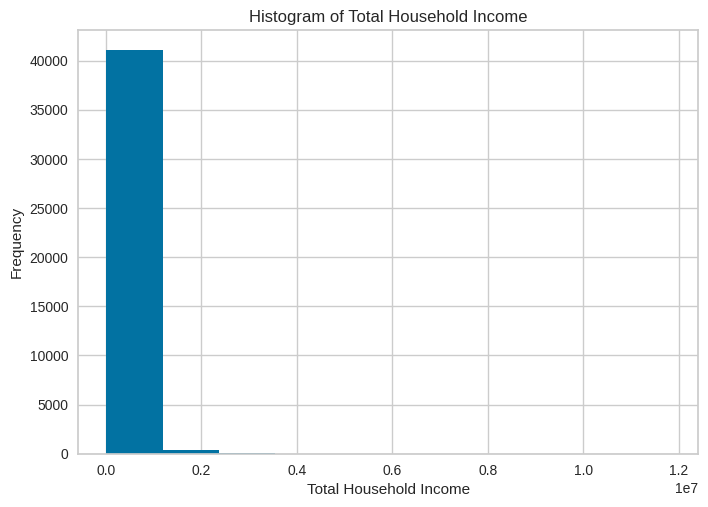

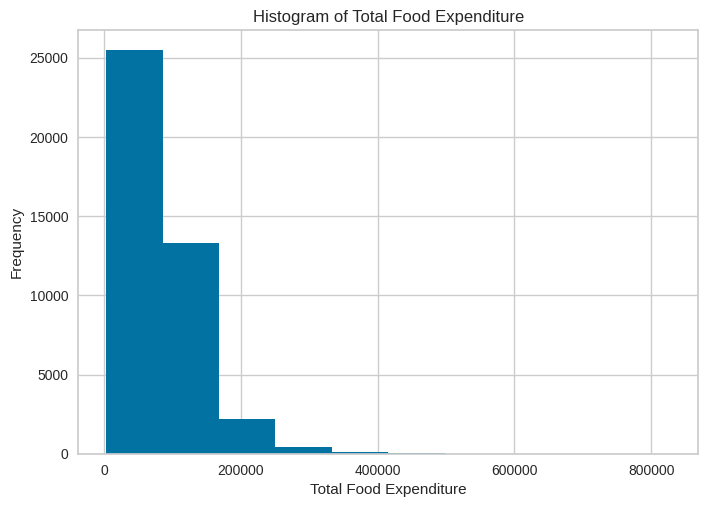

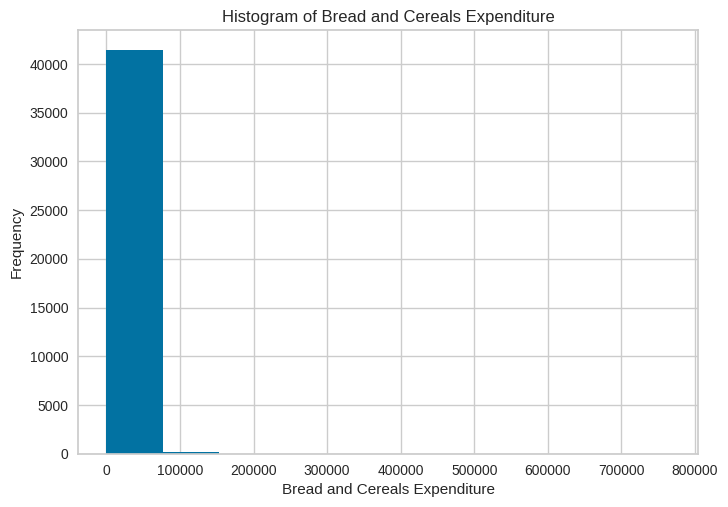

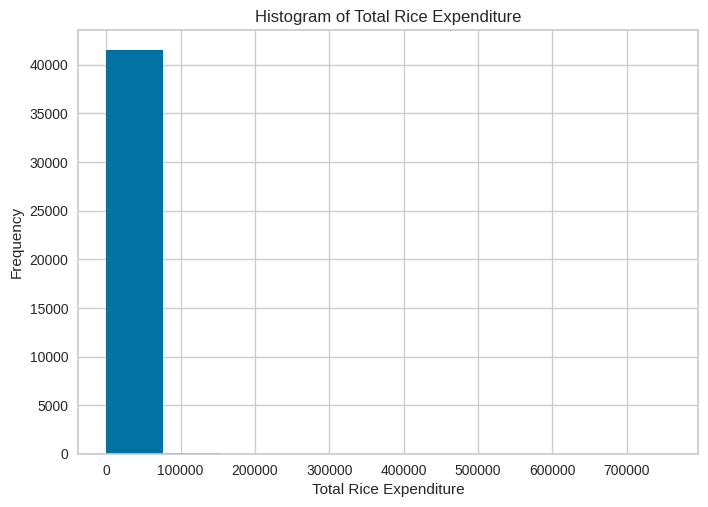

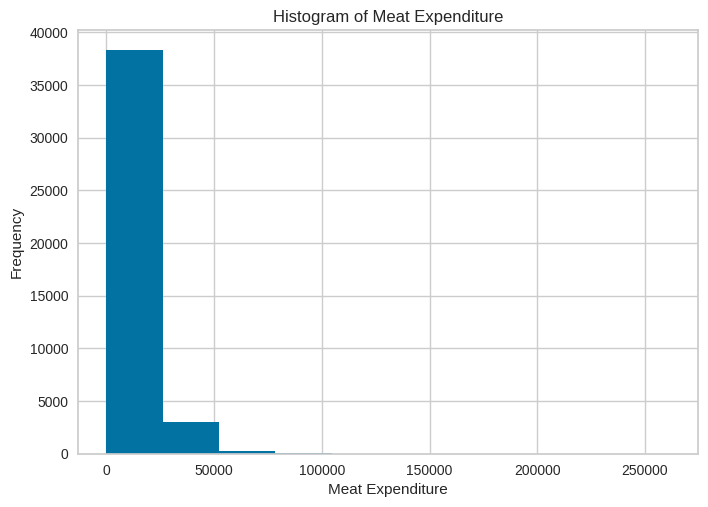

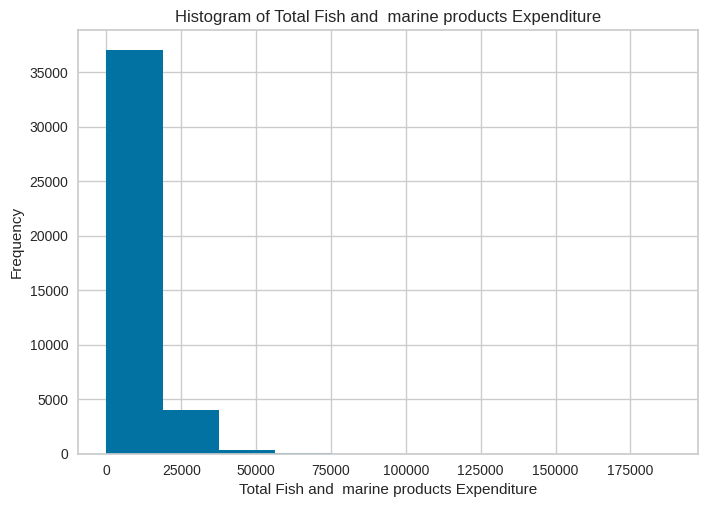

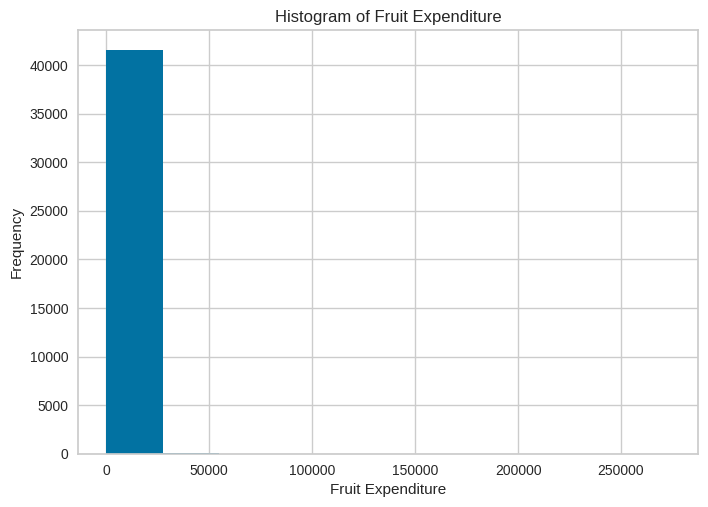

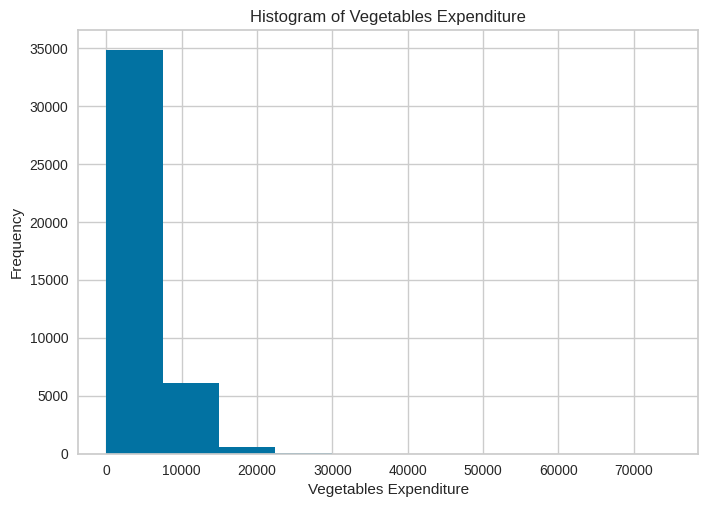

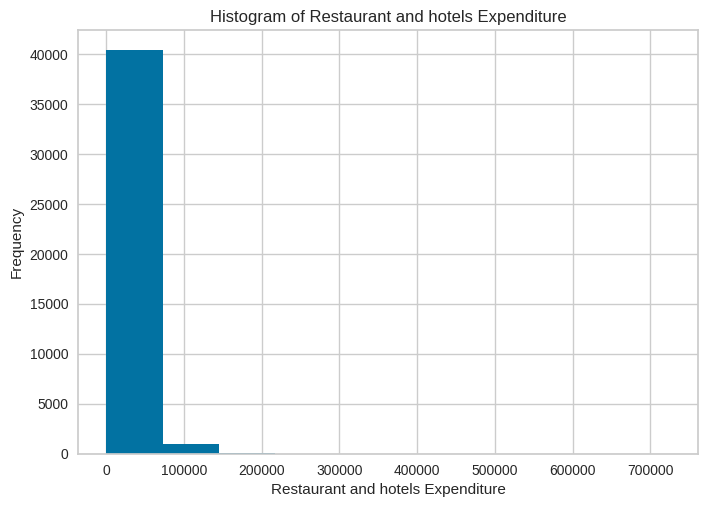

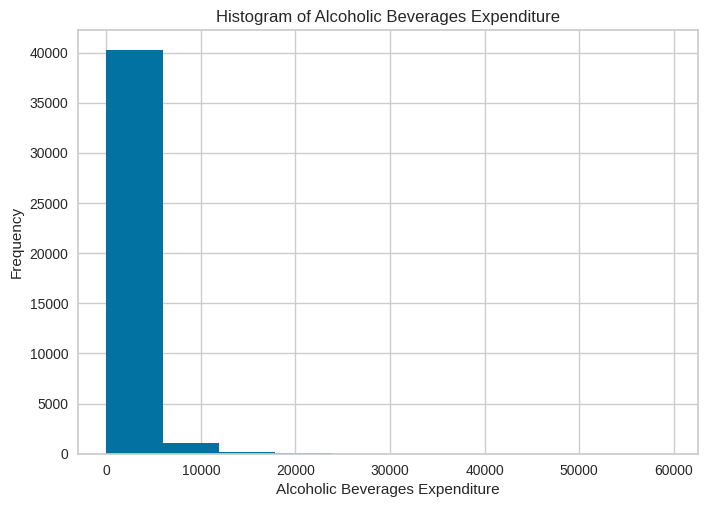

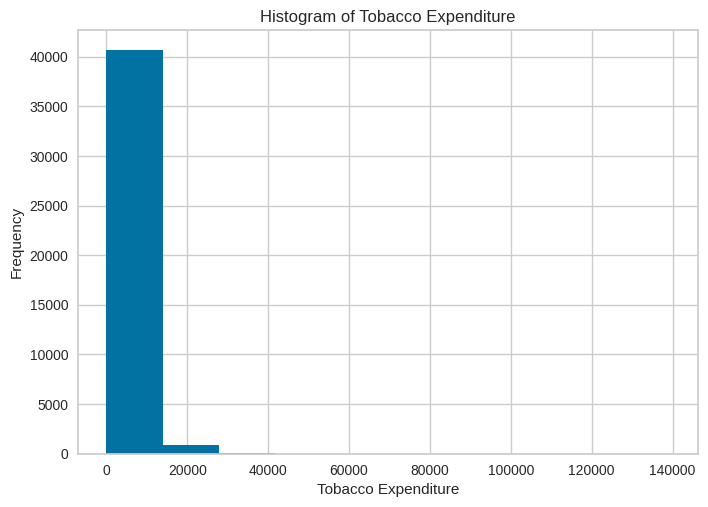

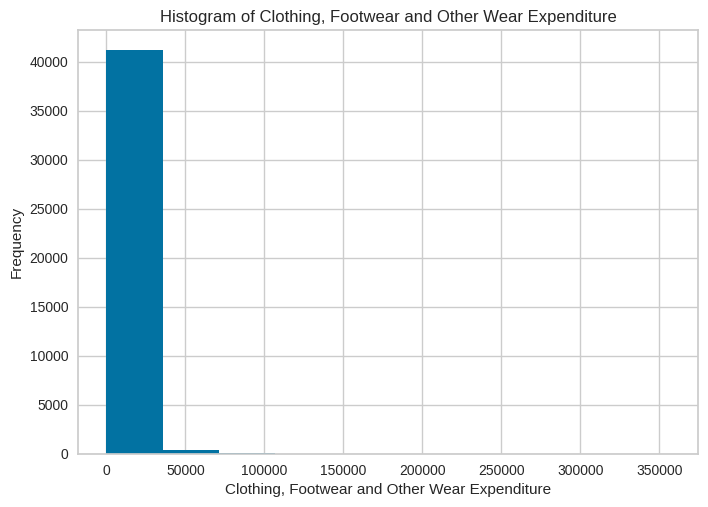

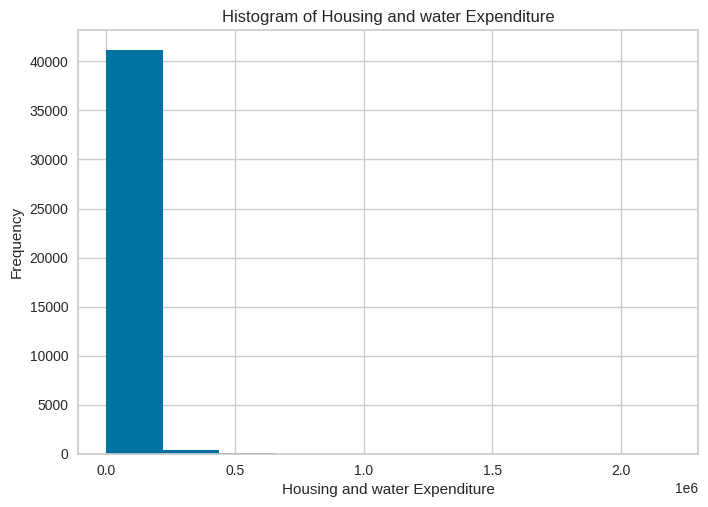

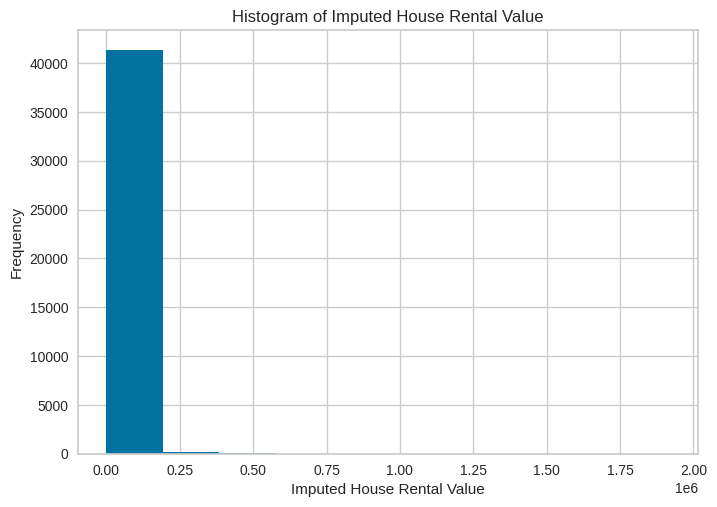

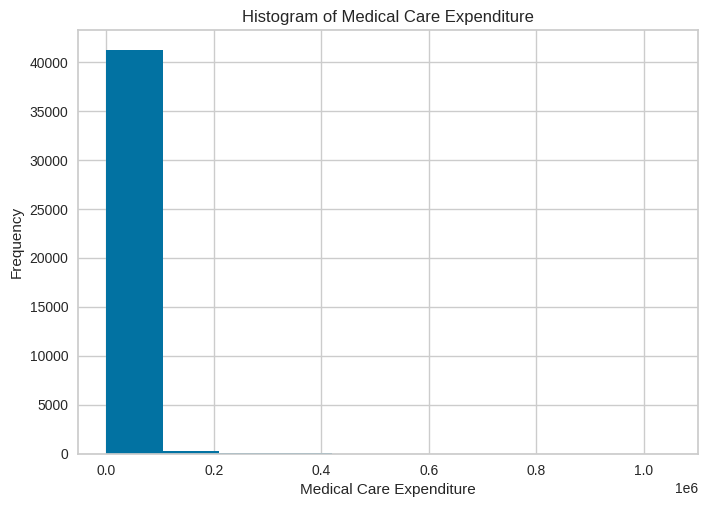

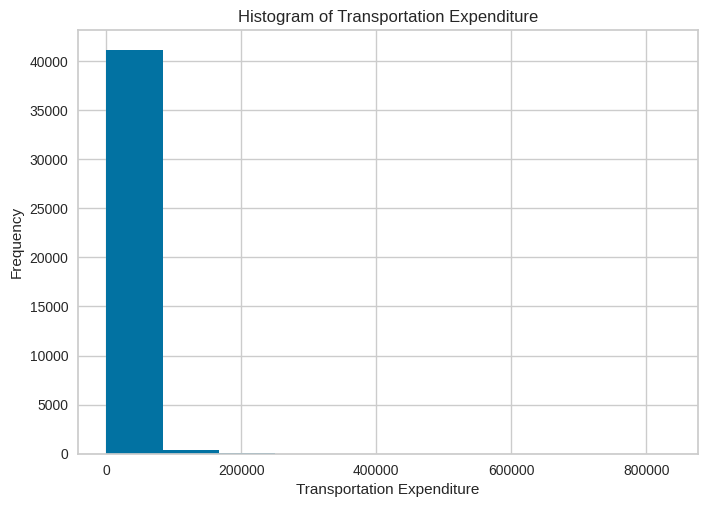

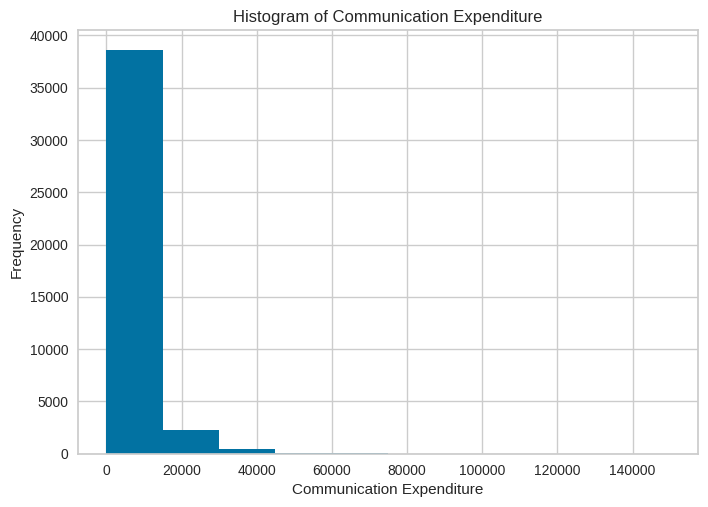

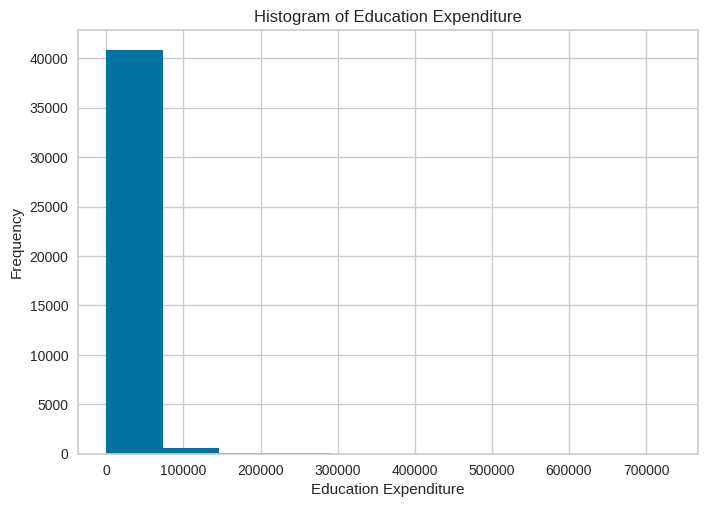

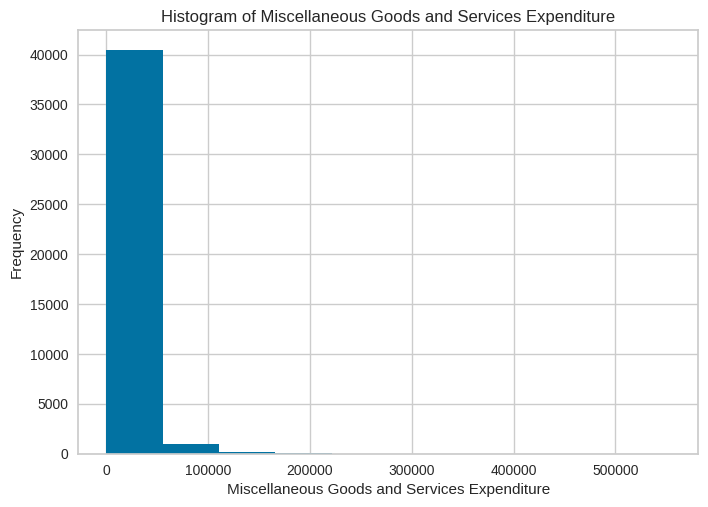

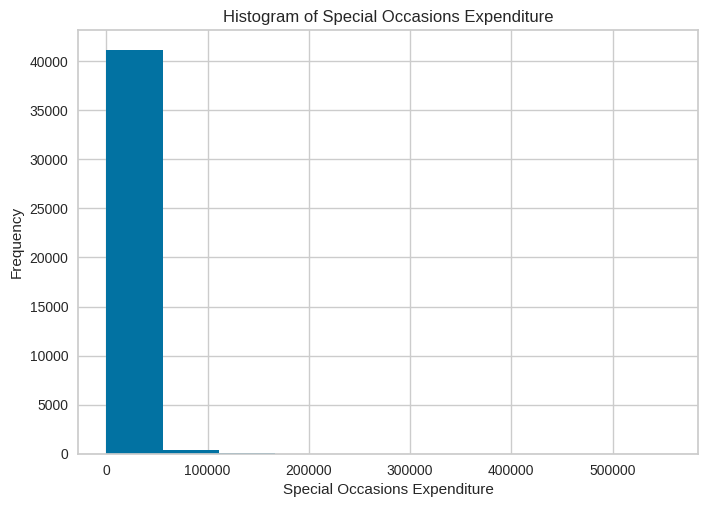

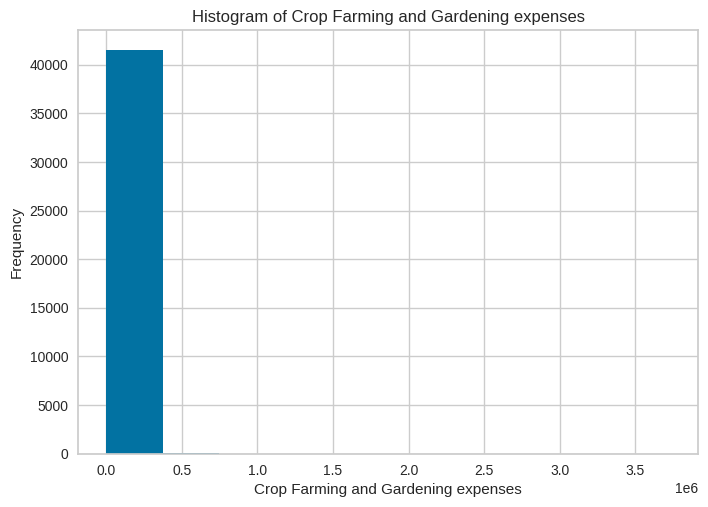

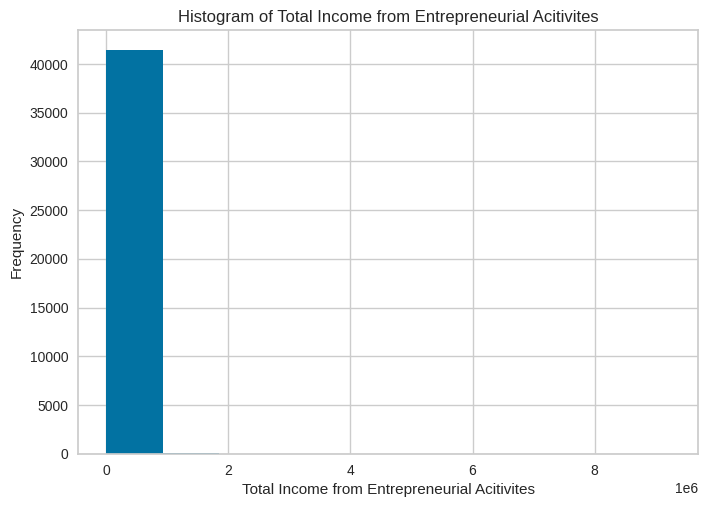

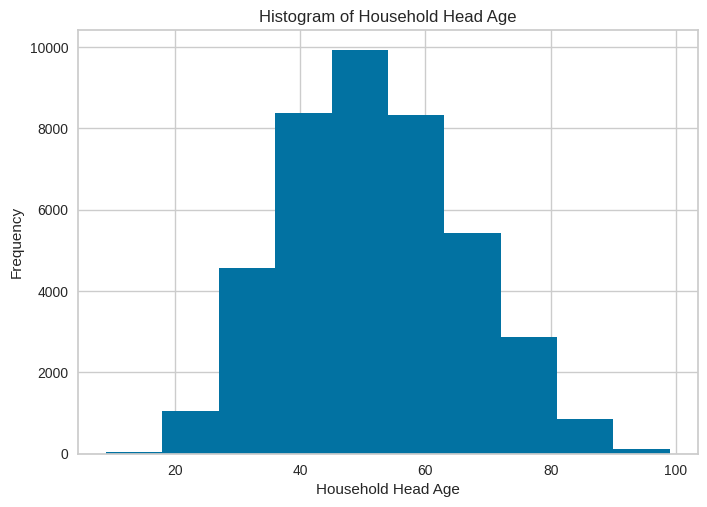

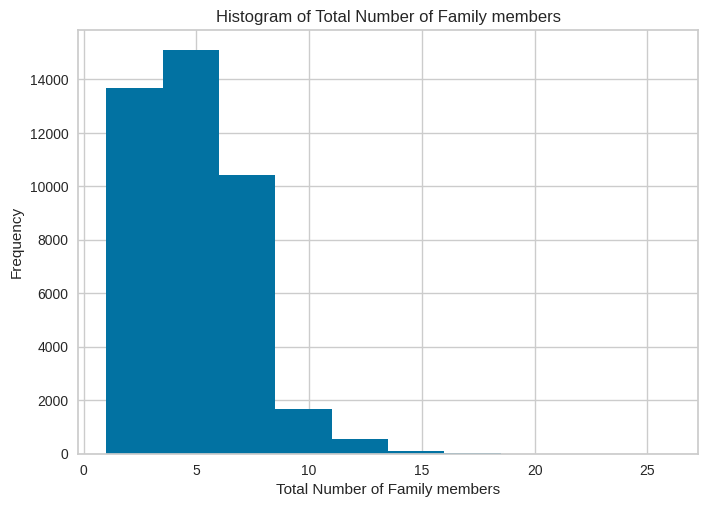

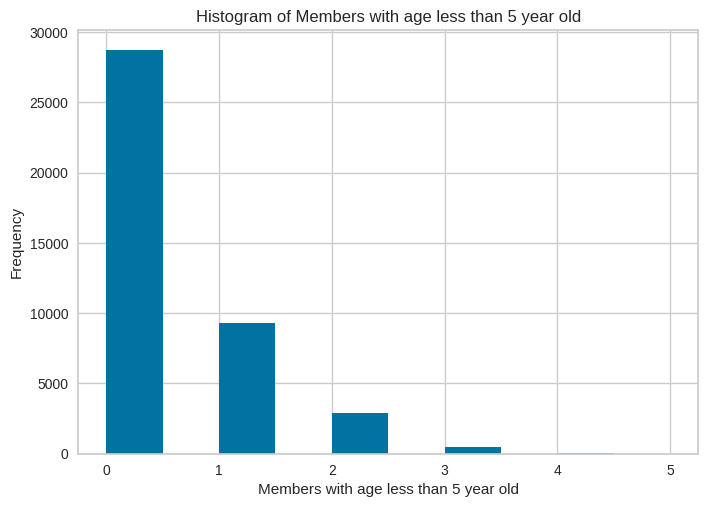

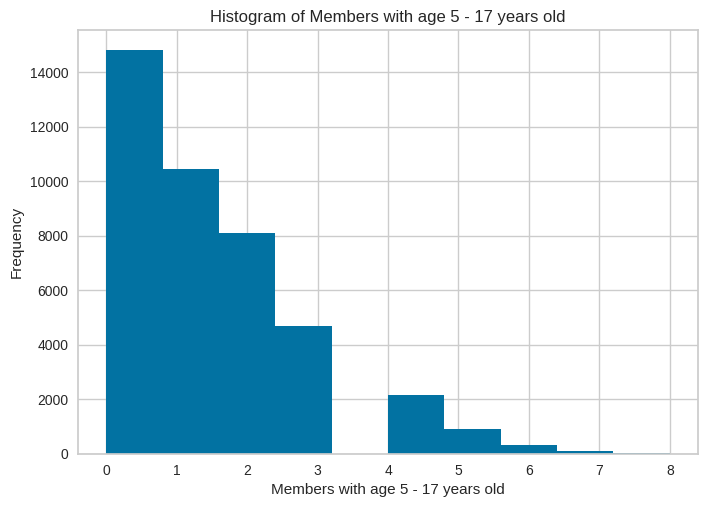

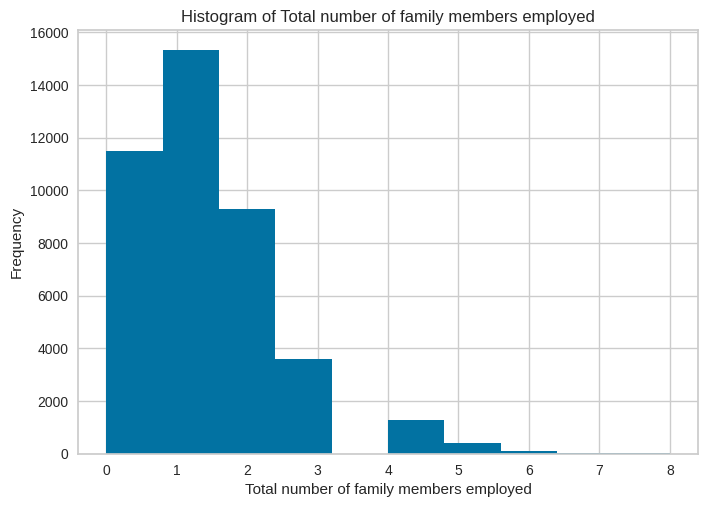

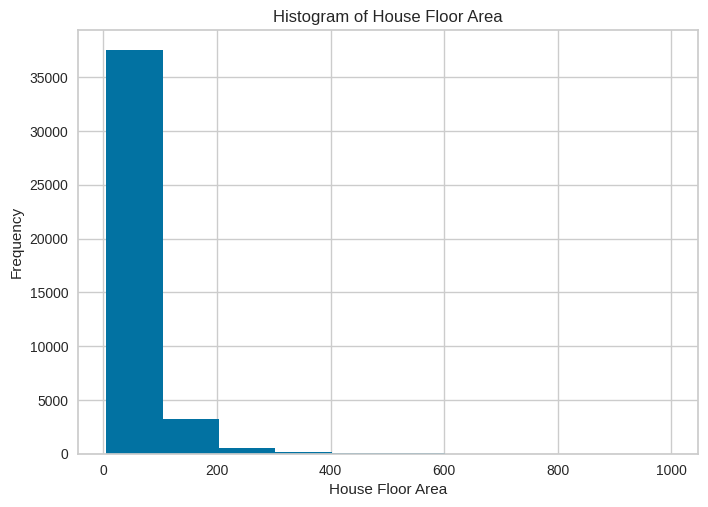

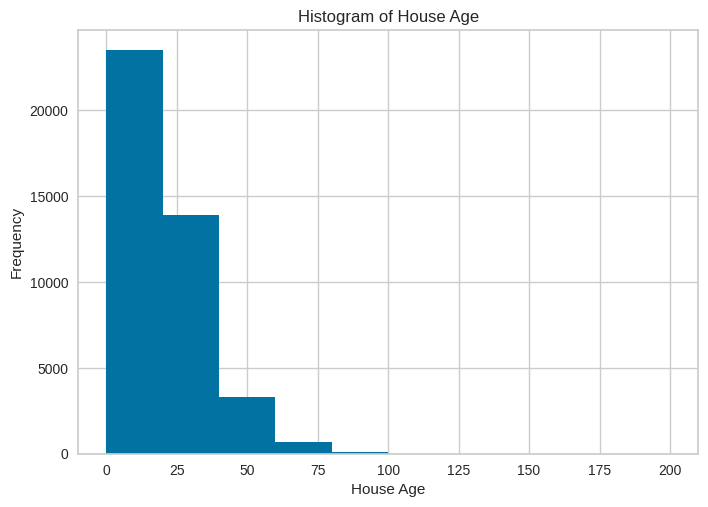

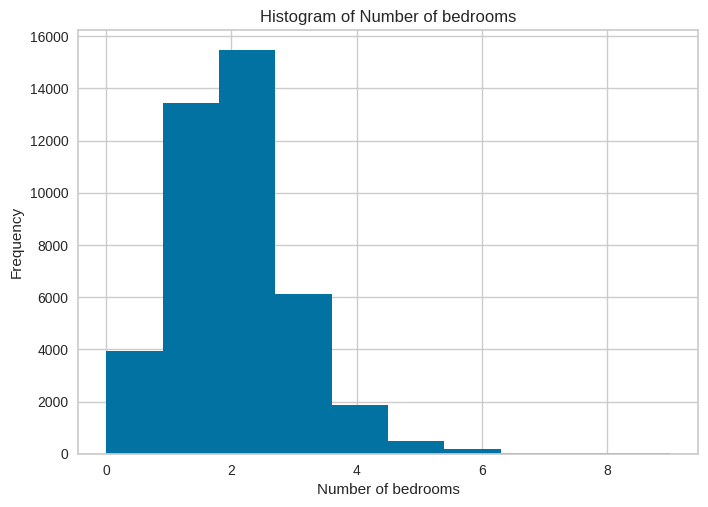

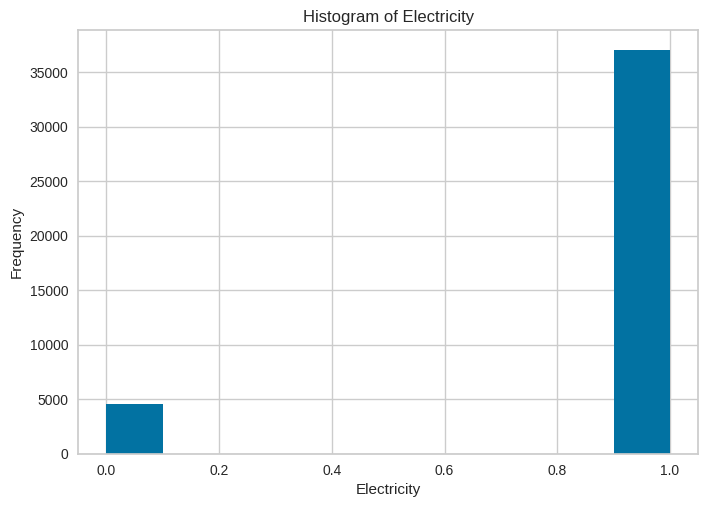

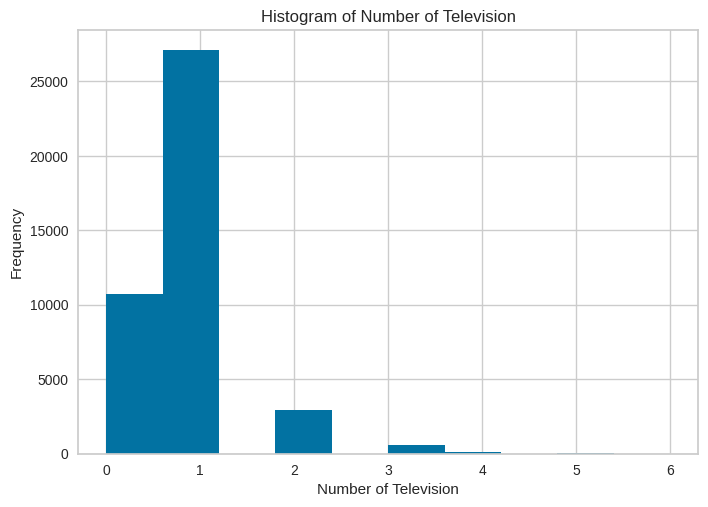

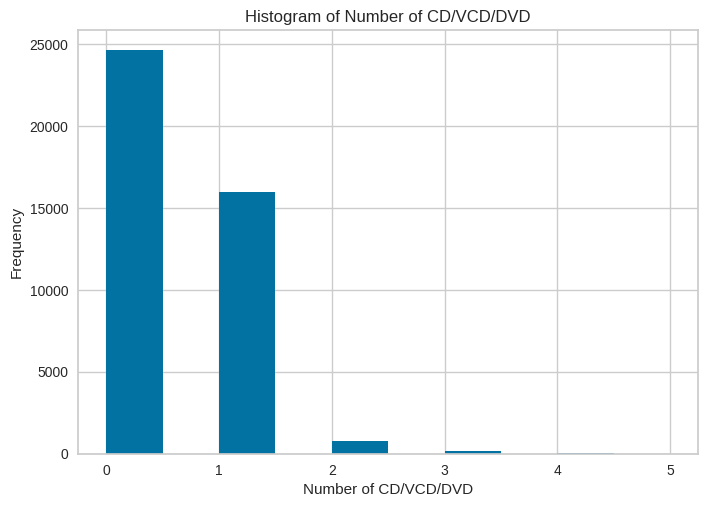

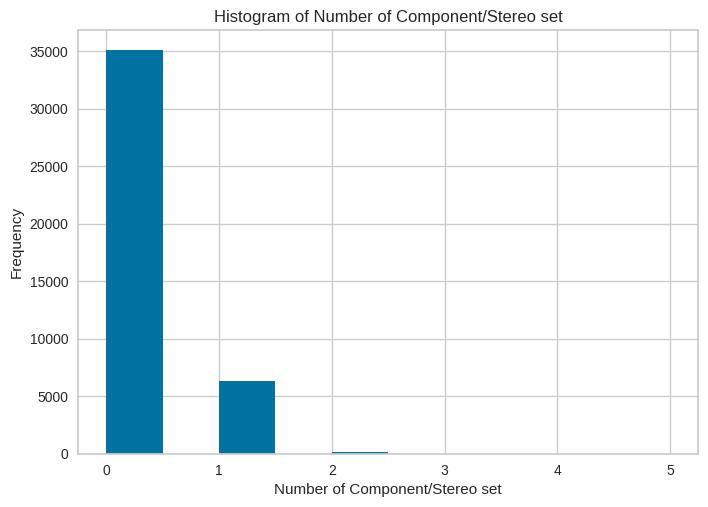

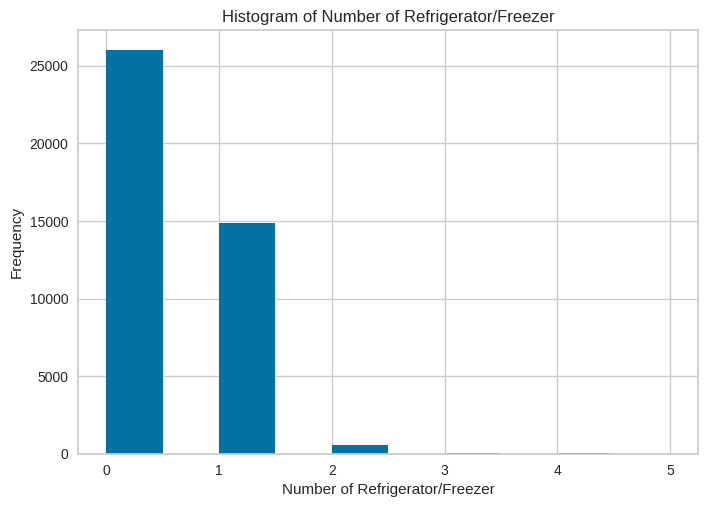

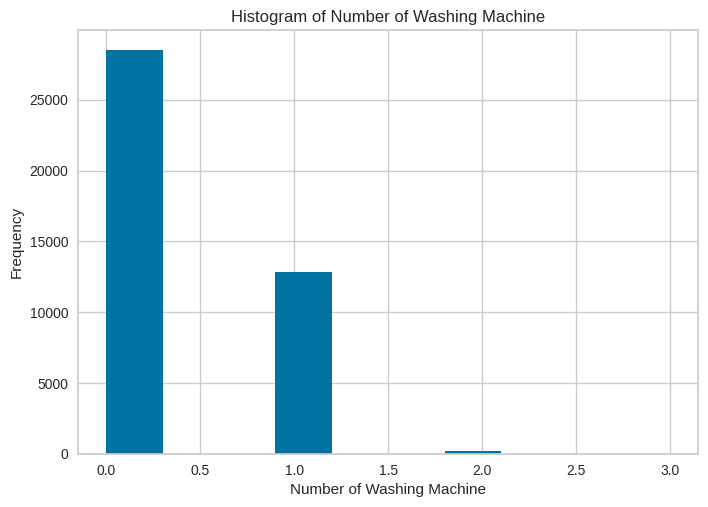

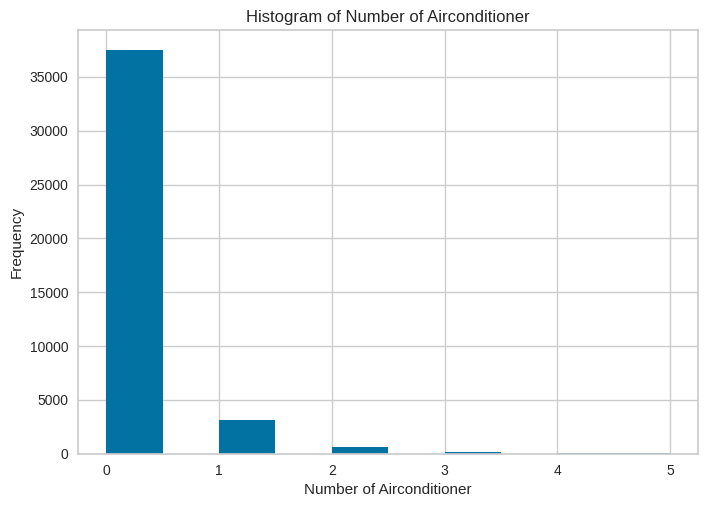

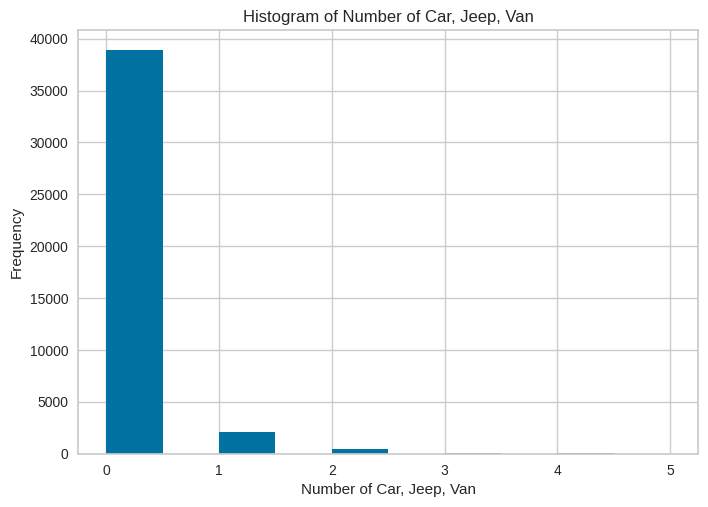

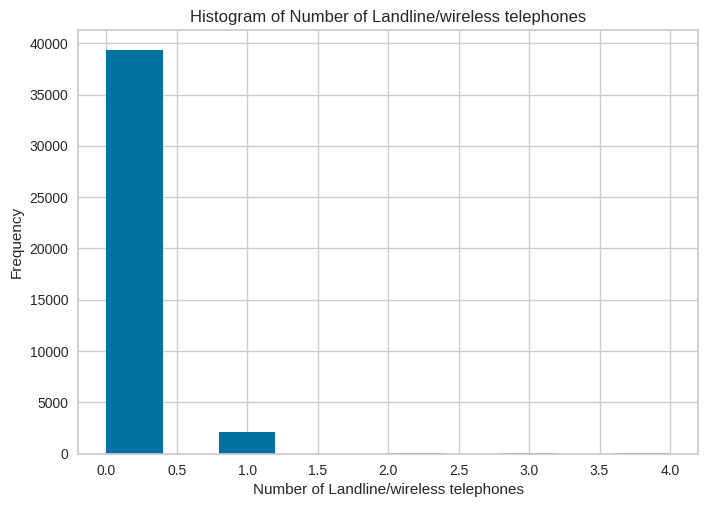

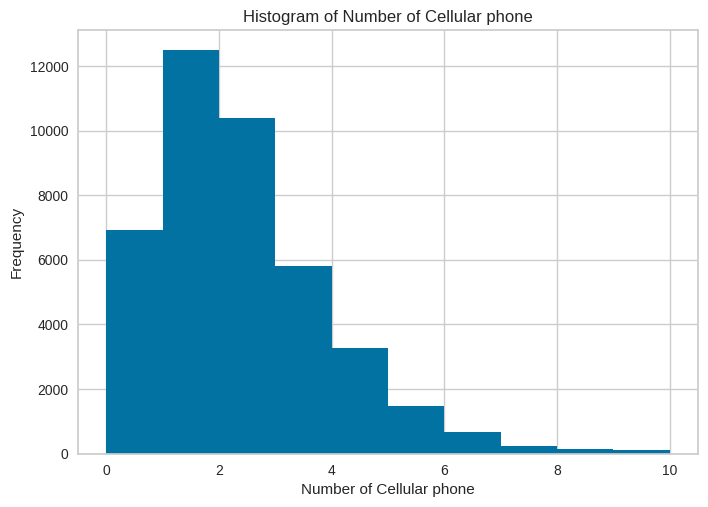

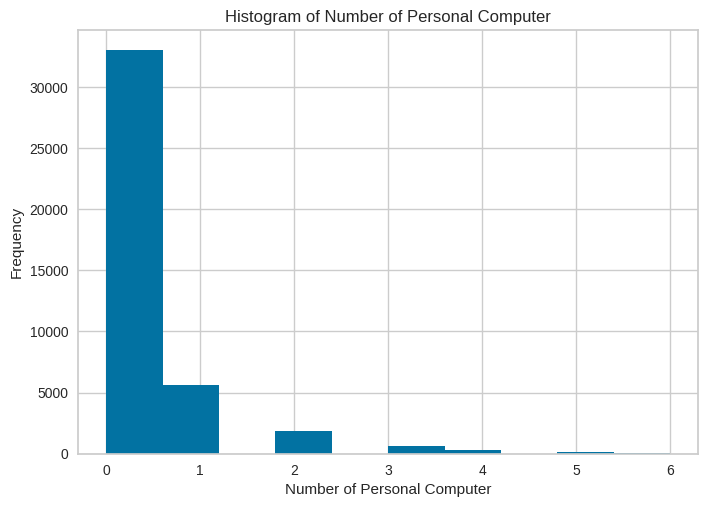

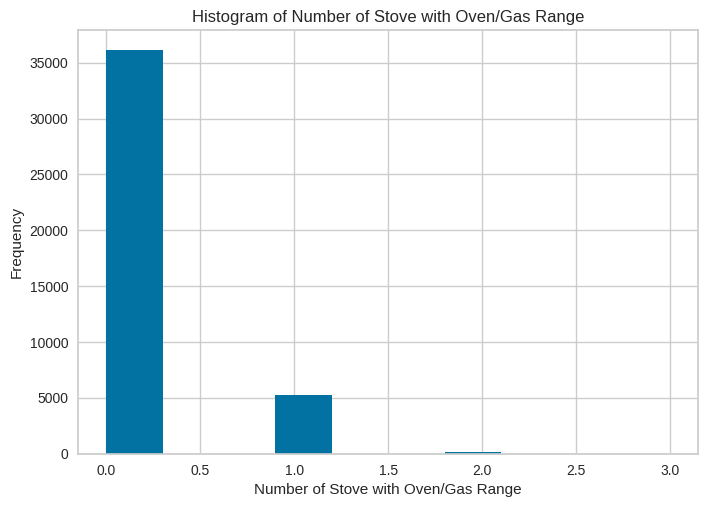

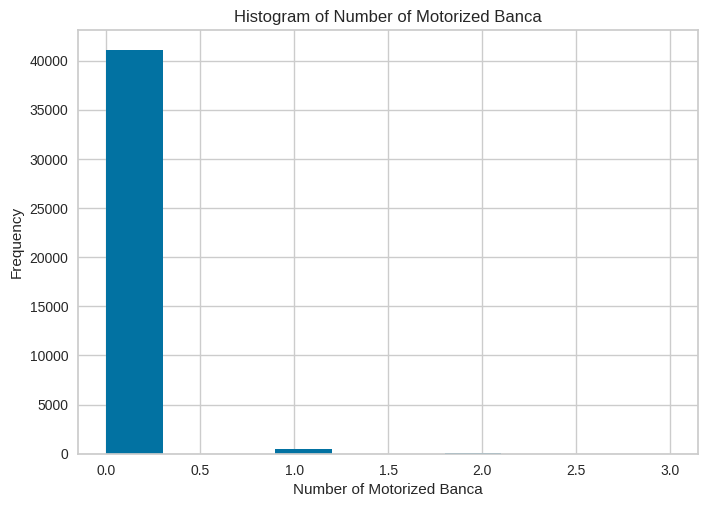

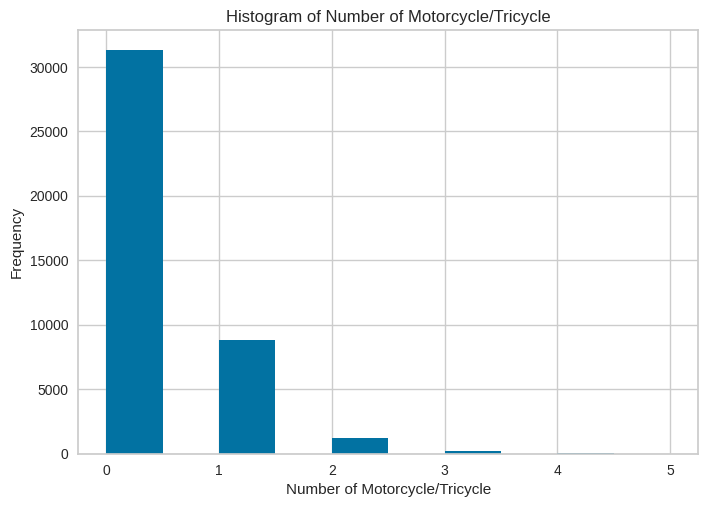

In [850]:
# Histogram for all Numerical Columns, individually
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [851]:
# Average Total Household Income per Region
average_income_per_region = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
average_income_per_region

Region
NCR                          420861.861501
IVA - CALABARZON             303360.536040
III - Central Luzon          292965.181650
CAR                          269540.484638
XI - Davao Region            238115.891251
I - Ilocos Region            238110.084327
II - Cagayan Valley          236778.221721
VII - Central Visayas        234909.314050
VI - Western Visayas         220481.260260
IVB - MIMAROPA               216685.124900
X - Northern Mindanao        214057.779544
Caraga                       196907.376543
VIII - Eastern Visayas       196736.581087
IX - Zasmboanga Peninsula    191000.908277
V - Bicol Region             186105.492718
XII - SOCCSKSARGEN           182984.802545
 ARMM                        134746.817616
Name: Total Household Income, dtype: float64

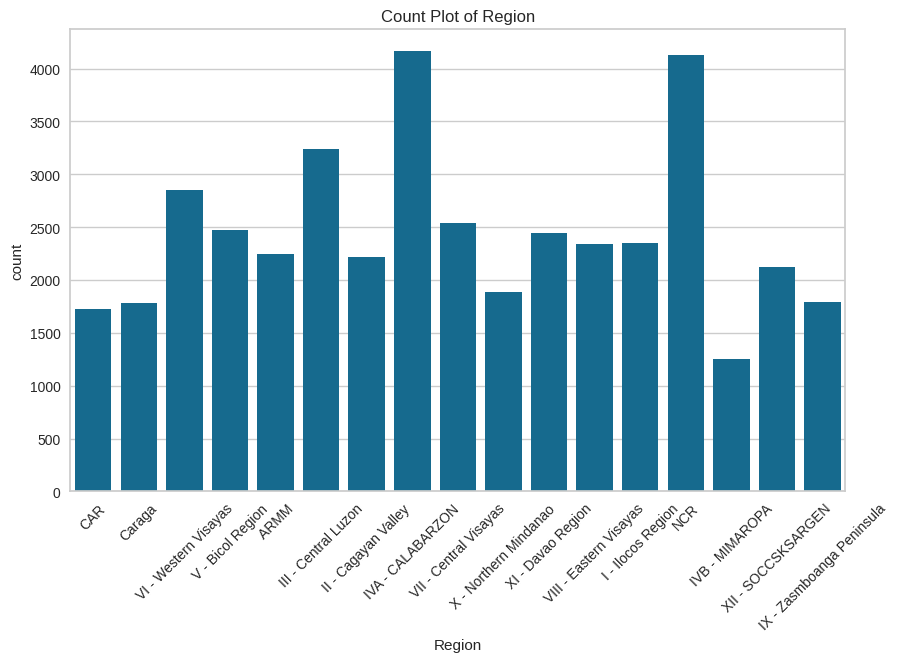

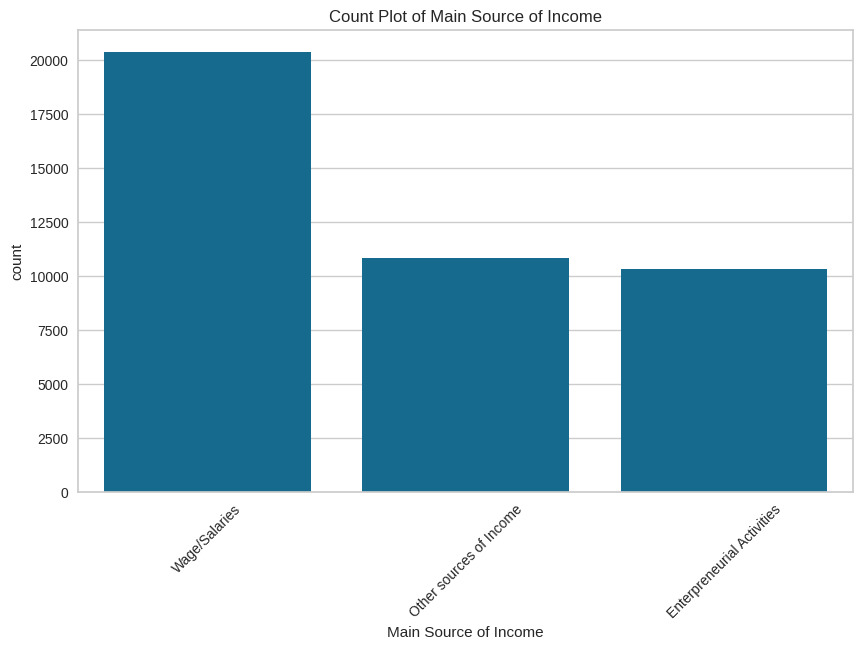

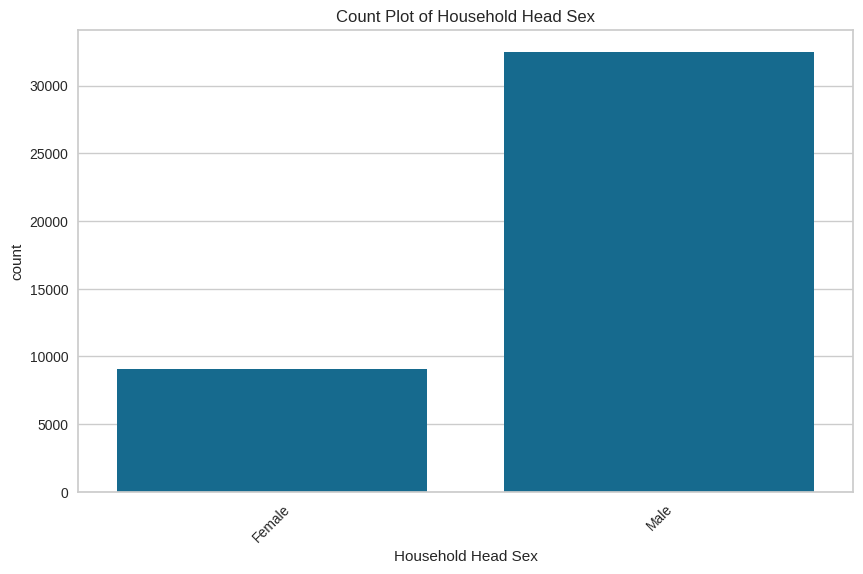

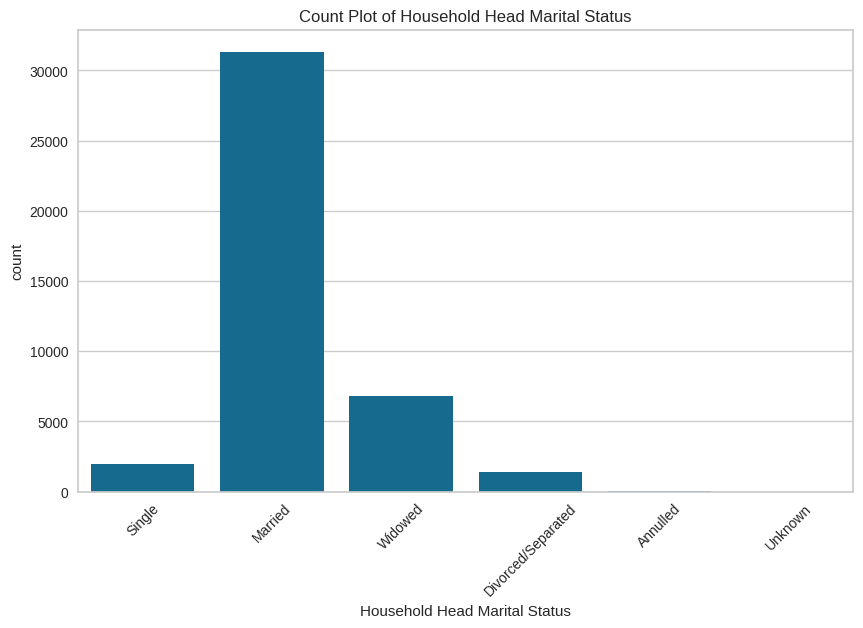

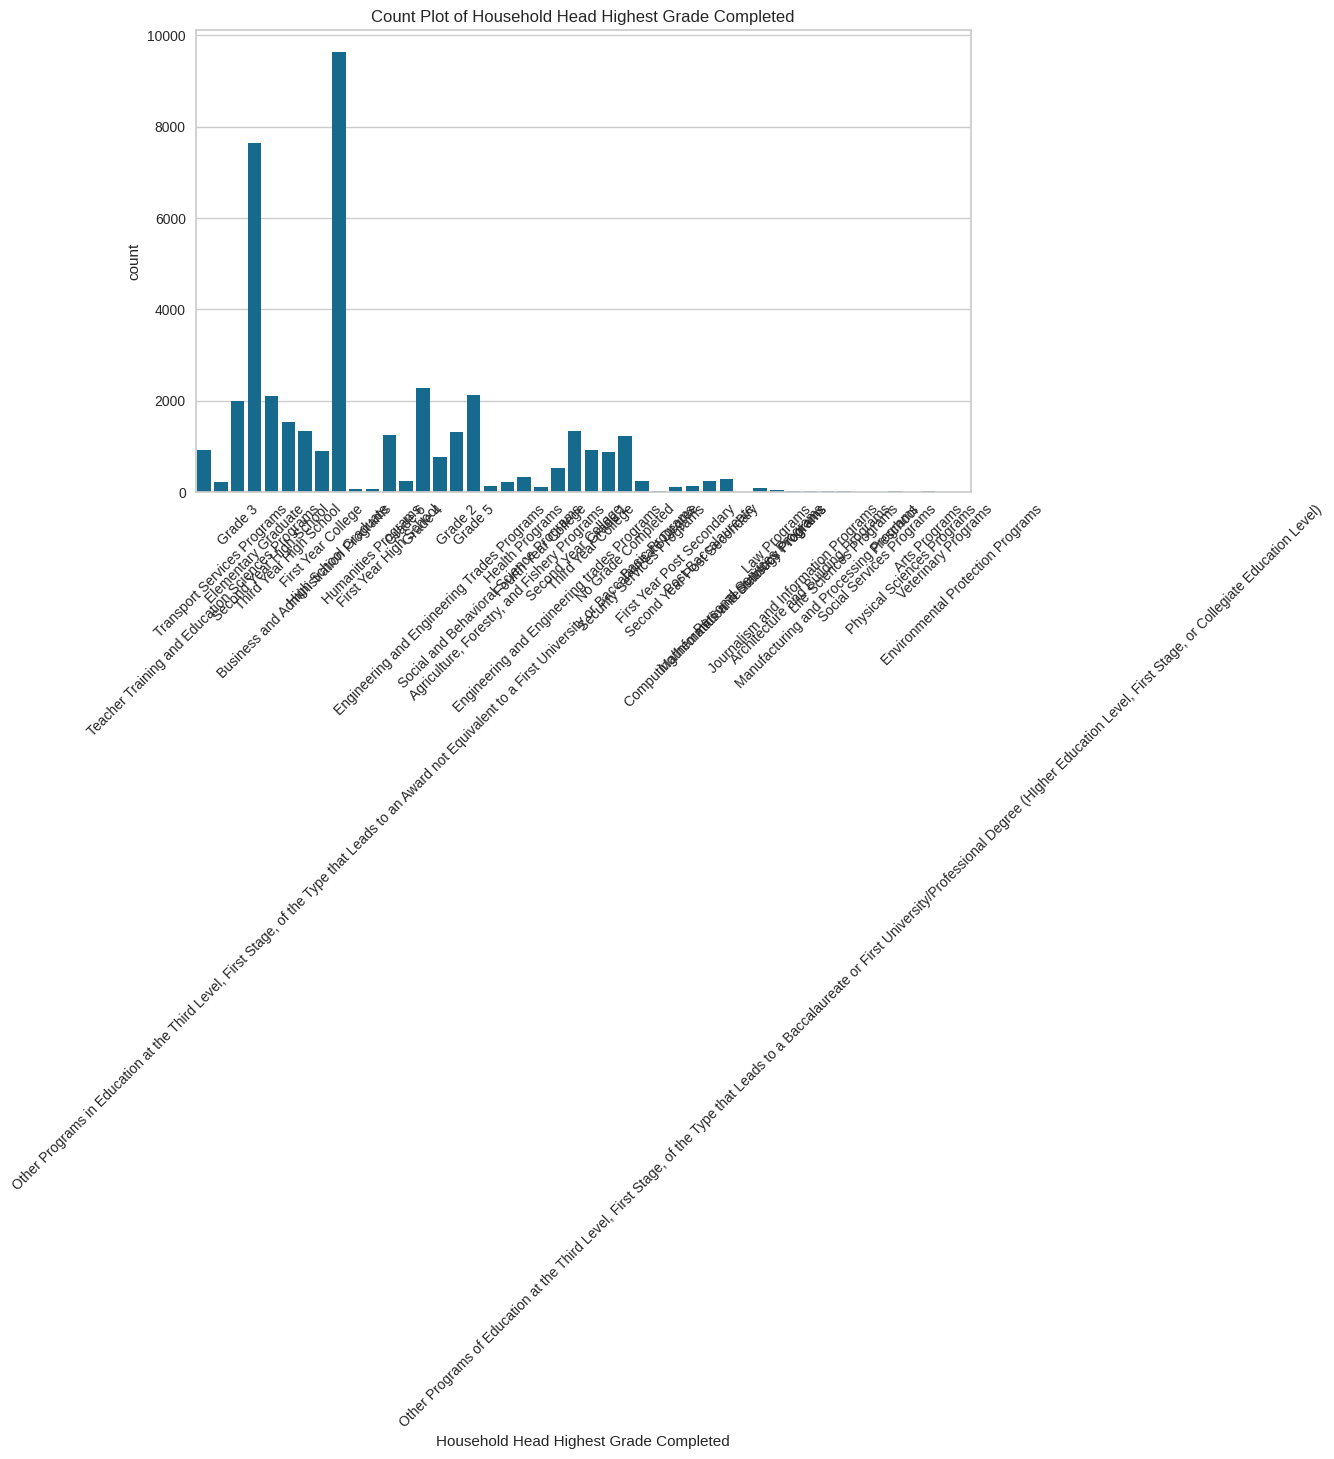

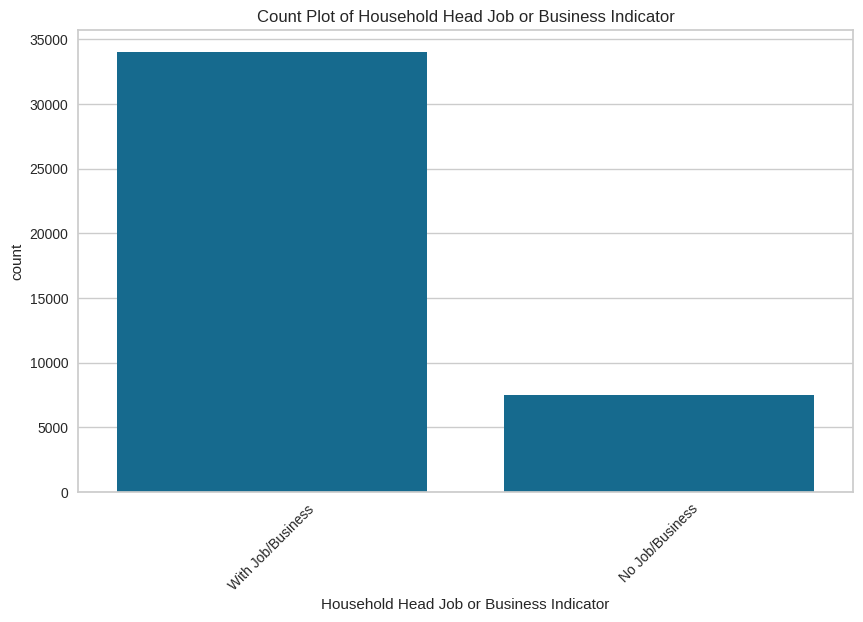

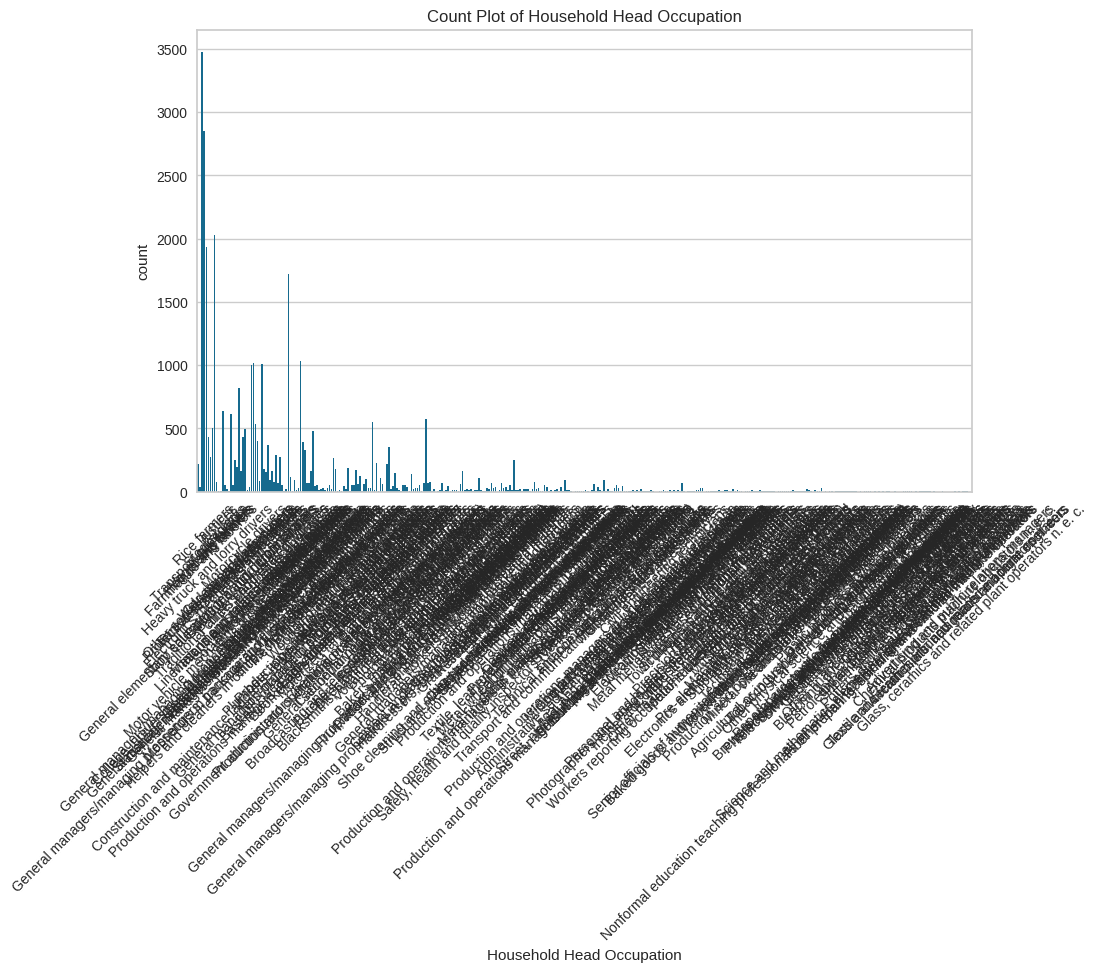

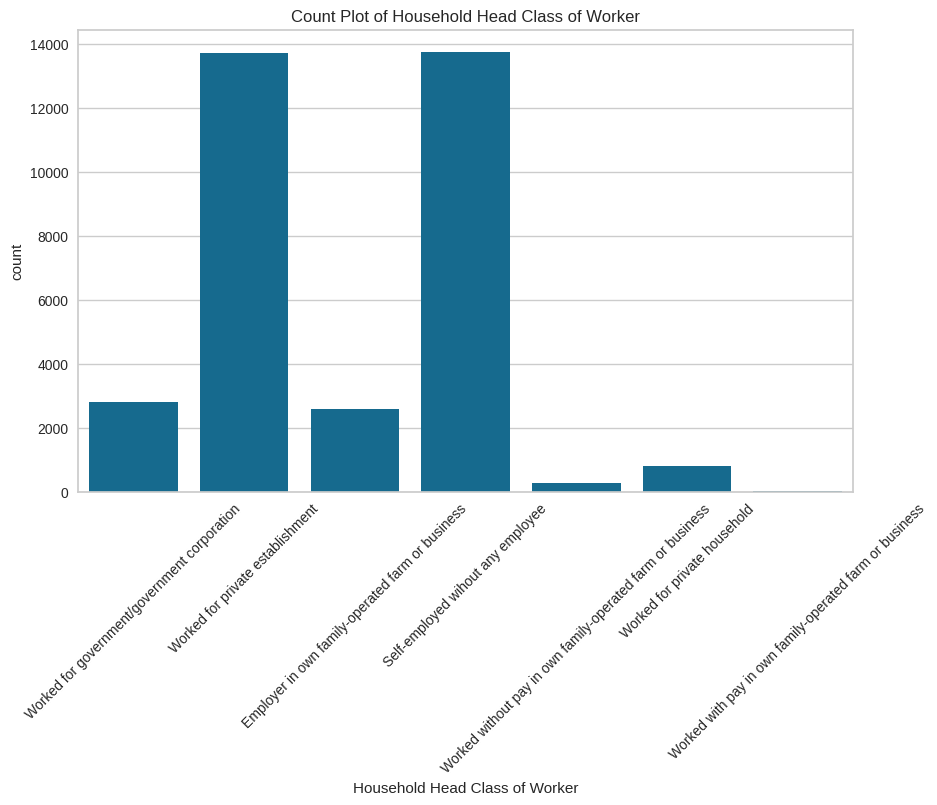

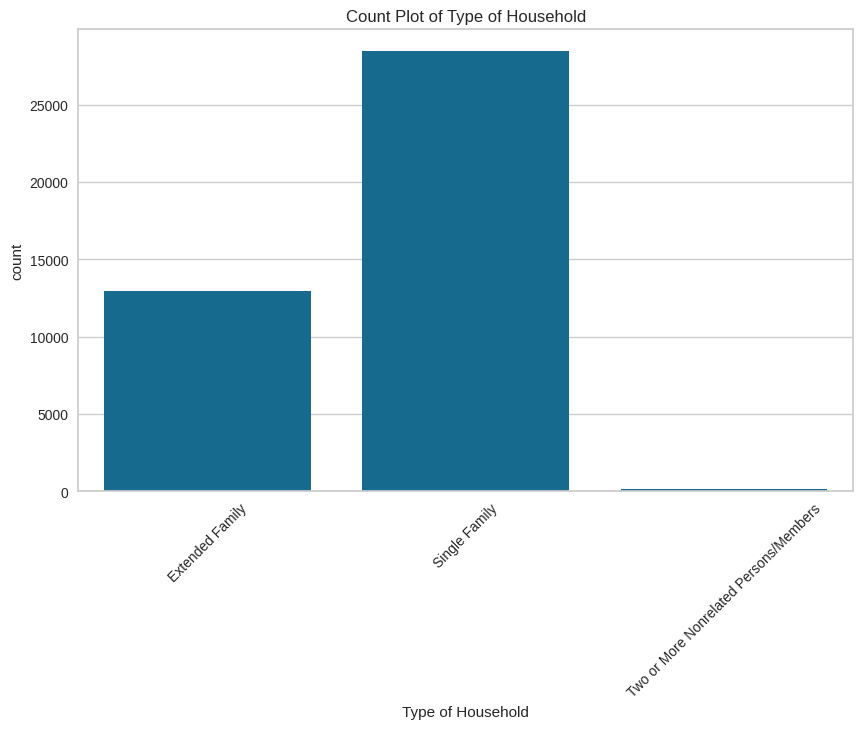

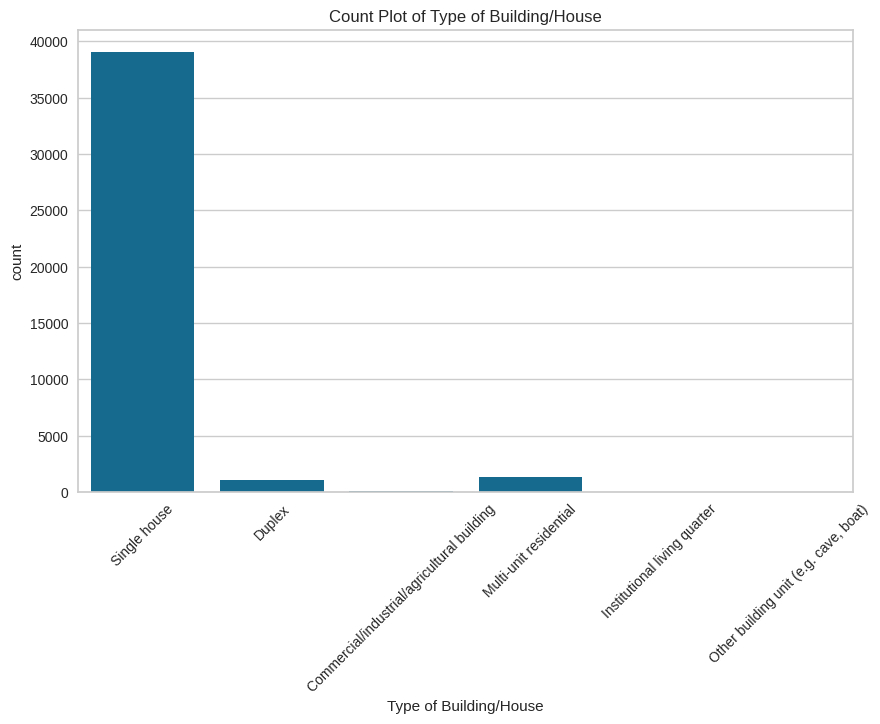

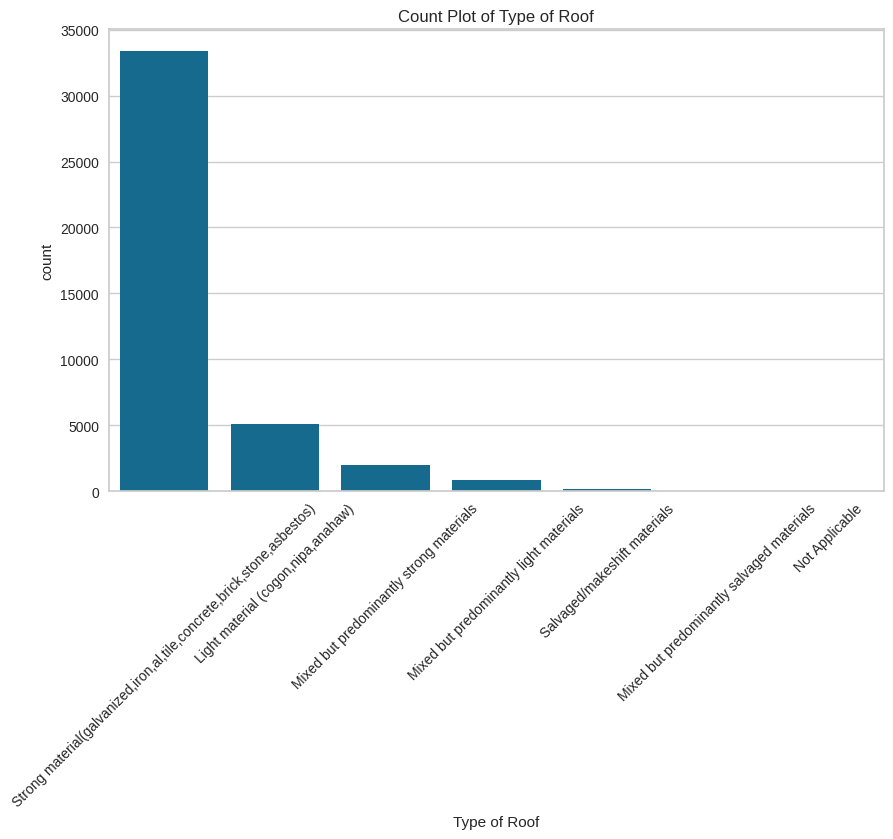

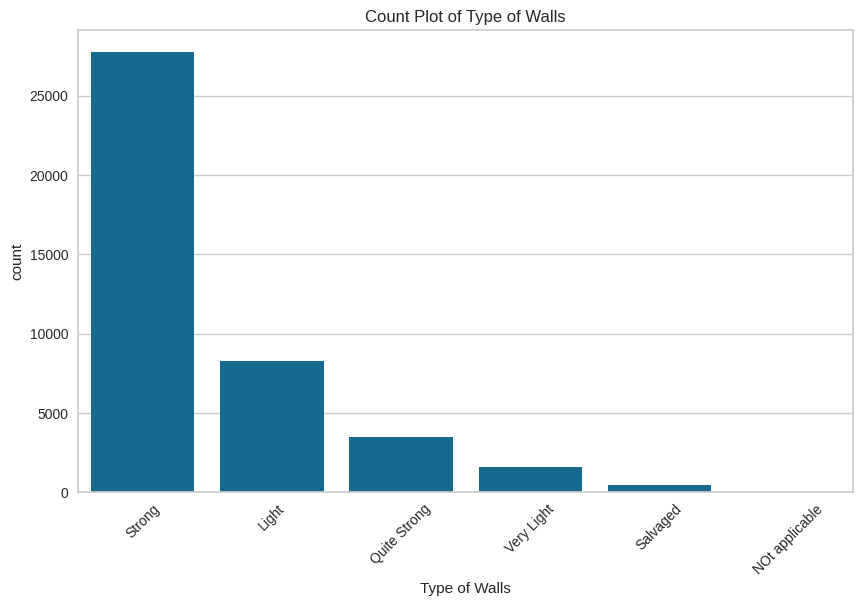

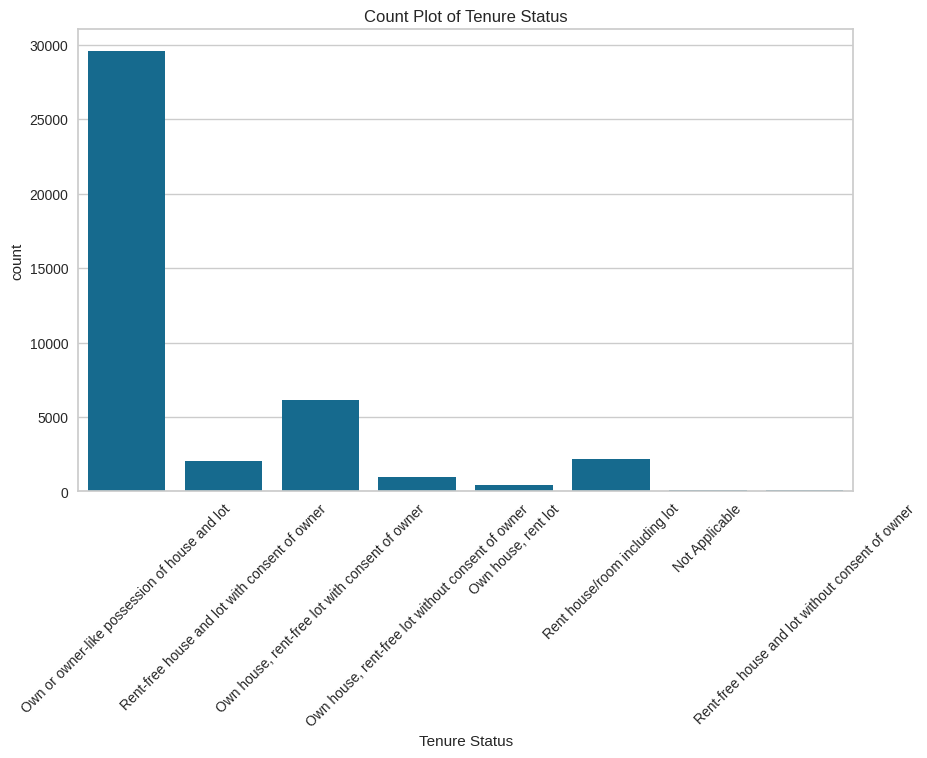

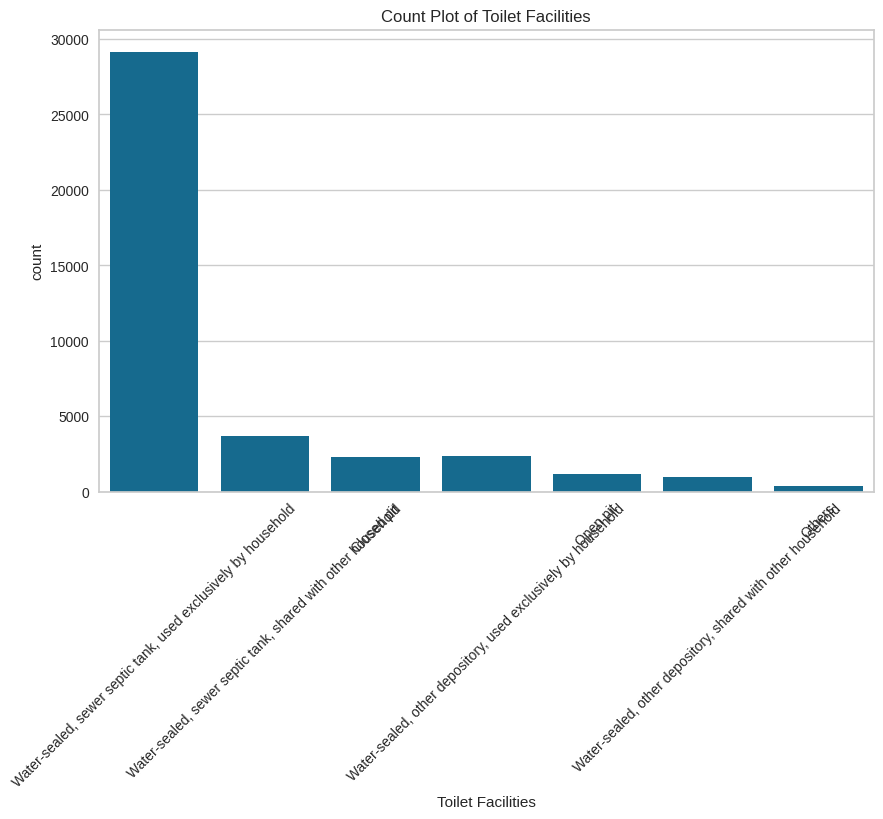

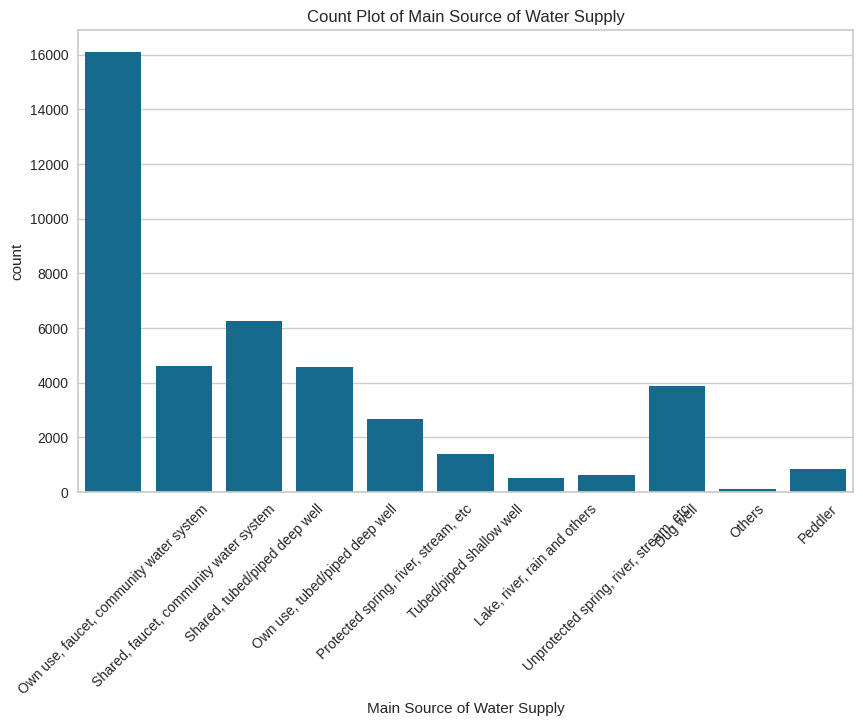

In [852]:
# Plot categorical columns. Tilt x values
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')

In [853]:
# Unique Values of Null Columns : Household Head Occupation, Household Head Class of Worker, Toilet Facilities
null_columns = df.columns[df.isna().any()]
null_columns

Index(['Household Head Occupation', 'Household Head Class of Worker',
       'Toilet Facilities'],
      dtype='object')

In [854]:
# Print unique values for each null column
for column in null_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Household Head Occupation: ['General elementary education teaching professionals'
 'Transport conductors' 'Farmhands and laborers' 'Rice farmers'
 'General managers/managing proprietors in transportation, storage and communications'
 'Heavy truck and lorry drivers' nan 'Hog raising farmers'
 'Vegetable farmers'
 'General managers/managing proprietors in wholesale and retail trade'
 'Stocks clerks' 'Justices' 'Other social science professionals'
 'Protective services workers n. e. c.' 'Secretaries'
 'Electronics mechanics and servicers' 'Foresters and related scientists'
 'Shop salespersons and demonstrators'
 'College, university and higher education teaching professionals'
 'General managers/managing proprietors of restaurants and hotels'
 'Welders and flamecutters' 'Car, taxi and van drivers'
 'Motor vehicle mechanics and related trades workers'
 'Traditional chiefs and heads of villages' 'Motorcycle drivers'
 'Statistical, mathematical and related associate profess

In [855]:
df['Household Head Occupation'].value_counts()

Household Head Occupation
Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
                                                                                       ... 
Petroleum and natural gas refining plant operators                                        1
Builders (traditional materials)                                                          1
Personal care and related workers, n. e. c.                                               1
Riggers and cable splicers                                                                1
Glass, ceramics and related plant operators n. e. c.                                      1
Name: count, Length: 378, dtype: int64

In [856]:
df['Household Head Highest Grade Completed'].value_counts()

Household Head Highest Grade Completed
High School Graduate                                                                                                                                                                                                   9628
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                                                                                                                                                                2104
Grade 3                                                                                                                                                                                                                1994
Third Year High School                                                                                                                                                                                                 1545
Business and Administration Programs                                                                                                                                                                                   1344
Second Year College                                                                                                                                                                                                    1343
Grade 2                                                                                                                                                                                                                1311
First Year High School                                                                                                                                                                                                 1247
No Grade Completed                                                                                                                                                                                                     1228
Third Year College                                                                                                                                                                                                      924
Teacher Training and Education Sciences Programs                                                                                                                                                                        922
First Year College                                                                                                                                                                                                      907
Grade 1                                                                                                                                                                                                                 874
Engineering and Engineering Trades Programs                                                                                                                                                                             777
Engineering and Engineering trades Programs                                                                                                                                                                             522
H

In [857]:
df['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

In [858]:
# Regions of Rows with Null Columns
df[df['Household Head Occupation'].isna()]['Region'].value_counts() # 7536 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [859]:
df[df['Household Head Class of Worker'].isna()]['Region'].value_counts() #7536 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [860]:
# Regions of Rows with Null 'Household Head Occupation' and 'Household Head Class of Worker'
df[(df['Household Head Occupation'].isna()) & (df['Household Head Class of Worker'].isna())]['Region'].value_counts() # 7536 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [861]:
df[df['Toilet Facilities'].isna()]['Region'].value_counts() # 1580 Null Values

Region
V - Bicol Region             277
VI - Western Visayas         224
VIII - Eastern Visayas       210
VII - Central Visayas        193
 ARMM                        144
IVA - CALABARZON             112
XII - SOCCSKSARGEN            86
IVB - MIMAROPA                76
Caraga                        74
IX - Zasmboanga Peninsula     43
I - Ilocos Region             35
XI - Davao Region             27
X - Northern Mindanao         26
CAR                           21
III - Central Luzon           17
NCR                           10
II - Cagayan Valley            5
Name: count, dtype: int64

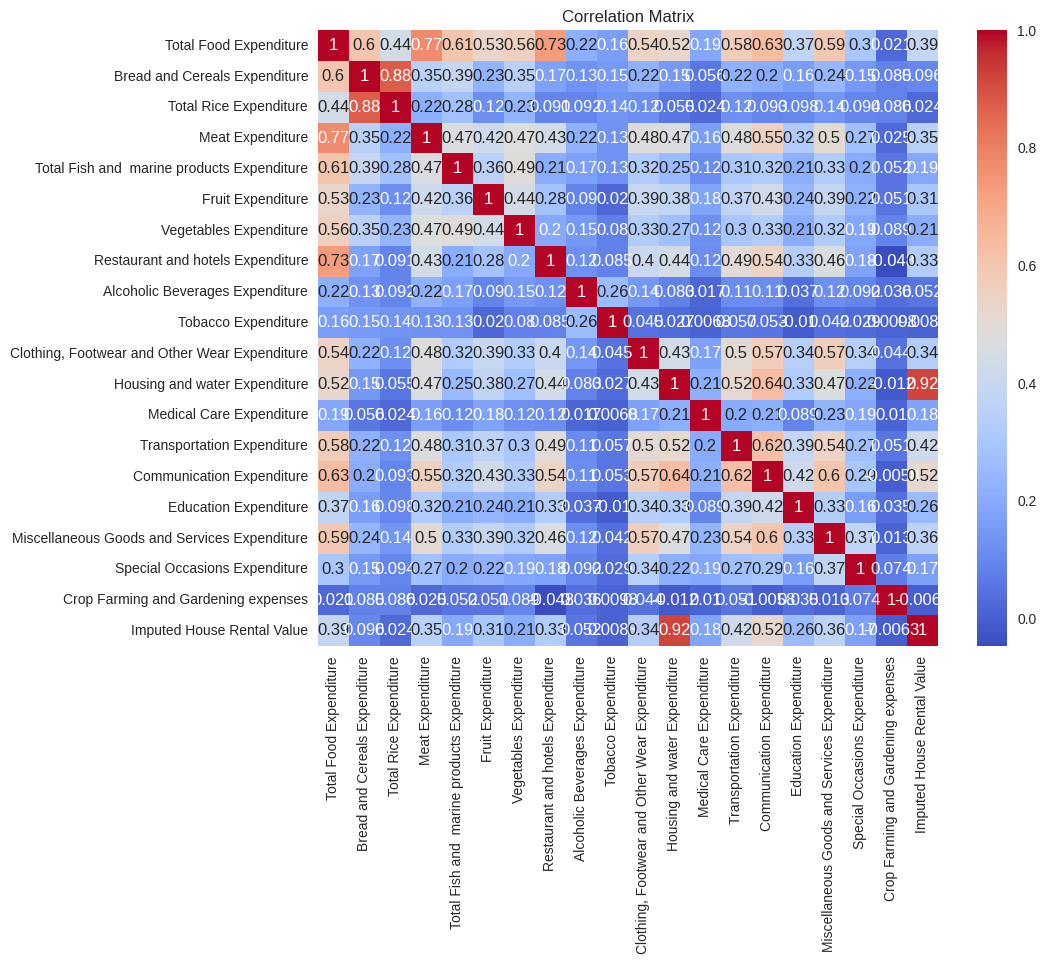

In [862]:
# Plot Correlation Matrix for Numerical Values
plt.figure(figsize=(10, 8))
sns.heatmap(df[expenditure_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [863]:
# Get Unaccounted Bread and Cereals Expenditure by Subtracting Total Rice Expenditure from Bread and Cereals Expenditure
df['Other Bread and Cereals Expenditure'] = df['Bread and Cereals Expenditure'] - df['Total Rice Expenditure']

In [864]:
# Include Other Bread and Cereals Expenditure
expenditure_columns = np.append(expenditure_columns, 'Other Bread and Cereals Expenditure')

In [865]:
# Aggregate Essential Spending
essential_cols = ['Total Food Expenditure', 'Housing and water Expenditure',
                  'Medical Care Expenditure', 'Education Expenditure',
                  'Communication Expenditure', 'Transportation Expenditure']

df['Total_Essential_Spending'] = df[essential_cols].sum(axis=1)

In [866]:
# Aggregate Non-Essential Spending
non_essential_cols = [
    'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
    'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses'
]

df['Total_NonEssential_Spending'] = df[non_essential_cols].sum(axis=1)

In [867]:
df['Total Expenditure'] = df['Total_Essential_Spending'] + df['Total_NonEssential_Spending']

Text(0.5, 0, 'Total_Essential_Spending')

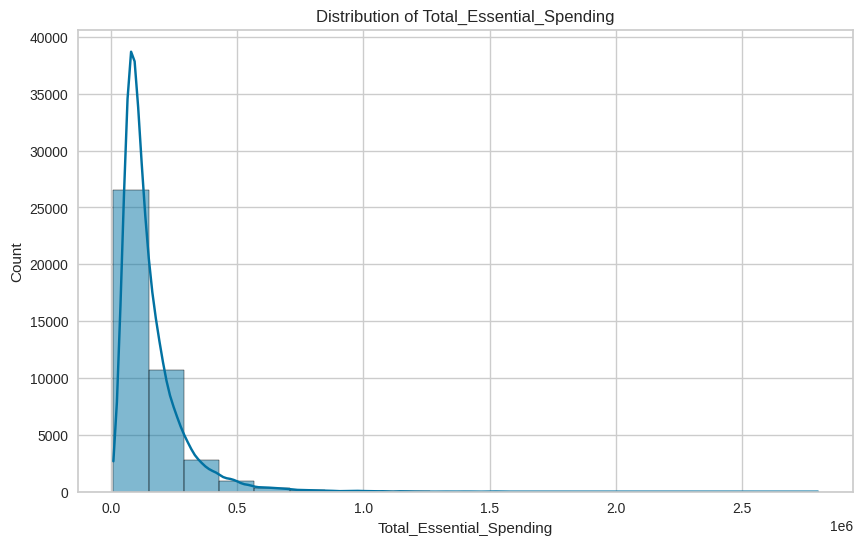

In [868]:
# Plot Total_Essential Spending
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Essential_Spending'], bins=20, kde=True)
plt.title('Distribution of Total_Essential_Spending')
plt.xlabel('Total_Essential_Spending')

Text(0.5, 0, 'Total_NonEssential_Spending')

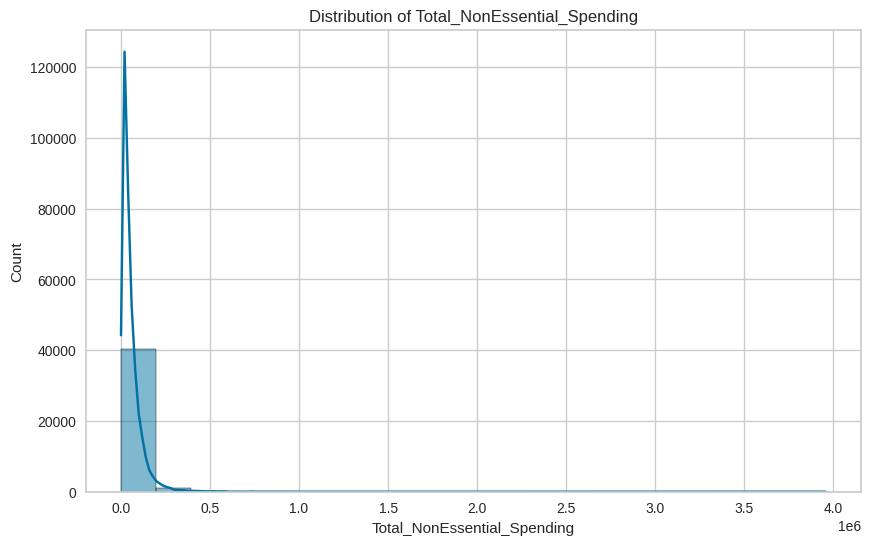

In [869]:
# Plot Non-Essential Spending
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_NonEssential_Spending'], bins=20, kde=True)
plt.title('Distribution of Total_NonEssential_Spending')
plt.xlabel('Total_NonEssential_Spending')

Text(0.5, 0, 'Total Expenditure')

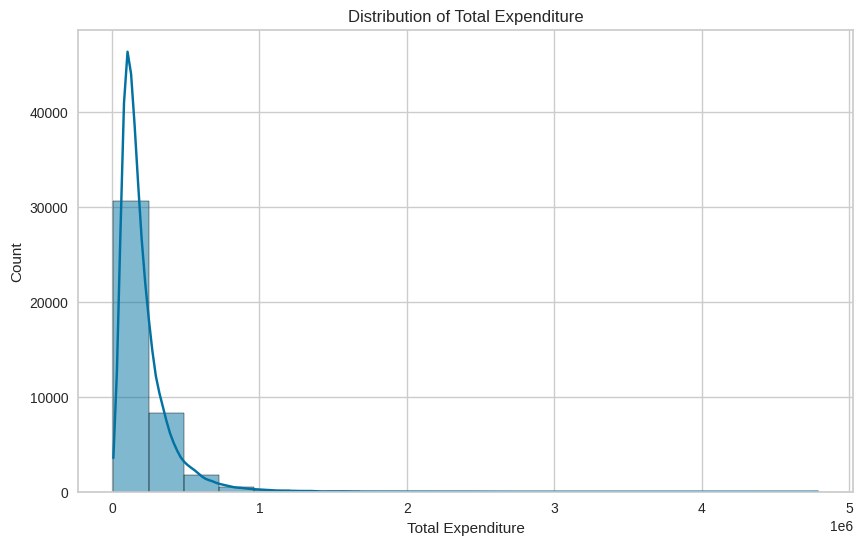

In [870]:
# Plot Total Expenditure
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Expenditure'], bins=20, kde=True)
plt.title('Distribution of Total Expenditure')
plt.xlabel('Total Expenditure')

Text(0.5, 0, 'Total Household Income')

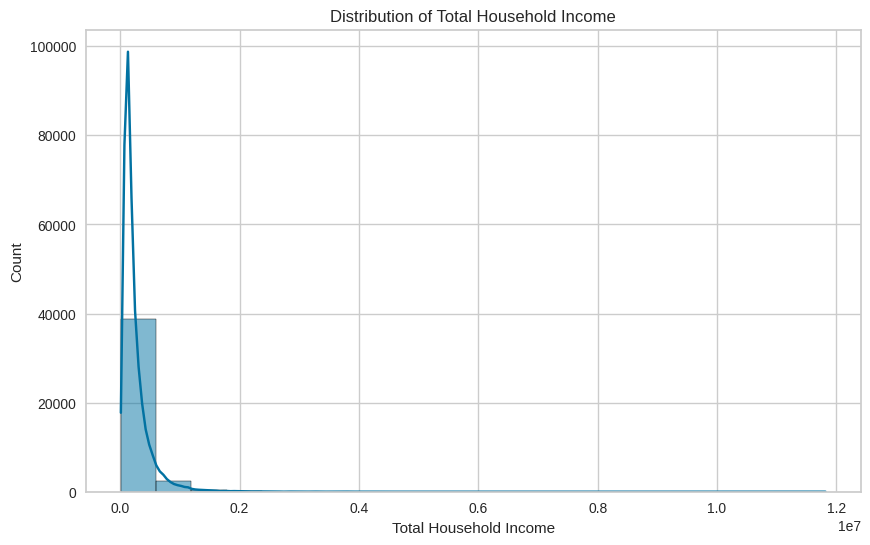

In [871]:
# Plot Total Household Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Household Income'], bins=20, kde=True)
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')

In [872]:
# Add Newly Created Expenditure Columns to Expenditure cols
expenditure_columns = np.append(expenditure_columns, 'Total_Essential_Spending')
expenditure_columns = np.append(expenditure_columns, 'Total_NonEssential_Spending')
expenditure_columns = np.append(expenditure_columns, 'Total Expenditure')

In [873]:
# Create Entrepreneurial_Income Percentage
df['Entrepreneurial_Income_Percentage'] = (df['Total Income from Entrepreneurial Acitivites'] / df['Total Household Income']) * 100

In [874]:
# Create Dependency Ratio
df['Dependency_Ratio'] = (df['Members with age less than 5 year old'] + df['Members with age 5 - 17 years old']) / df['Total number of family members employed']

# Handling division by zero (households with no employed members)
df['Dependency_Ratio'] = df['Dependency_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(10)  # Assign a high value for fully dependent households

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 66 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         41544 non-null  int64  
 1   Region                                         41544 non-null  object 
 2   Total Food Expenditure                         41544 non-null  int64  
 3   Main Source of Income                          41544 non-null  object 
 4   Agricultural Household indicator               41544 non-null  int64  
 5   Bread and Cereals Expenditure                  41544 non-null  int64  
 6   Total Rice Expenditure                         41544 non-null  int64  
 7   Meat Expenditure                               41544 non-null  int64  
 8   Total Fish and  marine products Expenditure    41544 non-null  int64  
 9   Fruit Expenditure                              415

In [876]:
# Categorize Luxury and Basic Assets
basic_assets = ['Number of Refrigerator/Freezer',
                'Number of Cellular phone',
                'Number of Stove with Oven/Gas Range',
                'Number of Washing Machine']

luxury_assets = ['Number of Television', 'Number of CD/VCD/DVD',
                 'Number of Landline/wireless telephones', 'Number of Airconditioner', 'Number of Car, Jeep, Van',
                 'Number of Personal Computer', 'Number of Component/Stereo set', 'Number of Motorcycle/Tricycle']

In [877]:
# Create Basic and Luxury Asset Indices
df['Basic_Asset_Index'] = df[basic_assets].sum(axis=1)
df['Luxury_Asset_Index'] = df[luxury_assets].sum(axis=1)

In [878]:
# Remove columns in both basic_assets and luxury_assets from numerical_columns
for col in basic_assets:
    if col in numerical_columns:
        numerical_columns = np.delete(numerical_columns, np.where(numerical_columns == col))

for col in luxury_assets:
    if col in numerical_columns:
        numerical_columns = np.delete(numerical_columns, np.where(numerical_columns == col))

Text(0, 0.5, 'Frequency')

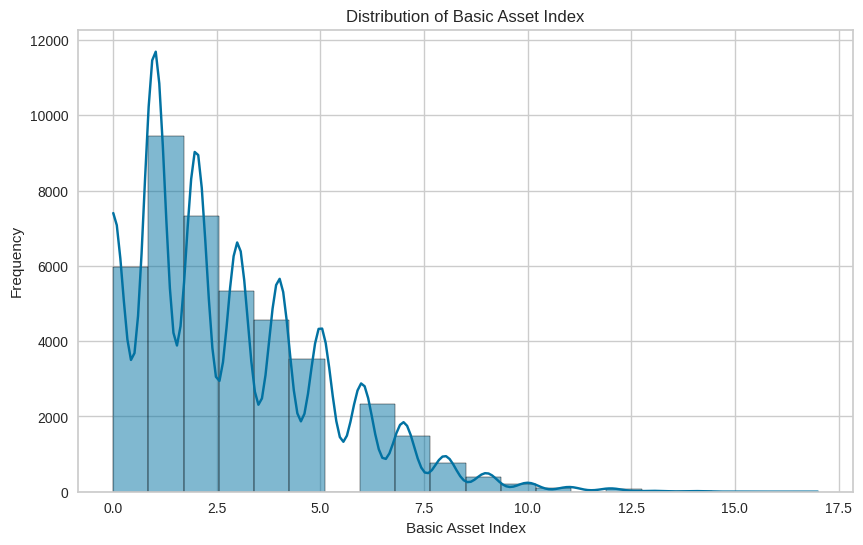

In [879]:
# Plot Basic Asset Index
plt.figure(figsize=(10, 6))
sns.histplot(df['Basic_Asset_Index'], bins=20, kde=True)
plt.title('Distribution of Basic Asset Index')
plt.xlabel('Basic Asset Index')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

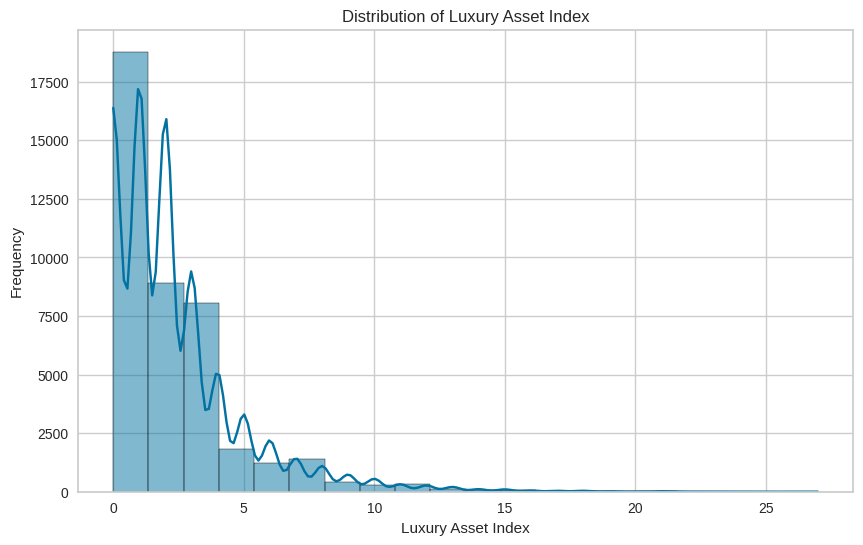

In [880]:
# Plot Luxury Assets
plt.figure(figsize=(10, 6))
sns.histplot(df['Luxury_Asset_Index'], bins=20, kde=True)
plt.title('Distribution of Luxury Asset Index')
plt.xlabel('Luxury Asset Index')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Expenditure')

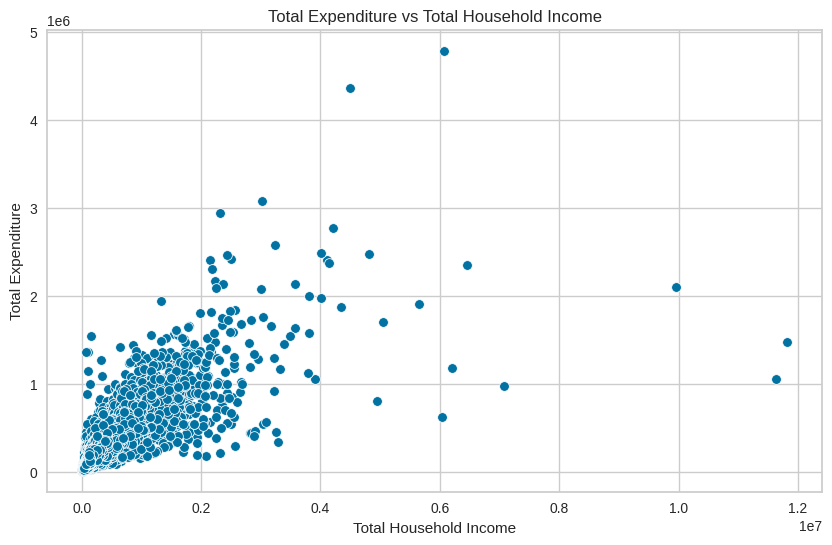

In [881]:
# Plot Total Expenditure vs Total Household Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Household Income', y='Total Expenditure')
plt.title('Total Expenditure vs Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Total Expenditure')

Text(0.5, 0, 'Basic Asset Index')

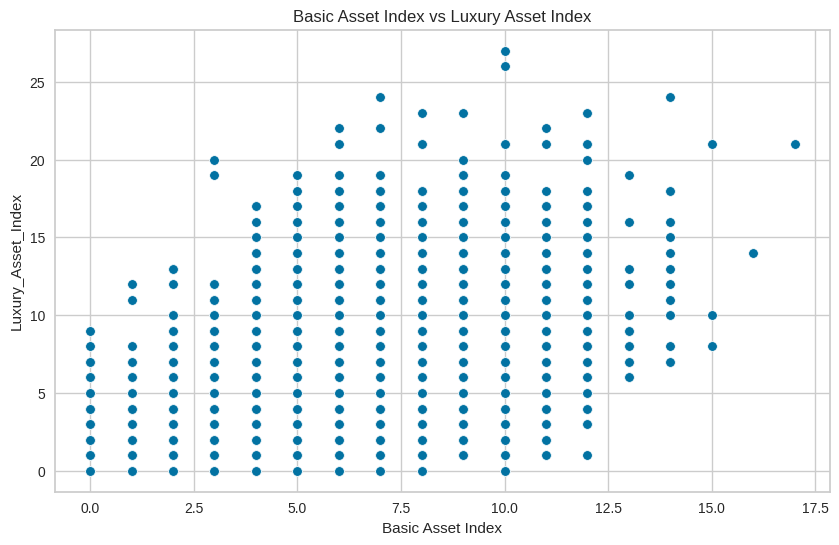

In [882]:
# Plot Luxury vs Basic Assets
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Basic_Asset_Index', y='Luxury_Asset_Index')
plt.title('Basic Asset Index vs Luxury Asset Index')
plt.xlabel('Basic Asset Index')

In [883]:
# Add Newly Created Numerical Columns to Numerical Cols
numerical_columns = np.append(numerical_columns, 'Total_Essential_Spending')
numerical_columns = np.append(numerical_columns, 'Total_NonEssential_Spending')
numerical_columns = np.append(numerical_columns, 'Entrepreneurial_Income_Percentage')
numerical_columns = np.append(numerical_columns, 'Dependency_Ratio')
numerical_columns = np.append(numerical_columns, 'Basic_Asset_Index')
numerical_columns = np.append(numerical_columns, 'Luxury_Asset_Index')

In [884]:
# Duplicate dataset
df_copy = df.copy()

In [885]:
''' Columns to keep for Expenditure:
- Total Food Expenditure
- Restaurant and hotels Expenditure
- Housing and water Expenditure
- Alcoholic Beverages Expenditure
- Tobacco Expenditure
- Clothing, Footwear and Other Wear Expenditure
- Miscellaneous Goods and Services Expenditure
- Special Occasions Expenditure
- Medical Care Expenditure
- Education Expenditure
- Communication Expenditure
- Transportation Expenditure
- Crop Farming and Gardening expenses
- Total_Essential_Spending
- Total_NonEssential_Spending
- Total Expenditure
'''

' Columns to keep for Expenditure:\n- Total Food Expenditure\n- Restaurant and hotels Expenditure\n- Housing and water Expenditure\n- Alcoholic Beverages Expenditure\n- Tobacco Expenditure\n- Clothing, Footwear and Other Wear Expenditure\n- Miscellaneous Goods and Services Expenditure\n- Special Occasions Expenditure\n- Medical Care Expenditure\n- Education Expenditure\n- Communication Expenditure\n- Transportation Expenditure\n- Crop Farming and Gardening expenses\n- Total_Essential_Spending\n- Total_NonEssential_Spending\n- Total Expenditure\n'

In [886]:
# Create Modified expenditure columns
modified_expenditure_columns = ['Total Food Expenditure', 'Restaurant and hotels Expenditure',
                                'Housing and water Expenditure', 'Alcoholic Beverages Expenditure',
                                'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
                                'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Medical Care Expenditure',
                                'Education Expenditure', 'Communication Expenditure', 'Transportation Expenditure', 'Crop Farming and Gardening expenses',
                                'Total_Essential_Spending', 'Total_NonEssential_Spending', 'Total Expenditure']

In [887]:
# Remove columns in the dataframe that does not exists in both modified_expenditure_columns and expenditure_columns
for col in expenditure_columns:
    if col not in modified_expenditure_columns:
        df_copy.drop(col, axis=1, inplace=True)

In [888]:
# Remove columns in the dataframe from basic assets
for col in basic_assets:
    if col not in numerical_columns:
        df_copy.drop(col, axis=1, inplace=True)

In [889]:
# Remove columns in the dataframe from luxury assets
for col in luxury_assets:
    if col not in numerical_columns:
        df_copy.drop(col, axis=1, inplace=True)

In [890]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         41544 non-null  int64  
 1   Region                                         41544 non-null  object 
 2   Total Food Expenditure                         41544 non-null  int64  
 3   Main Source of Income                          41544 non-null  object 
 4   Agricultural Household indicator               41544 non-null  int64  
 5   Restaurant and hotels Expenditure              41544 non-null  int64  
 6   Alcoholic Beverages Expenditure                41544 non-null  int64  
 7   Tobacco Expenditure                            41544 non-null  int64  
 8   Clothing, Footwear and Other Wear Expenditure  41544 non-null  int64  
 9   Housing and water Expenditure                  415

In [891]:
# Merge expenditure, income columns for outlier checking into another array
expenditure_income_columns = np.append(modified_expenditure_columns, income_columns)

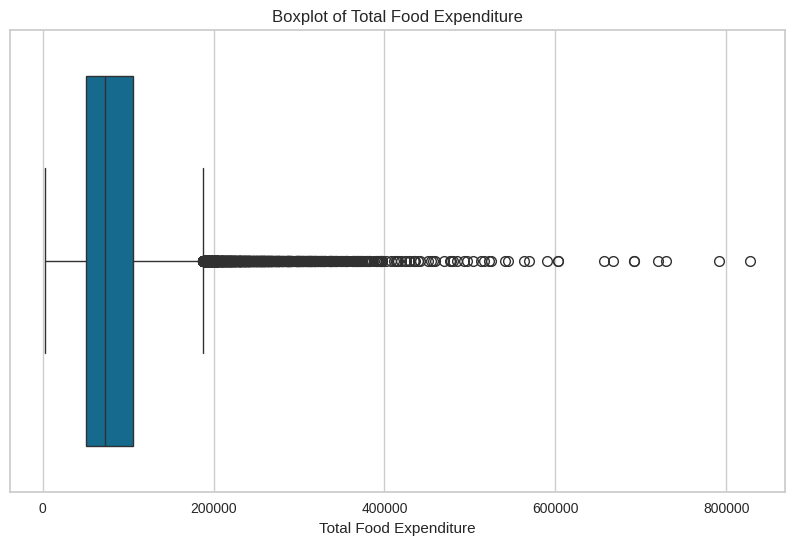

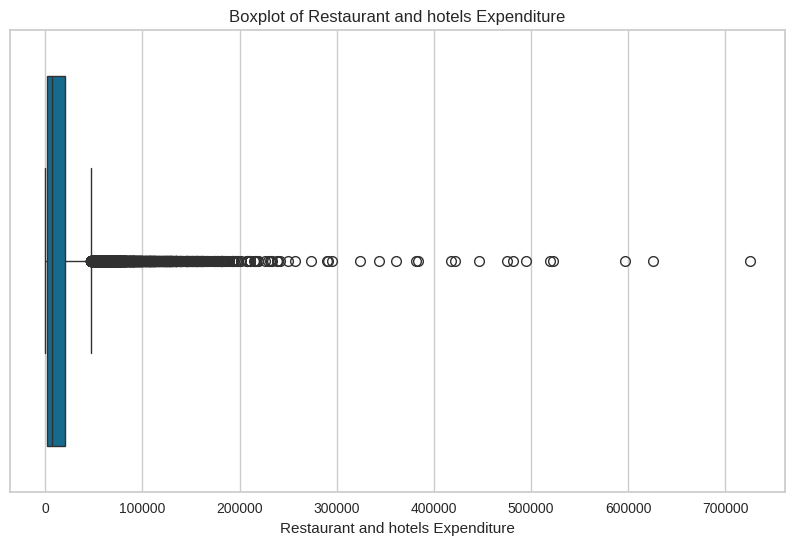

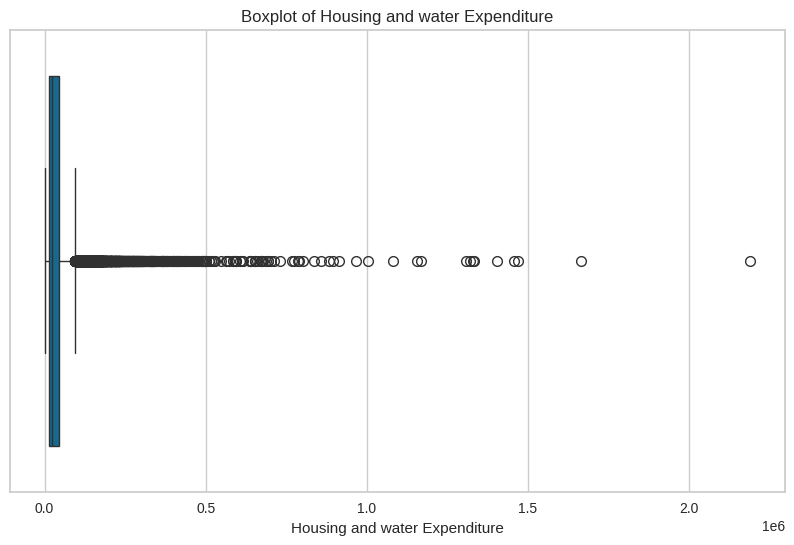

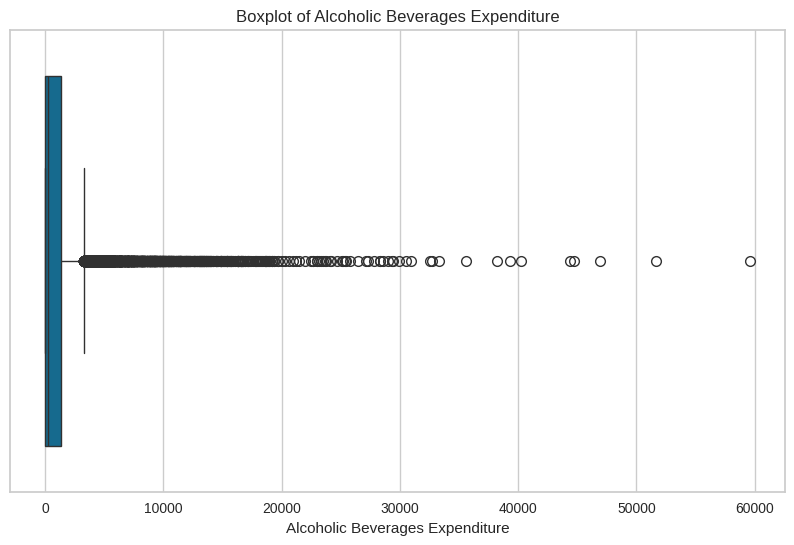

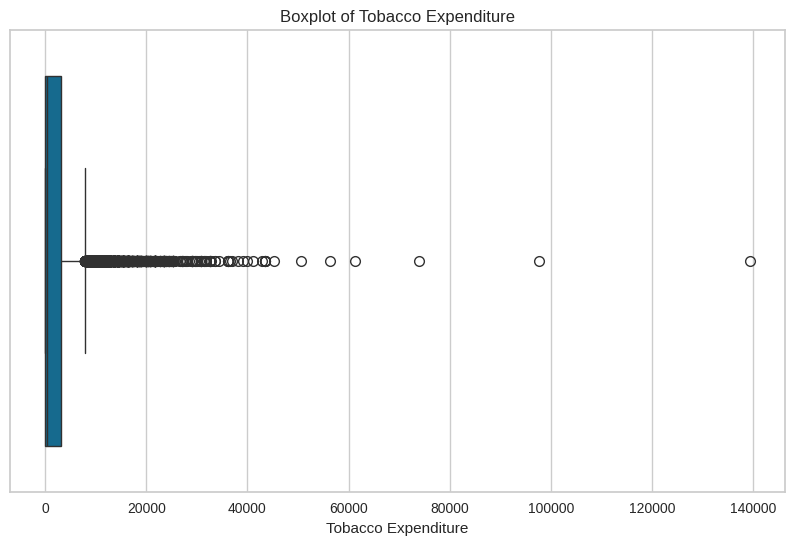

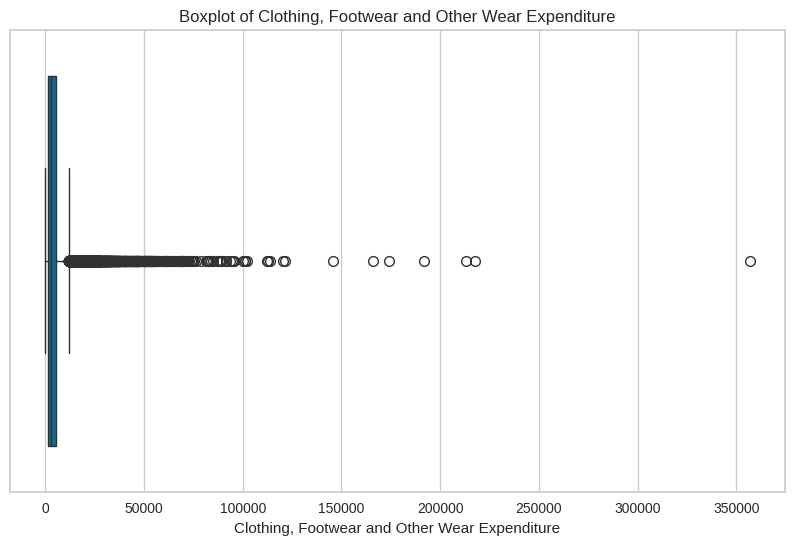

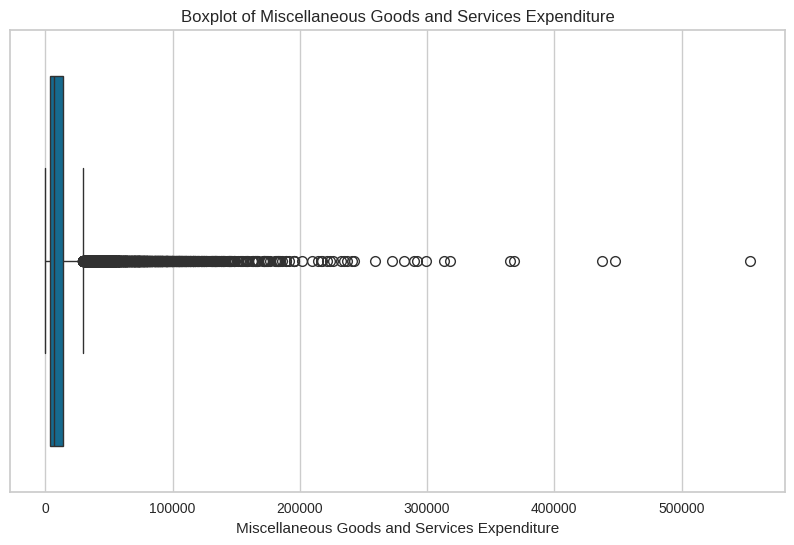

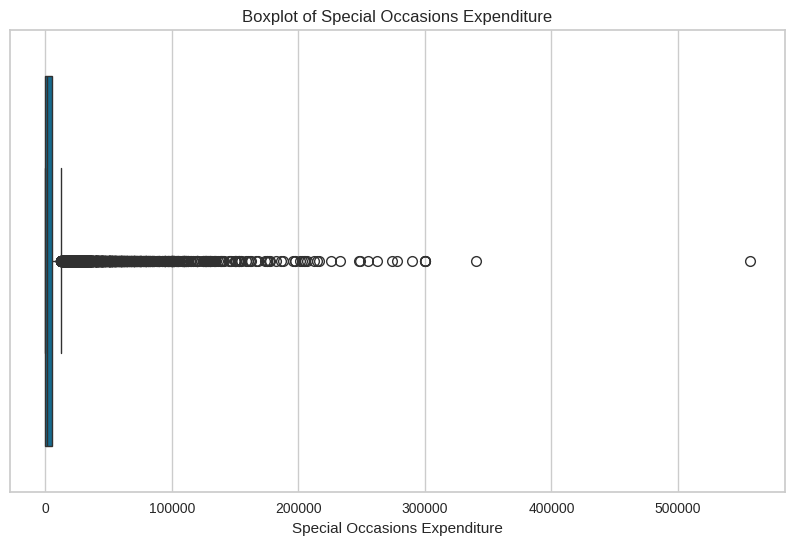

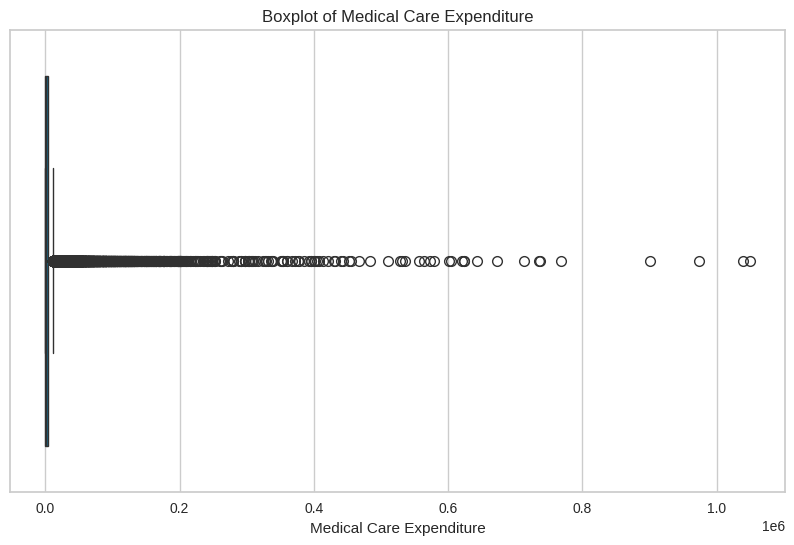

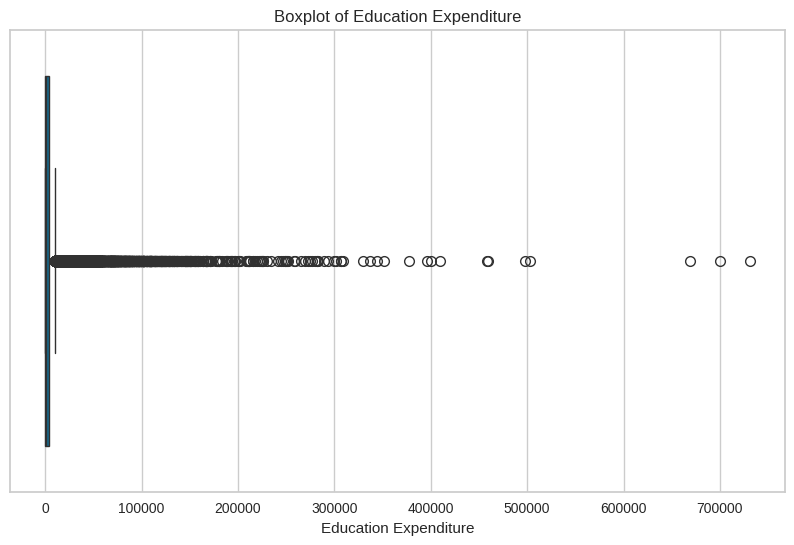

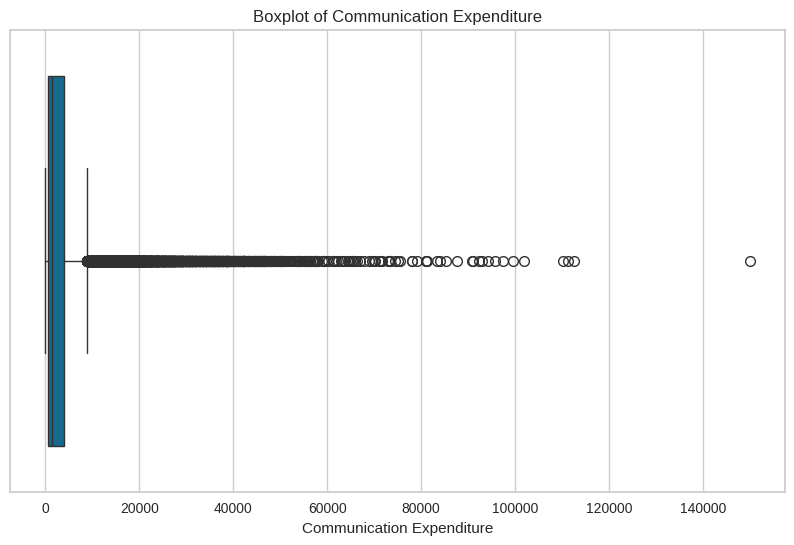

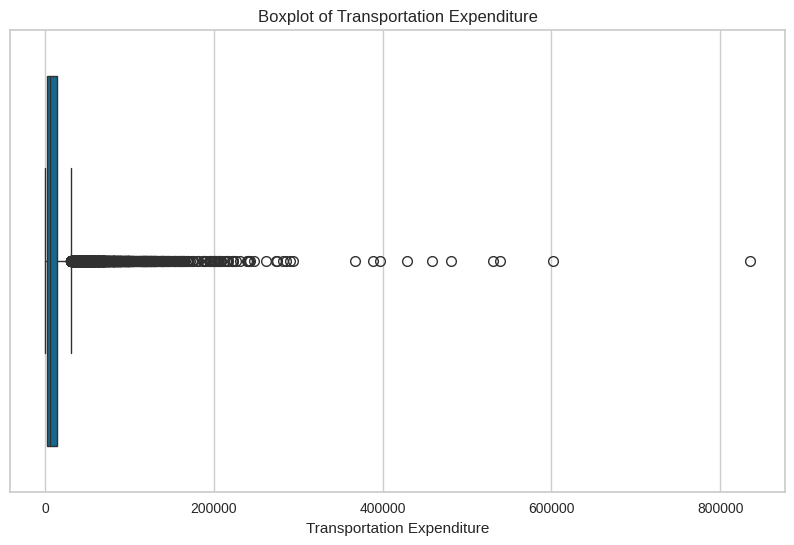

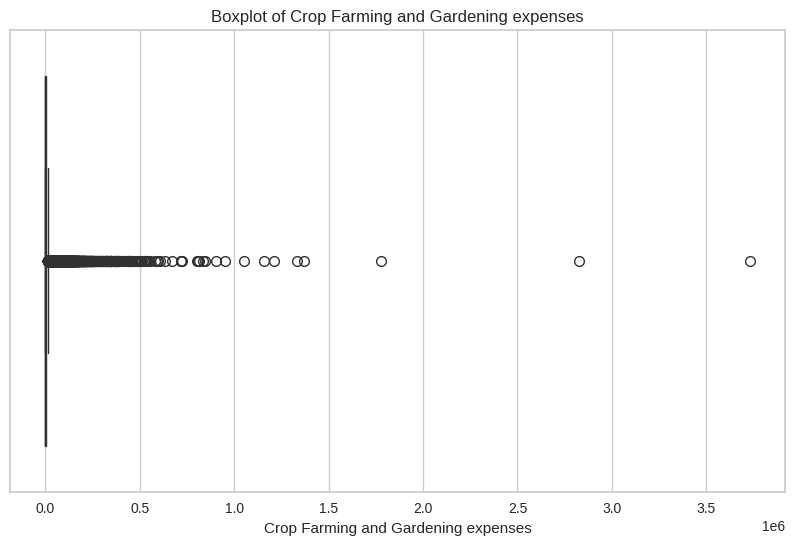

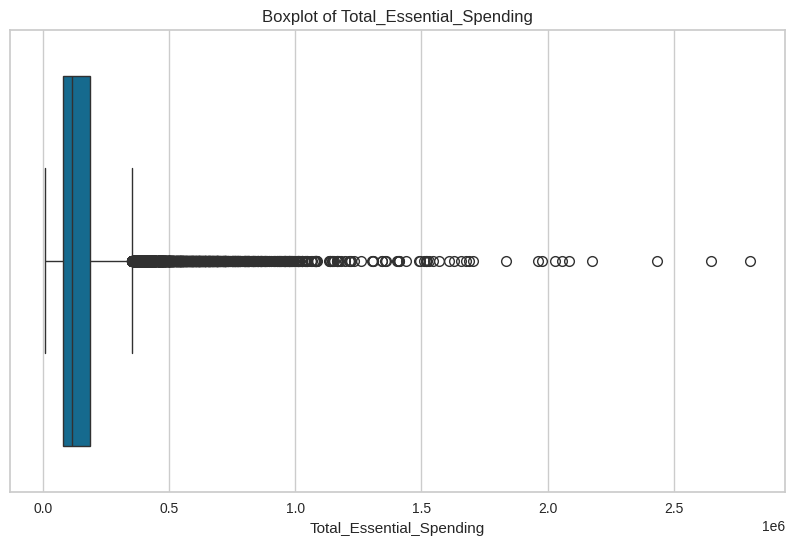

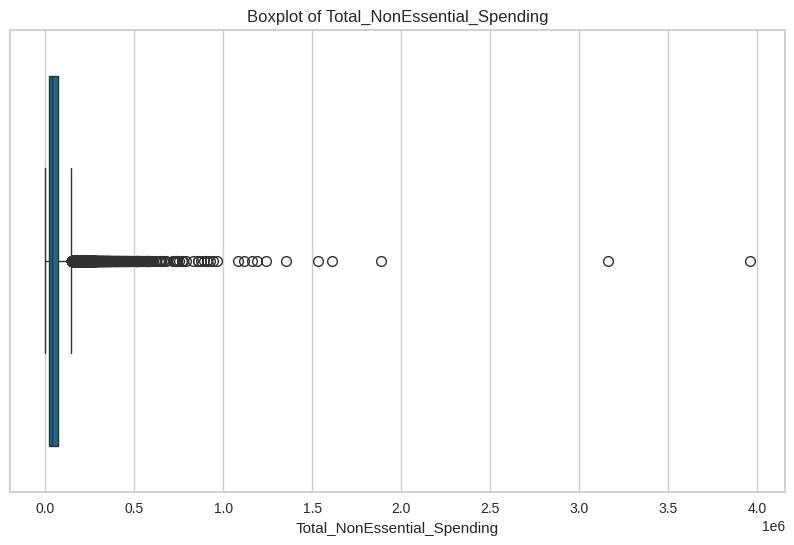

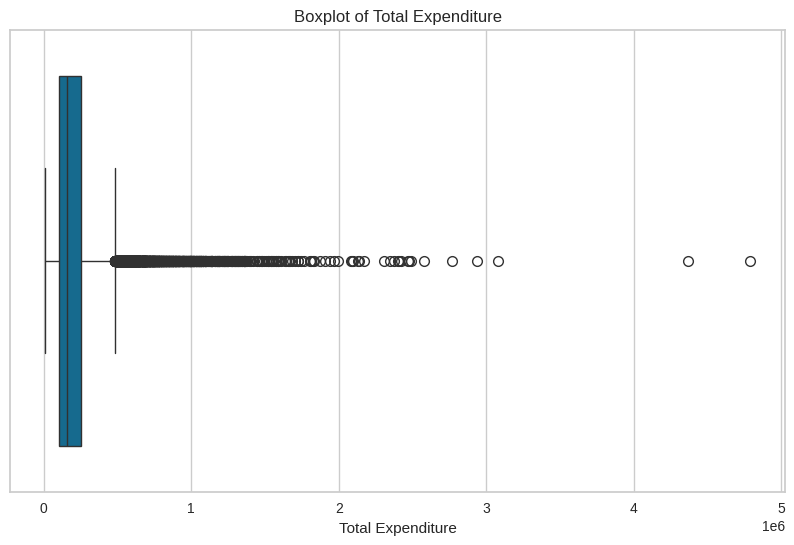

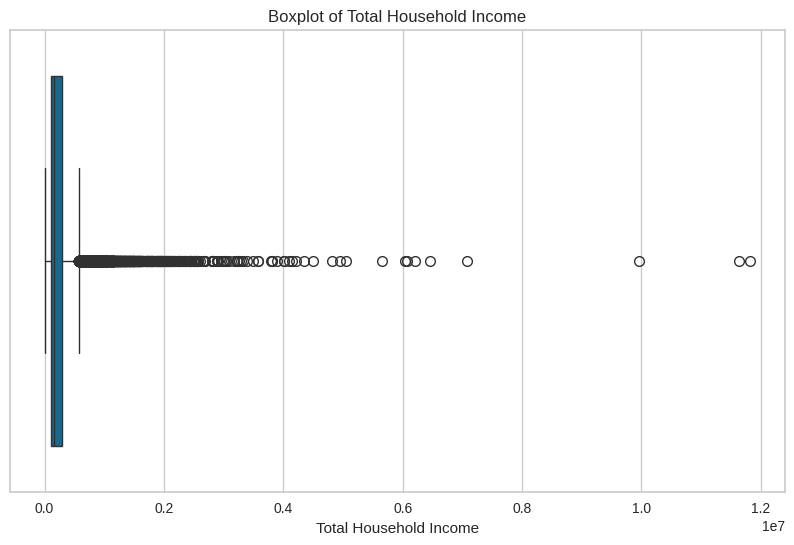

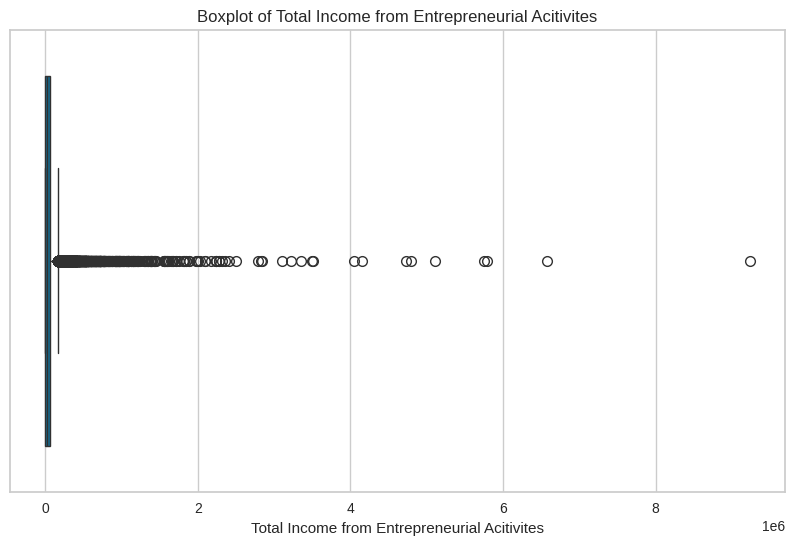

In [892]:
# Boxplot of all columns in df_copy before Outlier removal
for col in expenditure_income_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_copy[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [893]:
# import counter
from collections import Counter

def IQR_method(df, n, features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:  # Iterate over numerical columns only

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0] + df2.shape[0])

    return multiple_outliers

In [894]:
# detecting outliers
Outliers_IQR = IQR_method(df_copy,3,expenditure_income_columns)

Total number of outliers is: 2660


In [895]:
# Create separate dataframe from outliers
df_extracted_outliers = df_copy.loc[Outliers_IQR]

In [896]:
# dropping outliers
df_copy = df_copy.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [897]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35945 entries, 0 to 35944
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         35945 non-null  int64  
 1   Region                                         35945 non-null  object 
 2   Total Food Expenditure                         35945 non-null  int64  
 3   Main Source of Income                          35945 non-null  object 
 4   Agricultural Household indicator               35945 non-null  int64  
 5   Restaurant and hotels Expenditure              35945 non-null  int64  
 6   Alcoholic Beverages Expenditure                35945 non-null  int64  
 7   Tobacco Expenditure                            35945 non-null  int64  
 8   Clothing, Footwear and Other Wear Expenditure  35945 non-null  int64  
 9   Housing and water Expenditure                  359

In [898]:
df_extracted_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5599 entries, 51 to 40756
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         5599 non-null   int64  
 1   Region                                         5599 non-null   object 
 2   Total Food Expenditure                         5599 non-null   int64  
 3   Main Source of Income                          5599 non-null   object 
 4   Agricultural Household indicator               5599 non-null   int64  
 5   Restaurant and hotels Expenditure              5599 non-null   int64  
 6   Alcoholic Beverages Expenditure                5599 non-null   int64  
 7   Tobacco Expenditure                            5599 non-null   int64  
 8   Clothing, Footwear and Other Wear Expenditure  5599 non-null   int64  
 9   Housing and water Expenditure                  5599 non

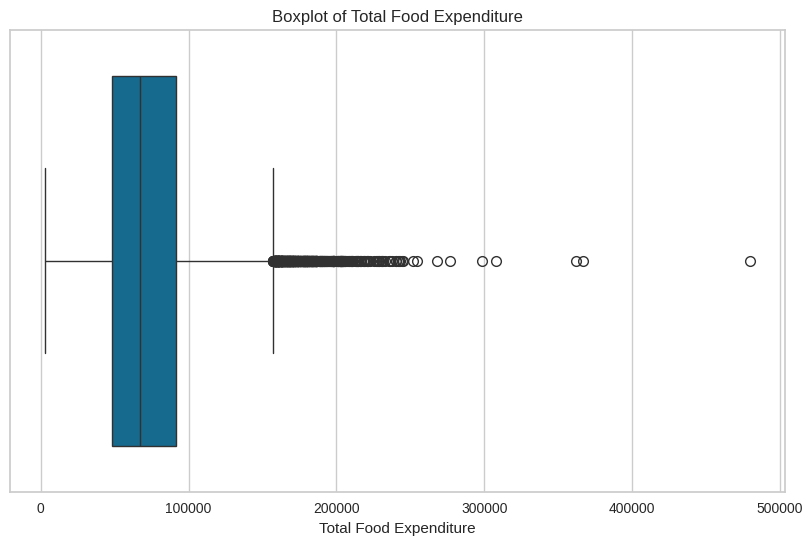

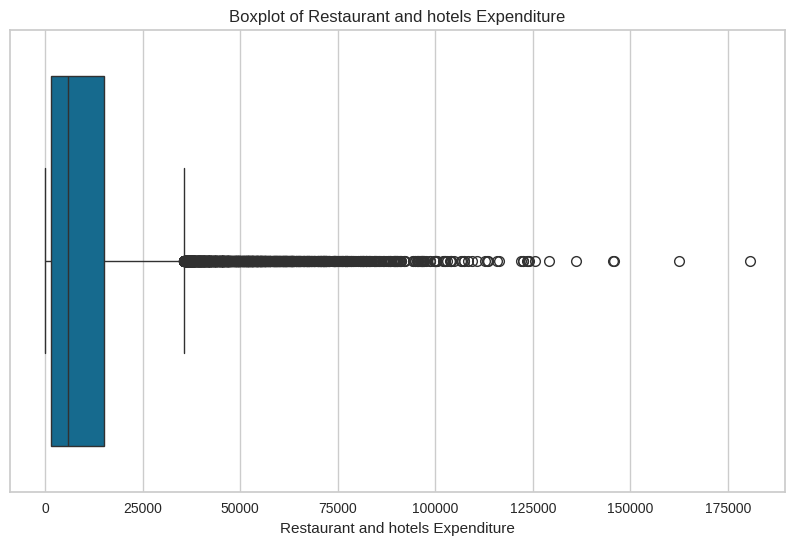

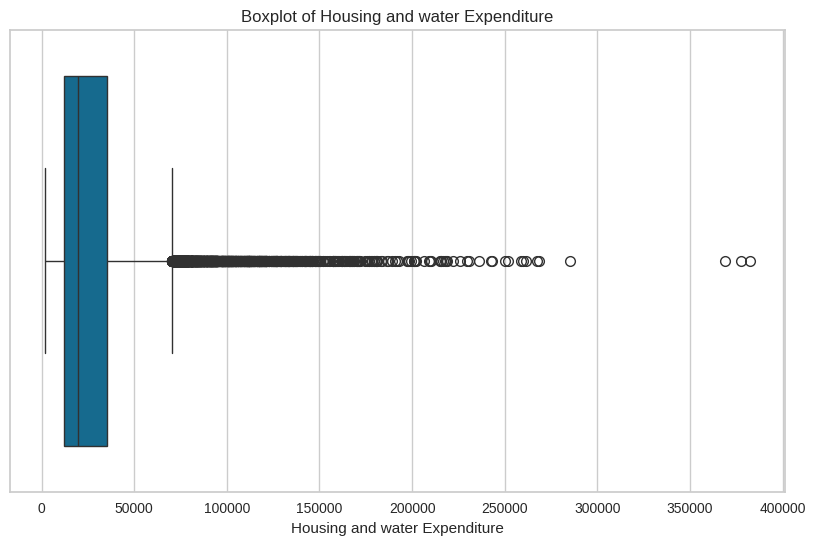

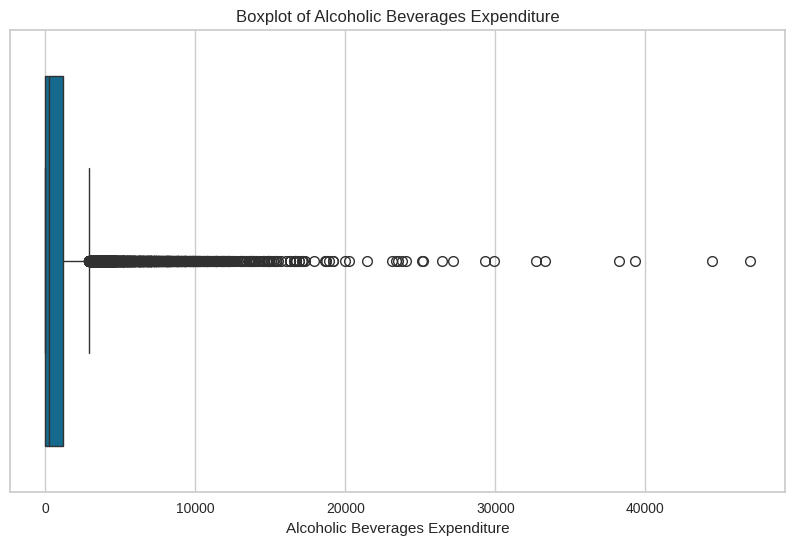

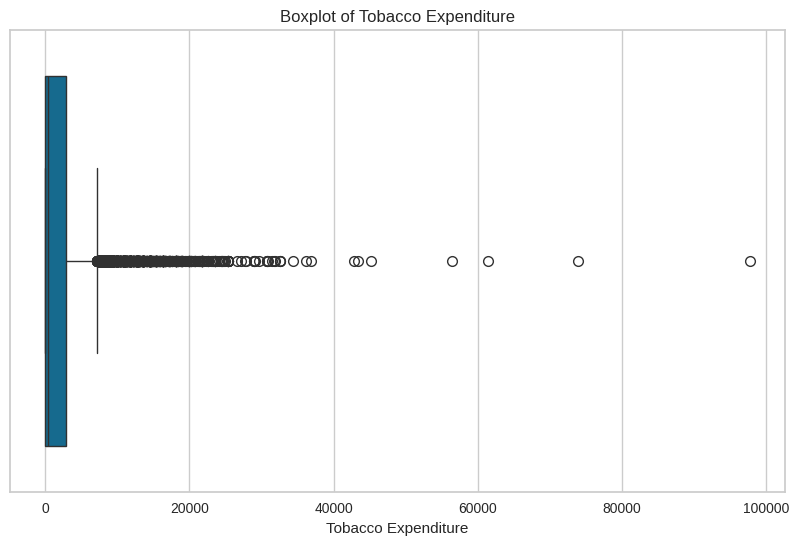

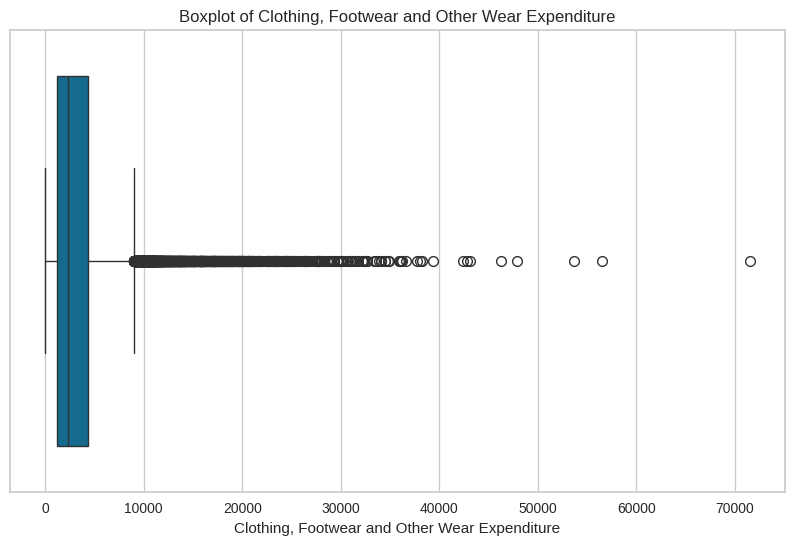

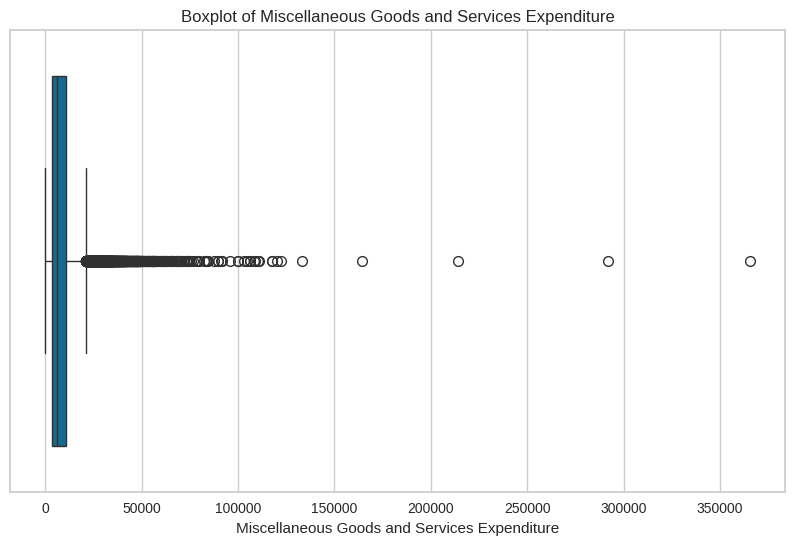

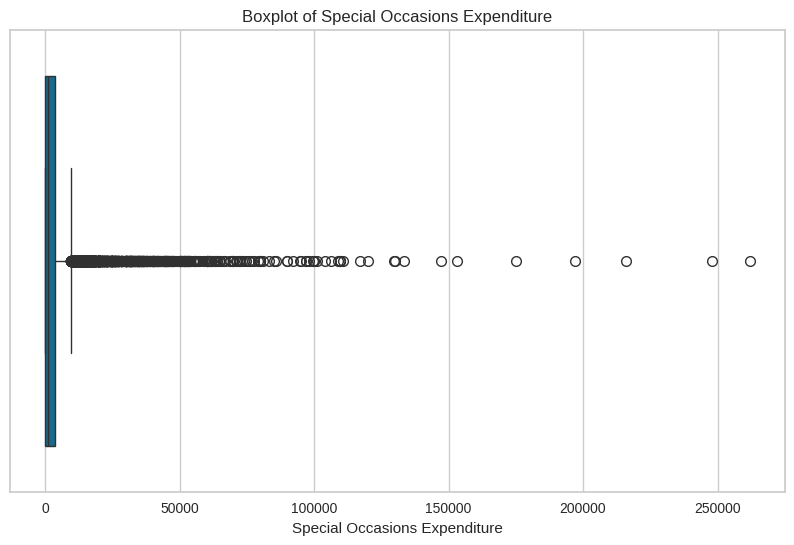

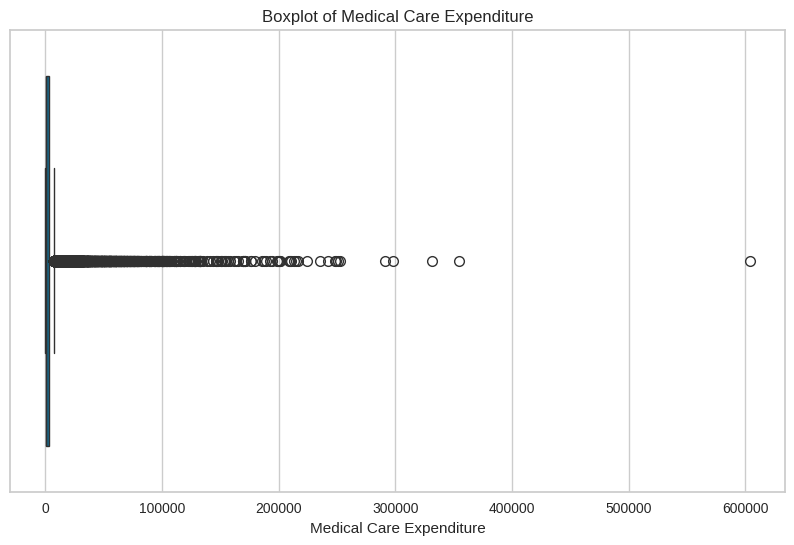

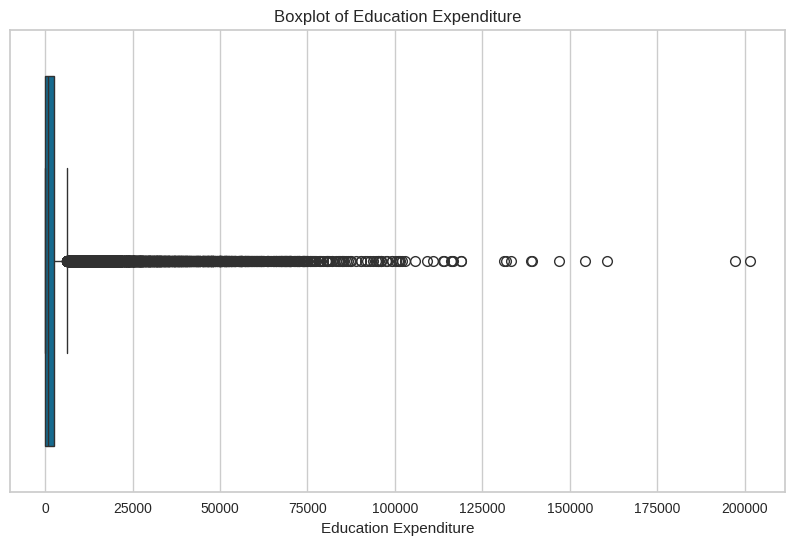

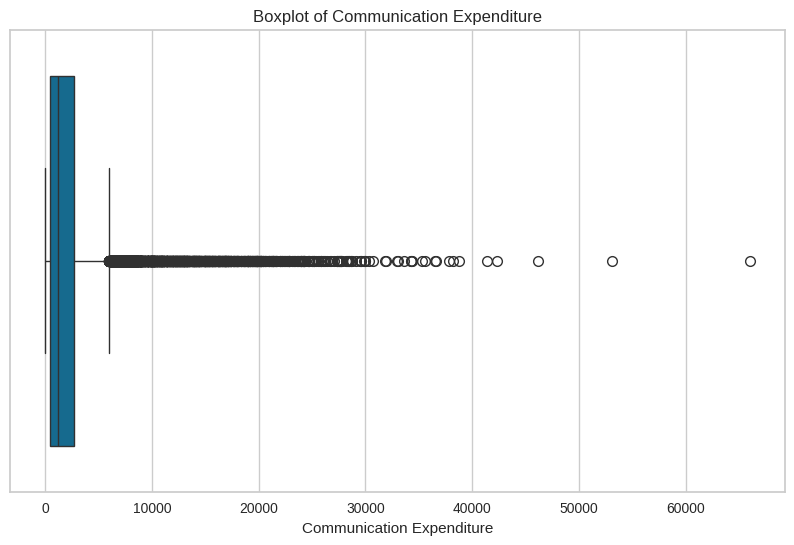

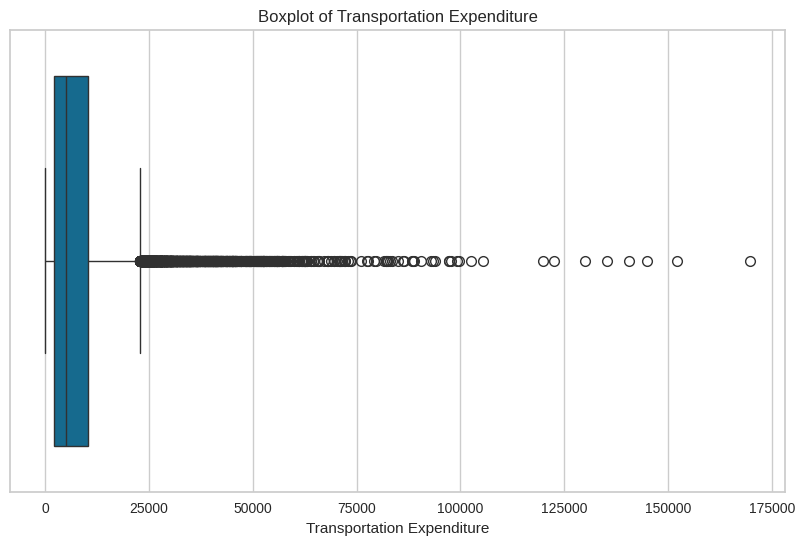

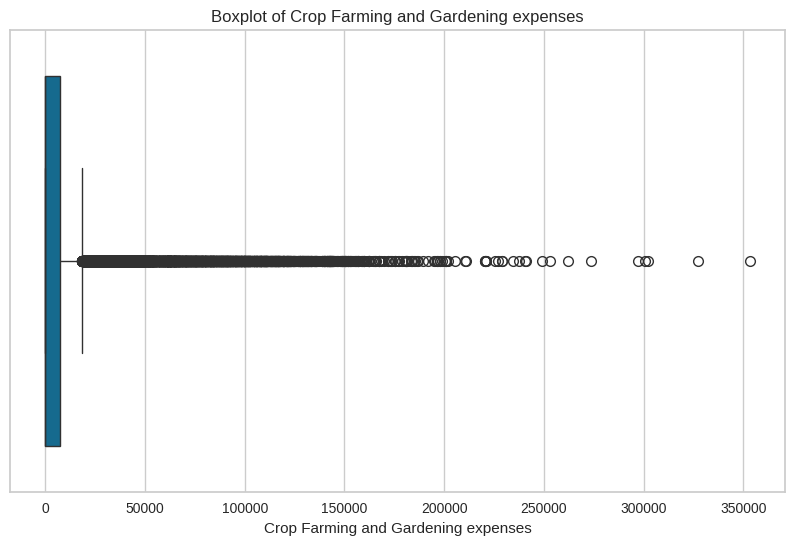

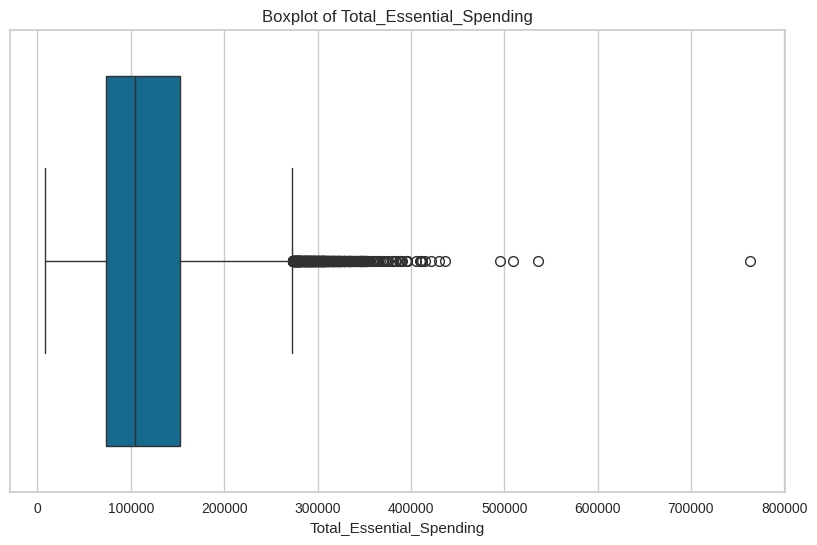

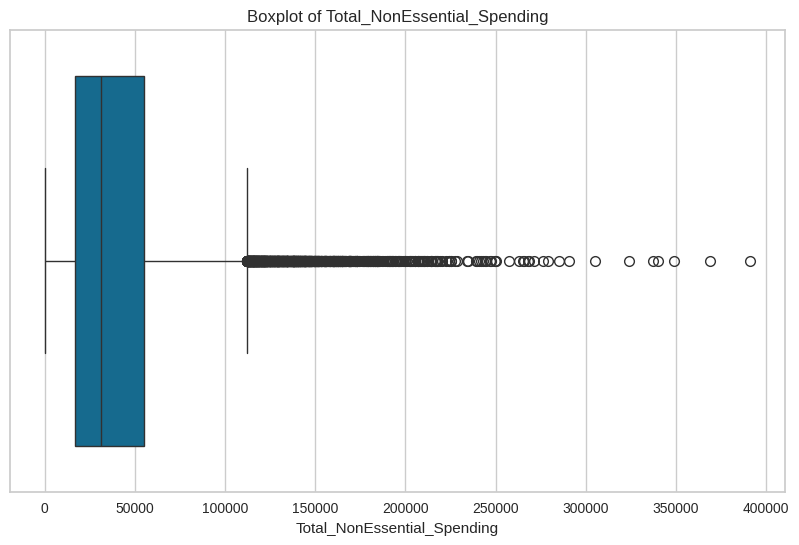

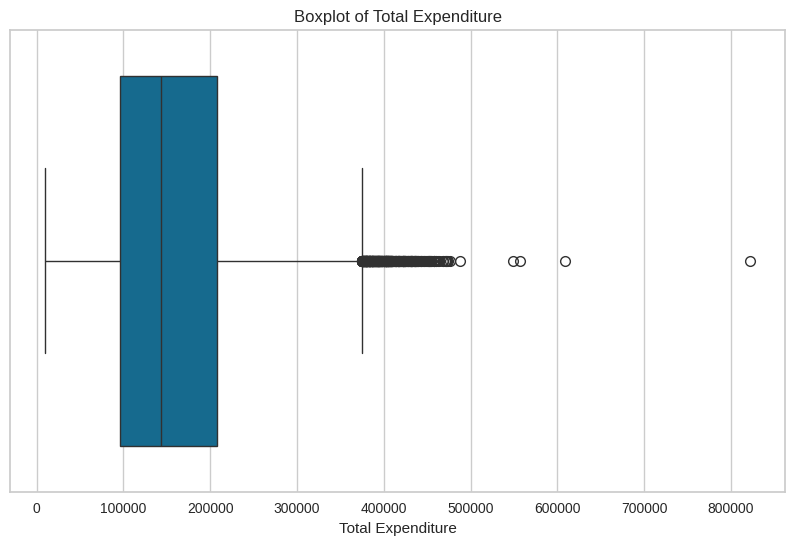

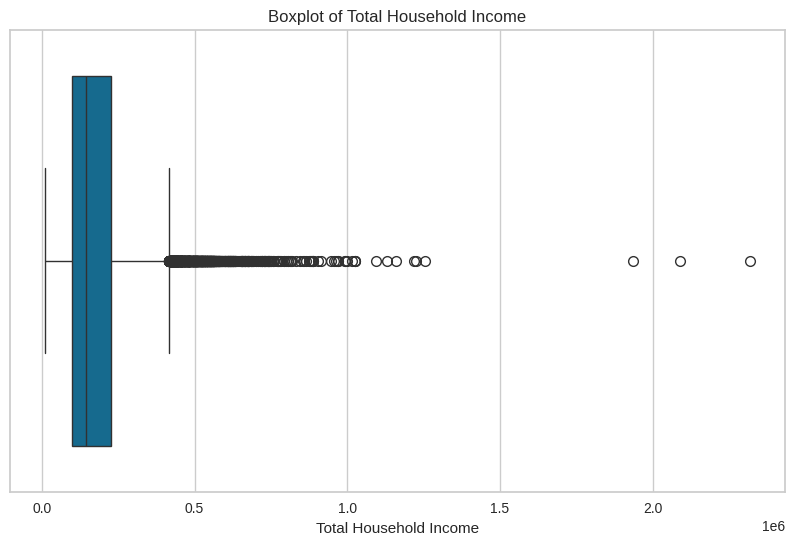

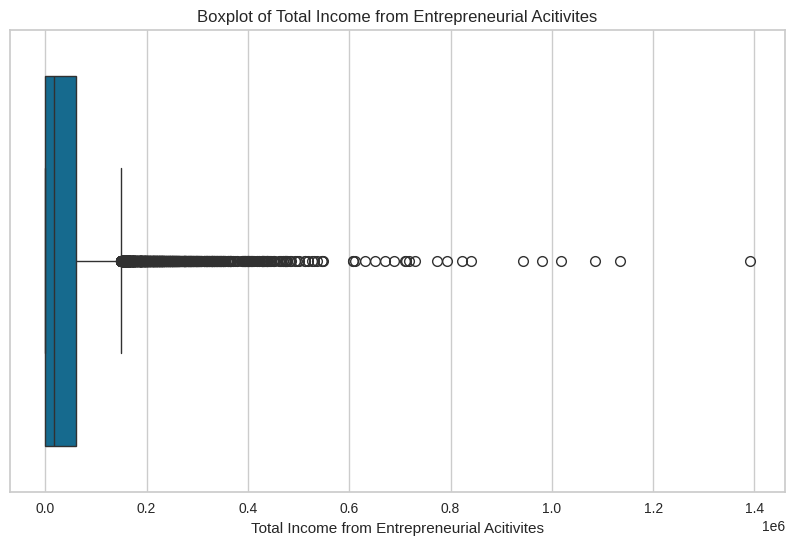

In [899]:
# Boxplot of all columns in df_copy After Outlier removal
for col in expenditure_income_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_copy[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [414]:
# Log Transform All Expenditures and Income
df_copy[modified_expenditure_columns] = df_copy[modified_expenditure_columns].apply(np.log1p)
df_copy[income_columns] = df_copy[income_columns].apply(np.log1p)

In [416]:
# Refresh numerical_columns
numerical_columns = df_copy.select_dtypes(include=[np.number]).columns

In [417]:
# Scale numerical Features for clustering Analysis
# scaler = StandardScaler()
scaler = MinMaxScaler()
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

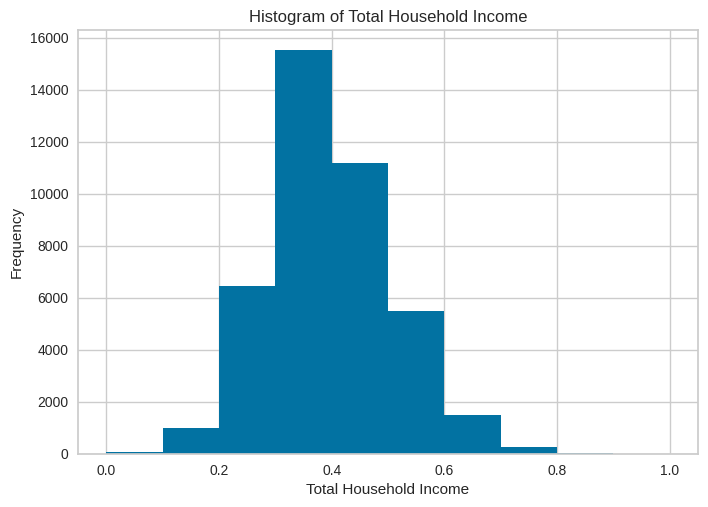

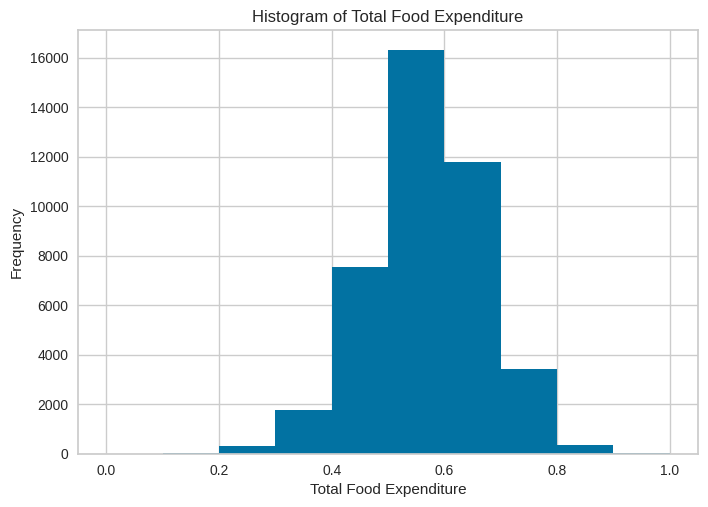

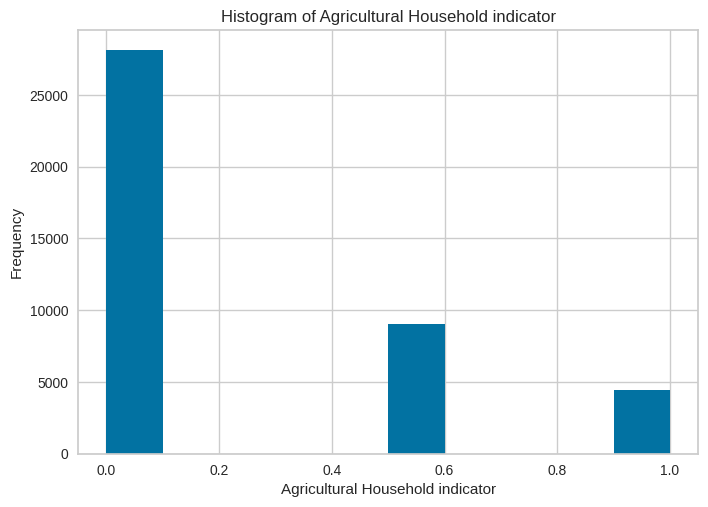

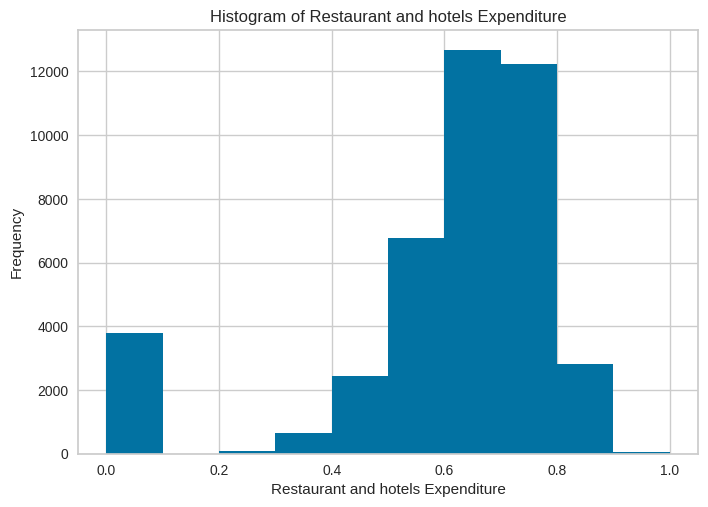

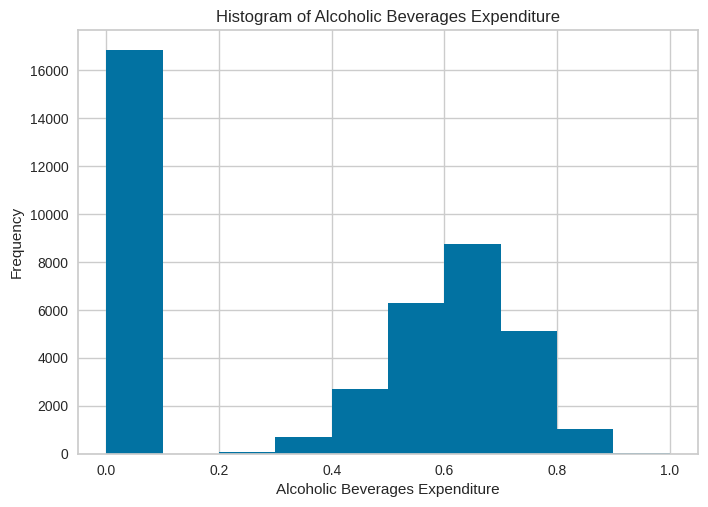

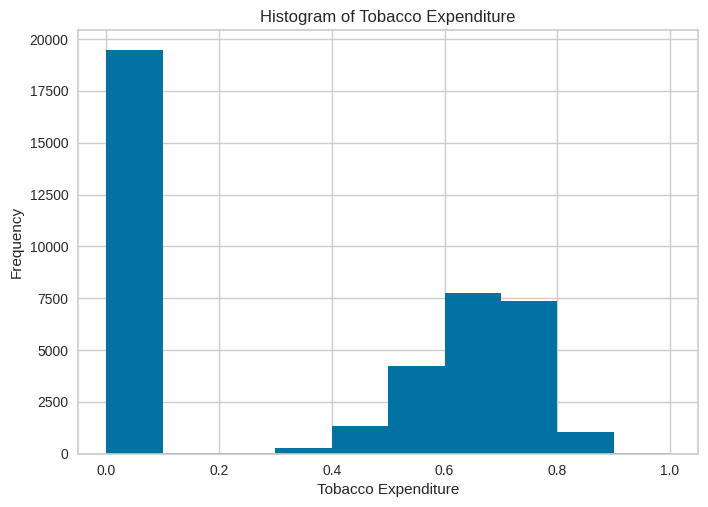

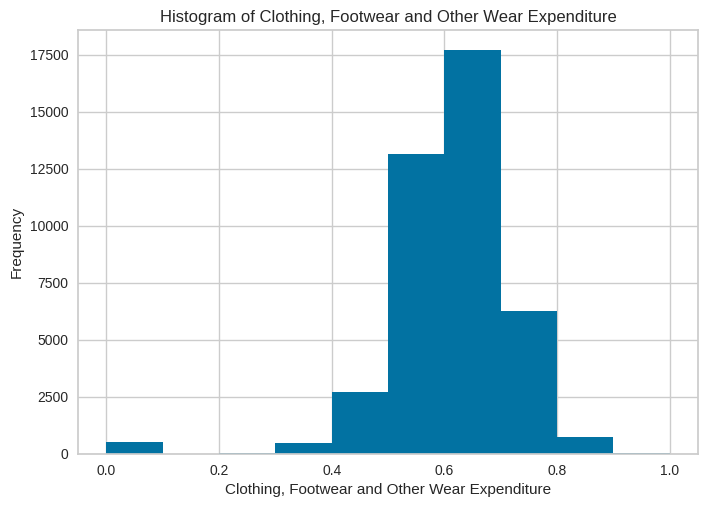

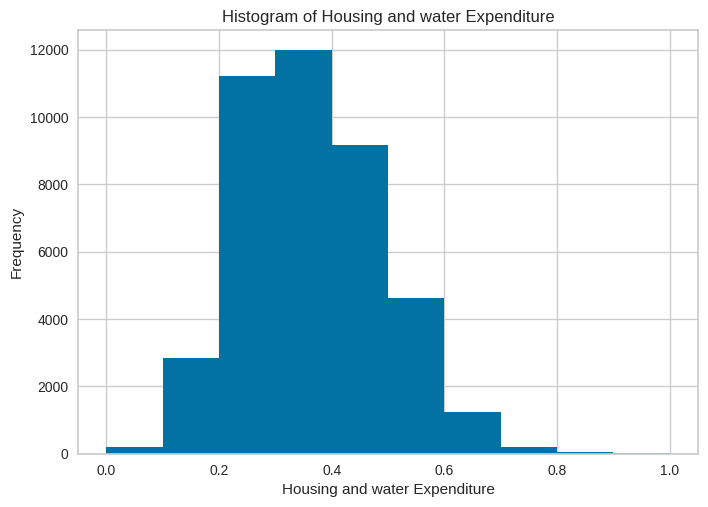

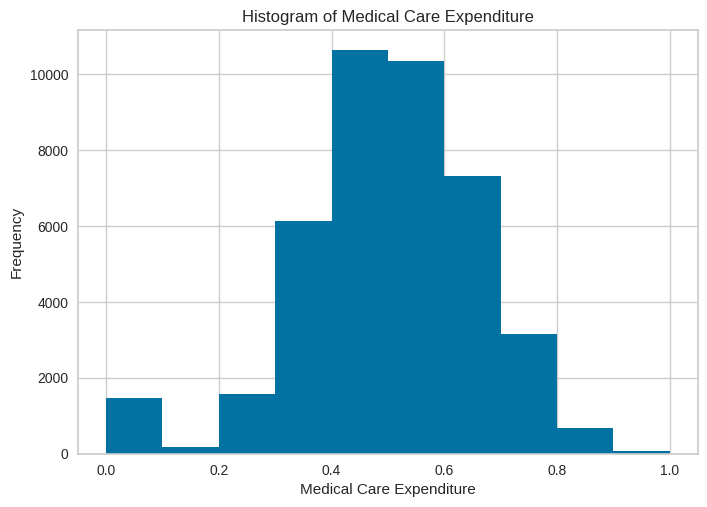

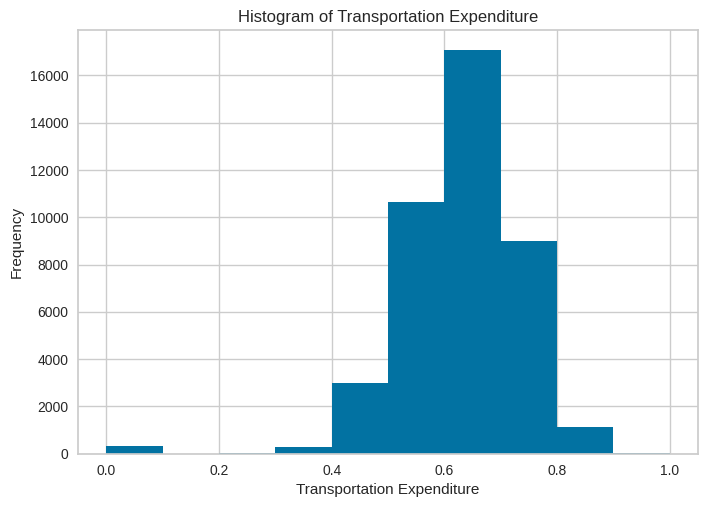

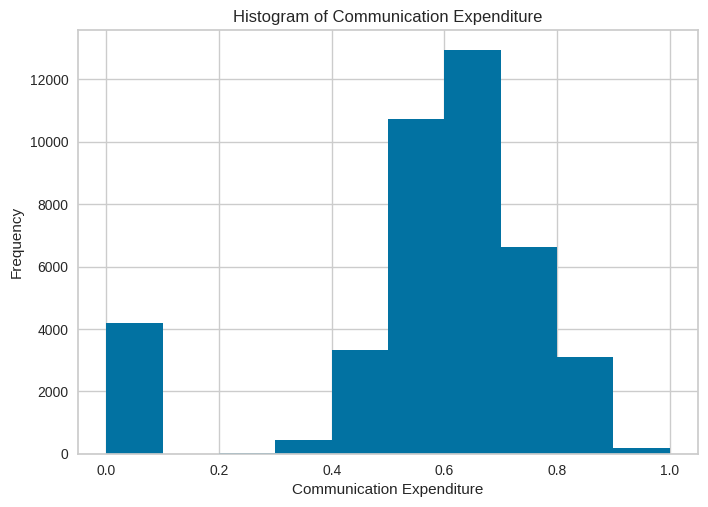

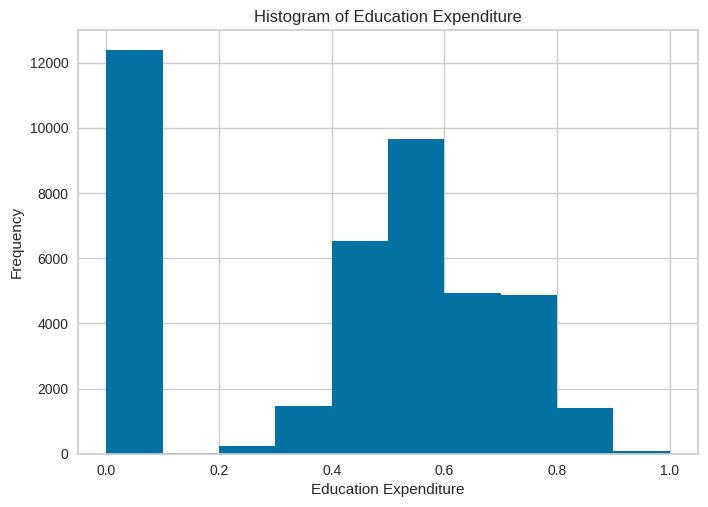

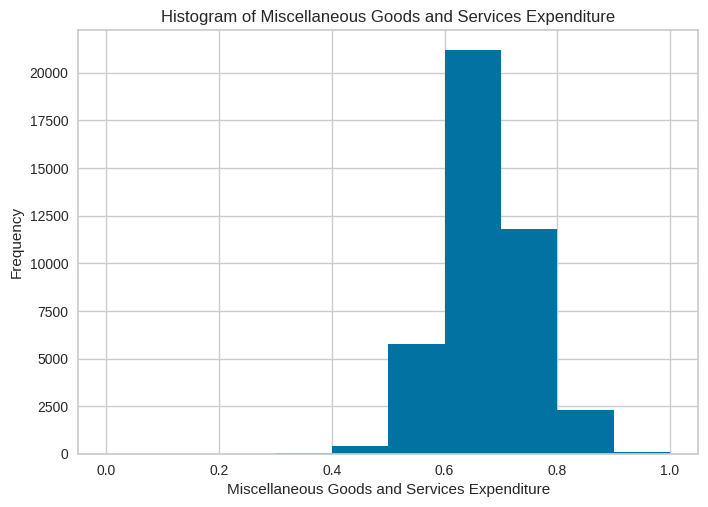

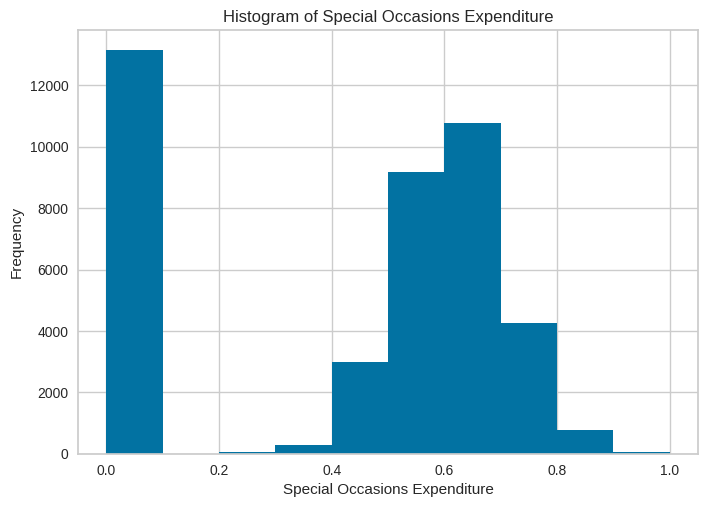

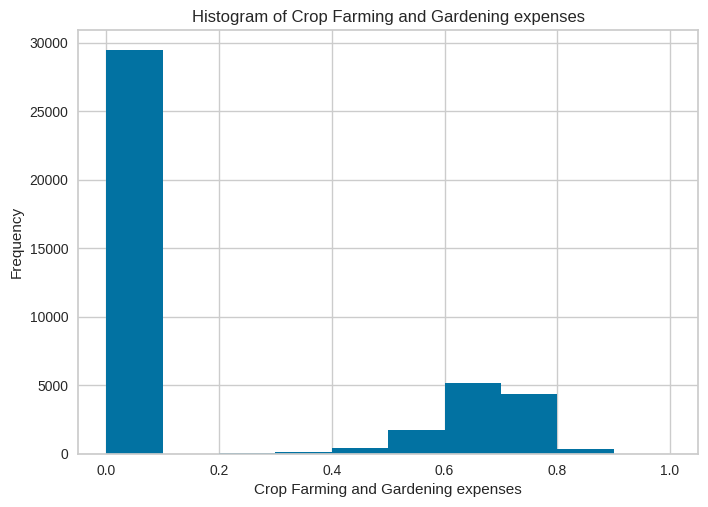

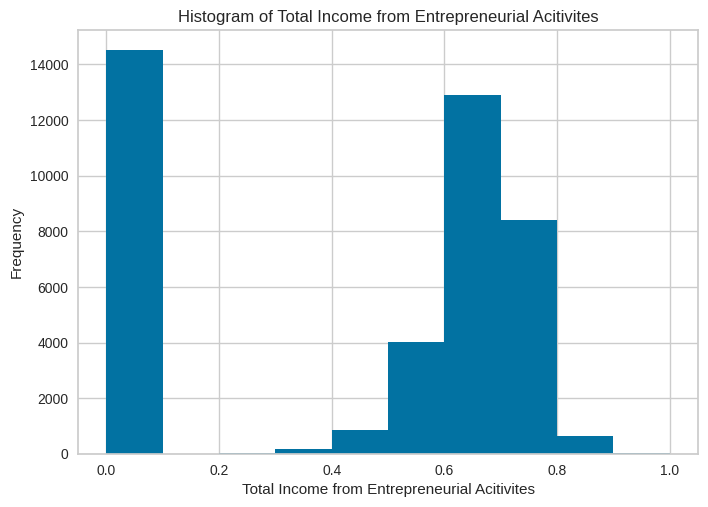

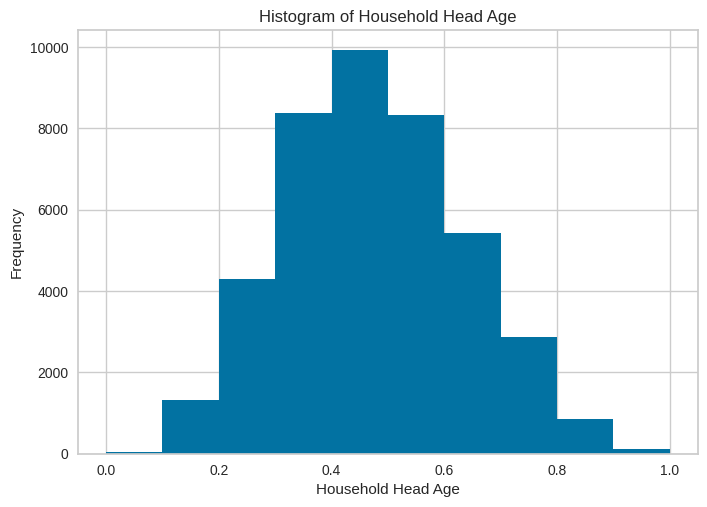

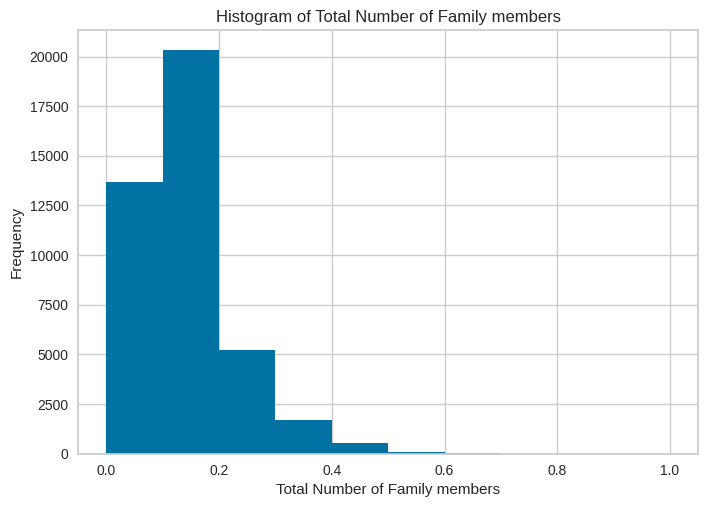

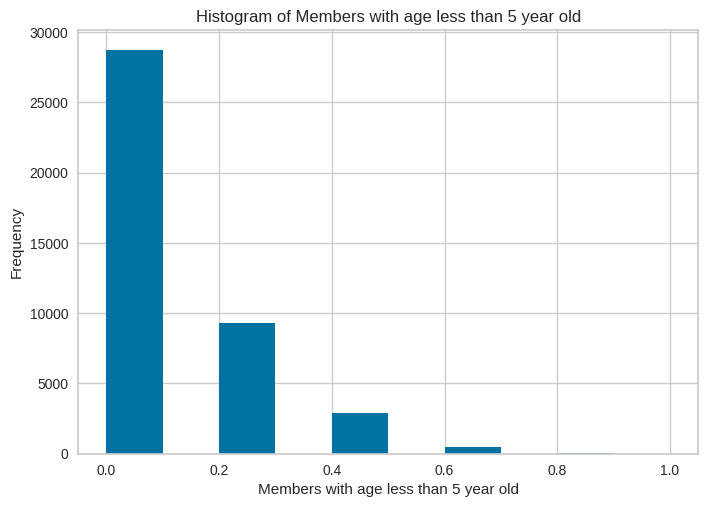

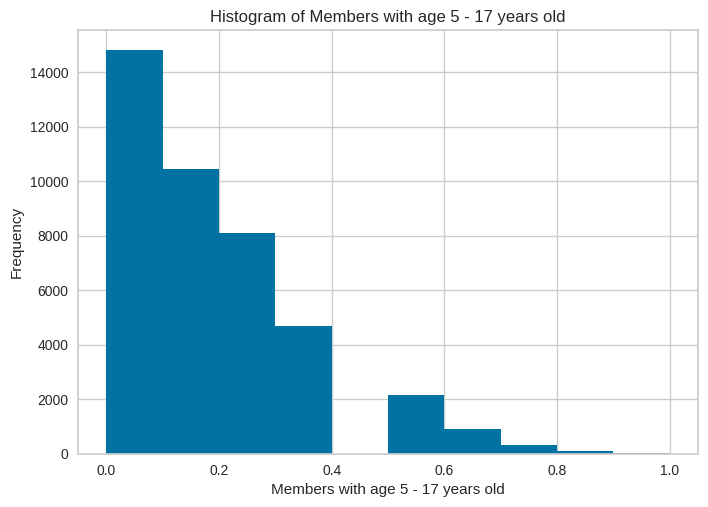

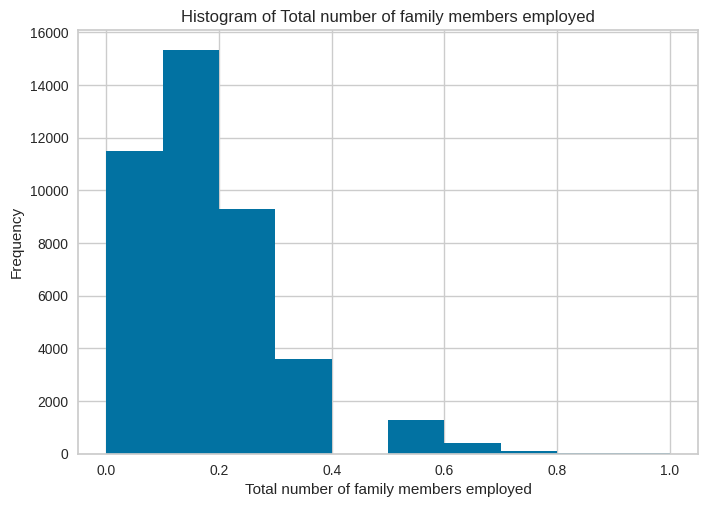

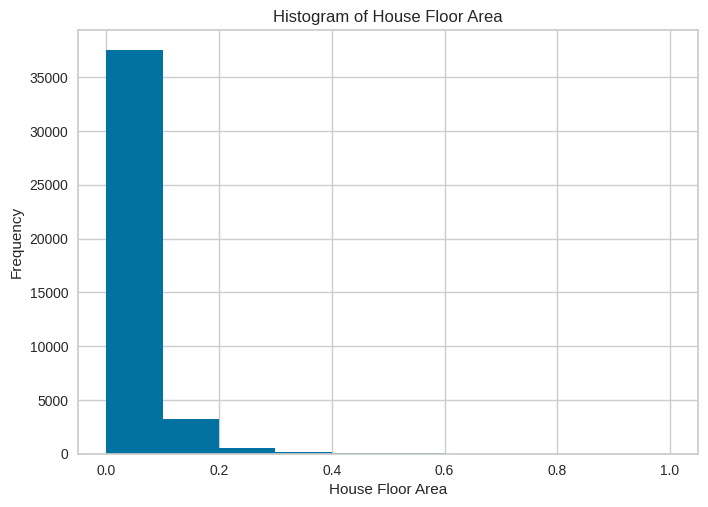

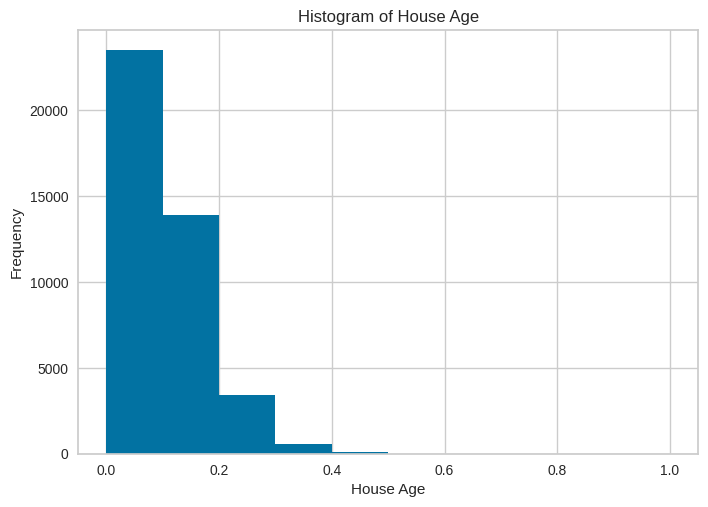

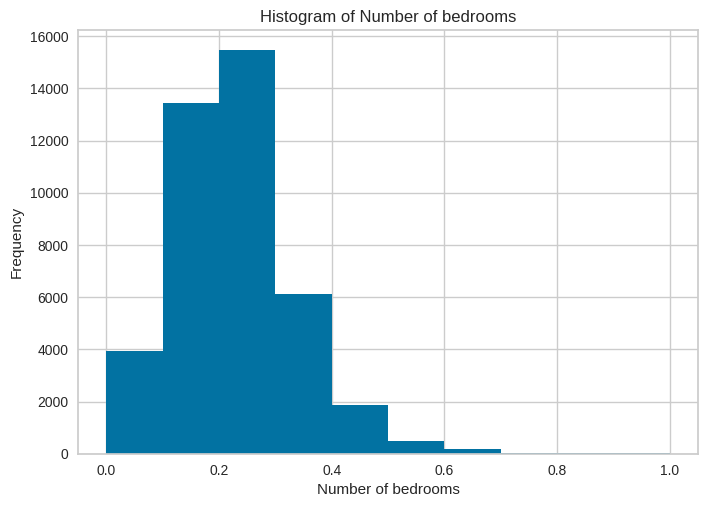

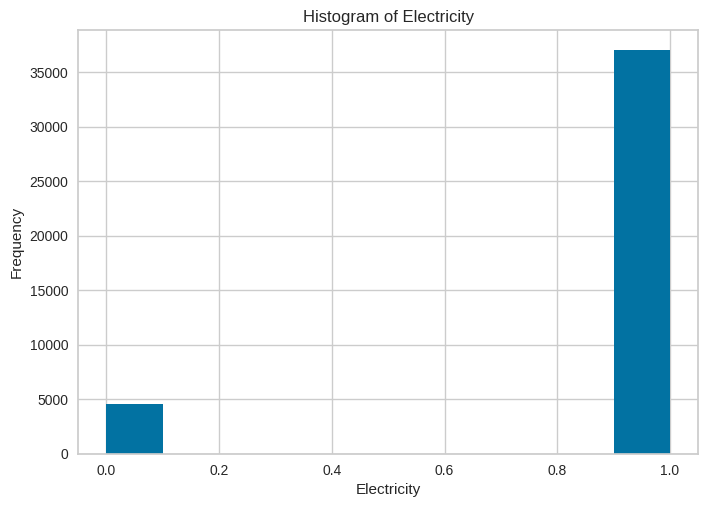

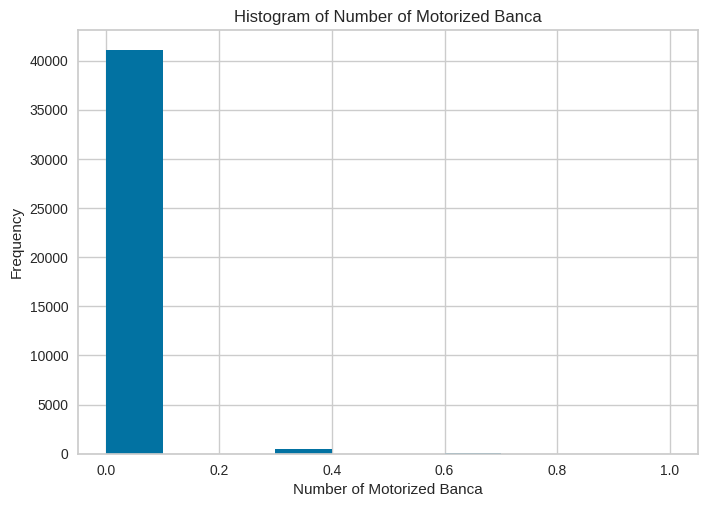

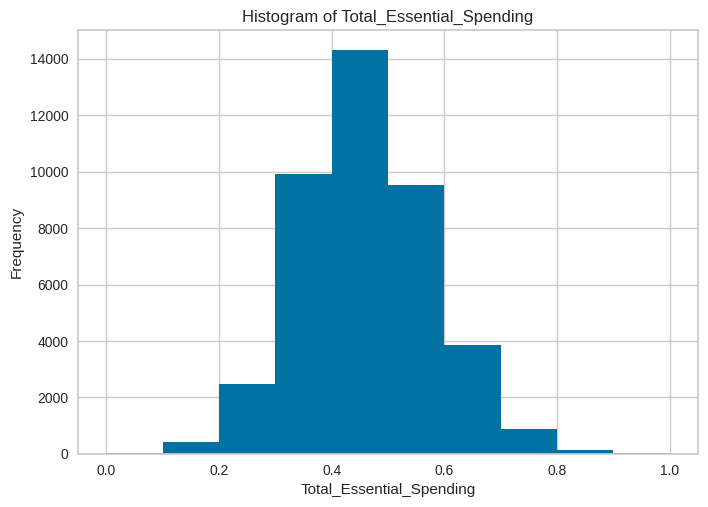

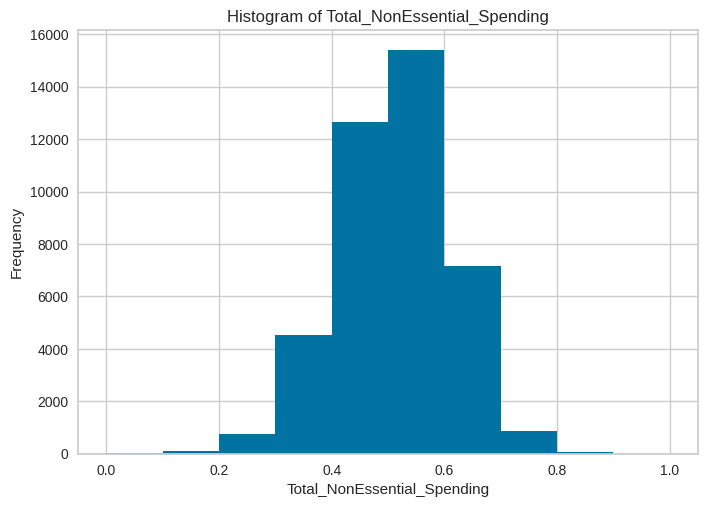

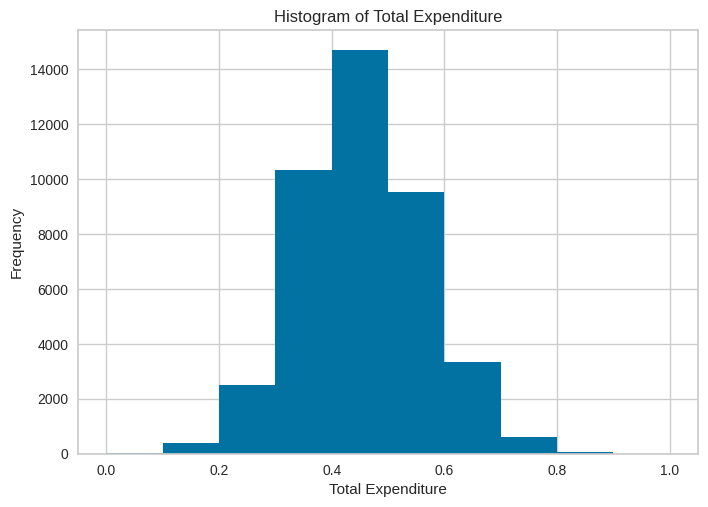

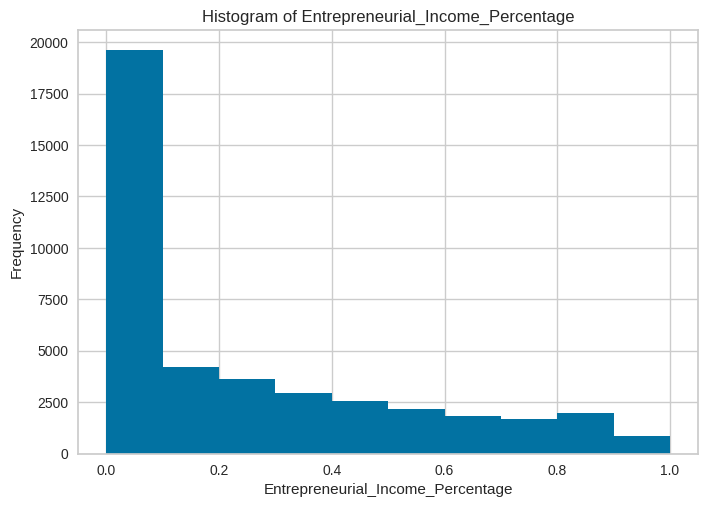

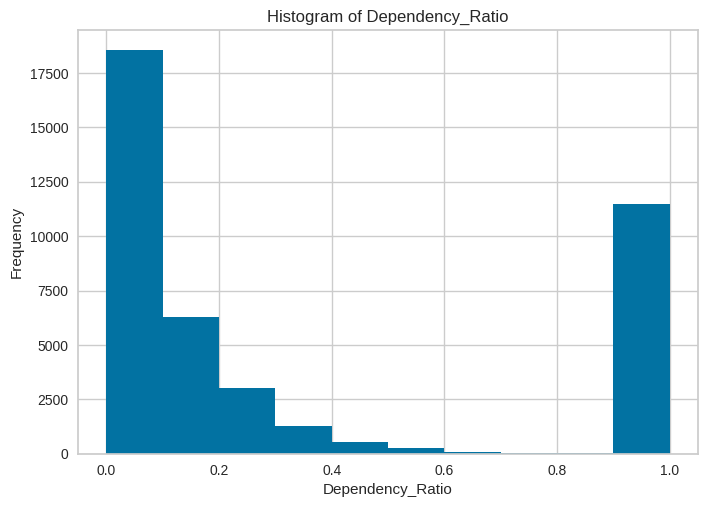

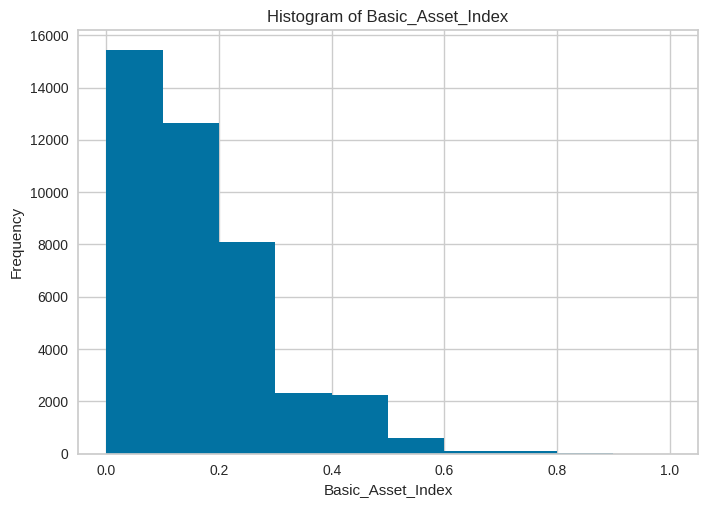

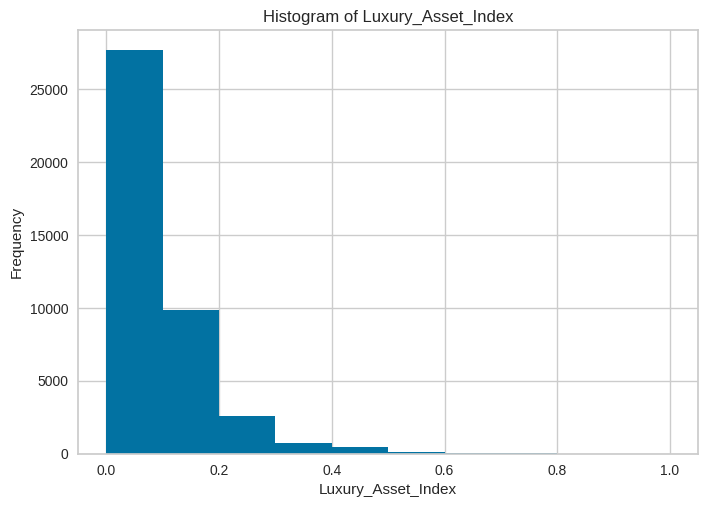

In [418]:
# Histogram for all Numerical Columns, individually
for col in numerical_columns:
    plt.hist(df_copy[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [42]:
# Fill Null Columns with 'Unknown'
df_copy[null_columns] = df_copy[null_columns].fillna('Unknown')

In [419]:
# One Hot Selected Columns
df_copy = pd.get_dummies(df_copy, columns=['Region', 'Main Source of Income',
                                           'Household Head Sex', 'Household Head Marital Status',
                                           'Household Head Job or Business Indicator', 'Type of Household'], drop_first=True)

In [420]:
# Remove One Hotted Columns from Categorical Columns
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Region'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Main Source of Income'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Sex'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Marital Status'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Job or Business Indicator'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Type of Household'))

In [421]:
# Convert all one-hot columns to int
for col in df_copy.columns:
    if col.startswith('Region_') or col.startswith('Main Source of Income_') or col.startswith('Household Head Sex_') or col.startswith('Household Head Marital Status_') or col.startswith('Household Head Job or Business Indicator_') or col.startswith('Type of Household_'):
        df_copy[col] = df_copy[col].astype(int)

In [422]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 69 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Total Household Income                                      41544 non-null  float64
 1   Total Food Expenditure                                      41544 non-null  float64
 2   Agricultural Household indicator                            41544 non-null  float64
 3   Restaurant and hotels Expenditure                           41544 non-null  float64
 4   Alcoholic Beverages Expenditure                             41544 non-null  float64
 5   Tobacco Expenditure                                         41544 non-null  float64
 6   Clothing, Footwear and Other Wear Expenditure               41544 non-null  float64
 7   Housing and water Expenditure                               41544 non-null  float64
 

In [423]:
# Dictionary to map occupations to industry sectors
industry_categories = {
    "Agriculture, forestry, and fishing": [
        'Farmhands and laborers', 'Rice farmers', 'Hog raising farmers', 'Vegetable farmers', 'Foresters and related scientists', 'Inland and coastal waters fishermen', 'Production and operations managers in agriculture, hunting, forestry and fishery', 'Corn farmers', 'Coconut farmers', 'Root crops farmers', 'Fruit tree farmers', 'Coffee and cacao farmers', 'Forestry laborers', 'Other orchard farmers', 'General managers/managing proprietors in agriculture, hunting, forestry and fishing', 'Motorized farm and forestry plant operators', 'Fishery laborers and helpers', 'Duck raisers', 'Cotton and fiber crops farmers', 'Forest tree planters', 'Concessionaires and loggers', 'Minor forest products gatherers', 'Chicken farmers', 'Fish-farm cultivators (excluding prawns)', 'Ornamental plant growers', 'Cattle and dairy farmers', 'Other livestock farmers', 'Deep-sea fishermen', 'Other field crop farmers', 'Sugarcane farmers', 'Other poultry farmers', 'Field legumes farmers', 'Farm technicians', 'Other plant growers', 'Seaweeds cultivators', 'Fishermen n. e. c.', 'Drivers of animal-drawn vehicles and machinery', 'Hunting and trapping laborers', 'Other animal raisers', 'Hunters and trappers', 'Other aqua products cultivators', 'Tree nut farmers'
    ],
    "Mining and quarrying": [
        'Mining and quarrying laborers', 'Earth-moving and related plant operators', 'Miners and quarry workers', 'Shotfirers and blasters', 'Mining-plant operators', 'Well drillers and borers and related workers', 'Mineral ore and stone-processing plant operators'
    ],
    "Manufacturing": [
        'Electronics mechanics and servicers', 'Welders and flamecutters', 'General managers/managing proprietors in manufacturing', 'Hand packers and other manufacturing laborers', 'Tailors, dressmakers and hatters', 'Wood and related products assemblers', 'Assembling laborers', 'Mechanical engineering technicians', 'Production supervisors and general foremen', 'Food preservers', 'Basketry weavers, brush makers and related workers', 'Wood products machine operators', 'Chemical processing plant operators n. e. c.', 'Cabinet/furniture makers and related workers', 'Blacksmiths, hammersmiths, and forging-press workers', 'Wood processing plant operators', 'Fruit, vegetable and nut processing machine operators', 'Rattan, bamboo and other wicker furniture makers', 'Rubber products machine operators', 'Sheet-metal workers', 'Handicraft workers in wood and related materials', 'Weavers, knitters and related workers', 'Cement and other mineral products machine operators', 'Silk-screen, block and textile printers', 'Grain and spice milling machine operators', 'Production and operations managers in manufacturing', 'Other machine operators and assemblers', 'Sewers, Embroiderers and related workers', 'Electronic equipment assemblers', 'Textile, leather and related patternmakers and cutters', 'Metal-wheel grinders, polishers and tool sharpeners', 'Metal finishing, plating and coating machine operators', 'Charcoal makers and related workers', 'Automated assembly-line operators', 'Sugar production machine operators', 'Glass makers, cutters, grinders and finishers', 'Tool-makers and related workers', 'Dairy products makers', 'Meat and fish processing machine operators', 'Metal melters, caster and rolling mill operators', 'Weaving and knitting machine operators', 'Mechanical machinery assemblers', 'Metal drawers and extruders', 'Precision instrument makers and repairers', 'Compositors, typesetters and related workers', 'Electrical equipment assemblers', 'Metal, rubber and plastic products assemblers', 'Baked goods and cereal and chocolate products machine operators', 'Metal molders and coremakers', 'Marine craft mechanics', 'Bookbinders and related workers', 'Jewelry and precious metal workers', 'Musical instrument makers and tuners', 'Machine-tool setters and setter operators', 'Stone splitters, cutters and carvers', 'Woodworking machine setters and setter-operators', 'Food and beverage tasters and graders', 'Pressman letterpresses and related workers', 'Shoemakers and related workers', 'Agricultural or industrial machinery mechanics and fitters', 'Upholsterers and related workers', 'Machine tool operators', 'Technician, skilled, semi-skilled workers', 'Tobacco preparers and tobacco products makers', 'Brewers and wine and other beverage machine operators', 'Papermaking plant operators', 'Pharmaceutical and toiletry products machine operators', 'Paperboard, textile and related products assemblers', 'Plastic products machine operators', 'Industrial robot operators', 'Dairy products machine operators', 'Petroleum and natural gas refining plant operators', 'Builders (traditional materials)', 'Fiber preparing, spinning and winding machine operators', 'Shoemaking and related machine operators', 'Potters and related clay and abrasive formers', 'Fiber preparers', 'Glass and ceramics kiln and related machine operators', 'Textile and leather products machine operators n. e. c.', 'Chemical products machine operators n. e. c.', 'Paper pulp plant operators', 'Sewing machine operators', 'Glass, ceramics and related plant operators n. e. c.'
    ],
    "Electricity, gas, steam and air conditioning supply": [
        'Lineman, line installers and cable splicers', 'Building and related electricians', 'Power production plant operators', 'Electrical mechanics and fitters', 'Riggers and cable splicers', 'Electronics fitters'
    ],
    "Water supply, sewerage, waste management and remediation activities": [
        'Garbage collectors', 'Incinerator, water treatment and related plant operators'
    ],
    "Construction": [
        'Carpenters and joiners', 'Building construction laborers', 'Masons and related concrete finishers', 'Painters and related workers', 'Construction and maintenance laborers: roads, dams and similar constructions', 'Plumbers, pipe fitters and other related workers', 'General managers/managing proprietors in construction', 'Varnishers and related painters', 'Structural-metal preparers, erectors and related workers', 'Roofers', 'Production and operations managers in construction', 'Building frame and related trades workers n. e. c.', 'Crane, hoist and related plant operators', 'Floor layers and tile setters', 'Insulation workers', 'Wood treaters'
    ],
    "Wholesale and retail trade; repair of motor vehicles and motorcycles": [
        'General managers/managing proprietors in wholesale and retail trade', 'Stocks clerks', 'Shop salespersons and demonstrators', 'Motor vehicle mechanics and related trades workers', 'Door-to-door and telephone salespersons', 'Street ambulant vendors', 'Butchers, fishmongers and related food preparers', 'Market and sidewalk stall vendors', 'Stall and market salespersons', 'Cashiers and ticket clerks', 'Sales and marketing managers', 'Production and operations managers in wholesale and retail trade', 'Sales supervisors in retail trade', 'Buyers', 'Sales supervisors in wholesale trade', 'Other sales supervisors', 'Supply and distribution managers'
    ],
    "Transportation and storage": [
        'Transport conductors', 'Heavy truck and lorry drivers','General managers/managing proprietors in transportation, storage and communications', 'Car, taxi and van drivers', 'Motorcycle drivers', "Ship's deck crews and related workers", "Ships' deck officers and pilots", 'Freight handlers', 'Transport clerks', 'Lifting truck operators', 'Production and operations managers in transport, storage and communications', 'Transport and communications service supervisors n. e. c.', 'Bus drivers', 'Mail carriers and sorting clerks', 'Hand or pedal vehicle drivers', 'Air transport service supervisors', 'Ship and aircraft controllers and technicians', 'Aircraft engine mechanics and fitters', 'Air traffic safety technicians', 'Maritime transport service supervisors', 'Locomotive engine drivers', 'Aircraft pilots, navigators and flight engineers'
    ],
    "Accommodation and food service activities": [
        'General managers/managing proprietors of restaurants and hotels', 'Cooks', 'Production and operations managers in restaurant and hotels', 'Waiters, waitresses and bartenders', 'Bakers, pastry cooks and confectionery makers', 'Housekeepers and related workers'
    ],
    "Information and communication": [
        'Broadcasting and telecommunications equipment operators', 'Data entry operators', 'Computer equipment operators', 'Other computer professionals', 'Computer programmers', 'Systems analysts and designers', 'Computer assistants', 'Telecommunication equipment installers and repairers', 'Postal service supervisors', 'Coding, proof-reading and related clerks', 'Telephone switchboard operators', 'Advertising and public relations managers'
    ],
    "Financial and insurance activities": [
        'Tellers and other counter clerks', 'Statistical and finance clerks', 'Accounting and bookkeeping clerks', 'Debt collectors and related workers', 'Pawnbrokers and money lenders', 'Accountants and auditors', 'Bookkeepers', 'Finance and administration managers', 'Insurance representatives', 'Trade brokers', 'Other finance and sales associate professionals', 'Other business services and trade brokers'
    ],
    "Real estate activities": [
        'Estate agents', 'Appraisers and valuers'
    ],
    "Professional, Scientific and Technical Activities": [
        'Other social science professionals', 'Statistical, mathematical and related associate professionals', 'Civil engineers', 'Mechanical engineers', 'Agronomists and related scientists', 'Research and development managers', 'Professional, technical and related officers', 'Technical and commercial sales representatives', 'Architects', 'Electrical Engineers', 'Mining and metallurgical engineering technicians', 'Draftsmen', 'Computer engineers and related professionals', 'Other life science technicians', 'Legal and related business associate professionals', 'Other business professionals', 'Economists', 'Chemists', 'Civil engineering technicians', 'Statisticians', 'Electronics and communications engineers', 'Personnel and human resource development professionals', 'Librarians, archivists and curators', 'Town planners and related professionals', 'Electronics and communications engineering technicians', 'Industrial engineers', 'Lawyers', 'Other physical science and engineering technicians', 'Chemical engineers', 'Geodetic engineers and related professionals', 'Business machines mechanics and repairers', 'Life science technicians', 'Other engineers and related professionals', 'Electrical engineering technicians'
    ],
    "Administrative and Support Service Activities": [
        'Secretaries', 'General managers/managing proprietors n. e. c.', 'Messengers, package and luggage porters and deliverers', 'Other office clerks', 'General managers/managing proprietors of business services', 'Other supervisors, n. e. c.', 'Building caretakers', 'Doorkeepers, watchpersons and related workers', 'Personnel and industrial relations managers', 'Library and filing clerks', 'Other administrative associate professionals', 'Safety, health and quality inspectors (vehicles, processes and products)', 'Labor contractors and employment agents', 'Other specialized managers', 'Receptionists and information clerks', 'Administrative secretaries and related associate professionals', 'Word processor and related operators', 'Production clerks', 'Travel consultants and organizers', 'Stenographers and typists', 'Production and operations managers in business services'
    ],
    "Education": [
        'General elementary education teaching professionals', 'College, university and higher education teaching professionals', 'School supervisors and principals', 'School principals', 'General secondary education teaching professionals', 'Vocational education teaching professionals', 'Teaching associate professionals', 'Education methods specialists', 'Pre-elementary education teaching professionals', 'Technical and vocational instructors/trainors', 'Nonformal education teaching professionals other than technical and vocational trainors/instructors', 'Science and mathematics teaching professionals', 'Science and mathematics elementary education teaching professionals', 'Other teaching professionals'
    ],
    "Human Health and Social Work Activities": [
        'Social work associate professionals', 'Medical technologists', 'Child care workers', 'Institution-based personal care workers', 'Traditional medicine practitioners', 'Midwifery associate professionals', 'Professional nurses', 'Veterinary assistants', 'Pharmacists', 'Nutritionists-dietitians', 'Professional midwives', 'Home-based personal care workers', 'Other health associate professionals (except nursing)', 'Medical assistants', 'Medical doctors', 'Faith healers', 'Dentists', 'Social work professionals', 'Other health professionals (except nursing)', 'Dental assistants', 'Pharmaceutical assistants', 'Medical equipment operators', 'Nursing associate professionals', 'Physiotherapists', 'Optometrists and opticians', 'Veterinarians'
    ],
    "Arts, Entertainment and Recreation": [
        'Bet bookmakers and croupiers', 'Choreographers and dancers', 'Athletes and related workers', 'Decorators and commercial designers', 'Street, nightclub and related musicians, singers and dancers', 'Composers, musicians and singers', 'Photographers and image and sound recording equipment operators', 'Fashion and other models', 'Sculptors, painters and related artists', 'Photographic and related workers', 'Radio, television and other announcers', 'Authors, journalists and other writers', 'Other creative or performing artists'
    ],
    "Other service activities": [
        'Helpers and cleaners in offices, hotels and other establishments', 'Hand launderers and pressers', 'Sweepers and related laborers', 'Non-ordained religious associate professionals', 'Religious professionals', 'Domestic helpers and cleaners', 'General managers/managing proprietors in personal care, cleaning and relative services', 'Photographic products machine operators', 'Undertakers and embalmers', 'Hairdressers, barbers, beauticians and related workers', 'Shoe cleaning and other street services elementary occupations', 'Personal care and related workers, n. e. c.', 'Production and operations managers in personal care, cleaning and relative services', 'Other personal services workers, n. e. c.', 'Companions and valets', 'Travel guides', 'Bleaching, dyeing and cleaning machine operators', 'Service and related workers', 'Vehicle, window and related cleaners', 'Tanners'
    ],
    "Government and Public Service": [
        'Justices', 'Protective services workers n. e. c.', 'Traditional chiefs and heads of villages', 'Legislative officials', 'Police inspectors and detectives', 'Prison guards', 'Government administrators (including career executive service officers)', 'Police officers', 'Enlisted personnel n. e. c.', 'Combat soldiers', 'Firefighters', 'Staff officers', 'Government tax and excise officials', 'Commanding officers', 'Customs and immigration inspectors', 'Government licensing officials', 'Senior officials of humanitarian and other special-interest organizations', 'Building and fire inspectors', 'Other government associate professionals', 'Government social benefits officials', 'Officers, n. e. c.'
    ],
    "Workers reporting occupations unidentifiable or inadequately defined":[
        'Workers reporting occupations unidentifiable or inadequately defined'
    ],
    "Directors and chief executives of corporations": [
        'Directors and chief executives of corporations'
    ]
}

In [424]:
# Reverse mapping for faster lookup
occupation_to_industry = {}
for industry, occupations in industry_categories.items():
    for occupation in occupations:
        occupation_to_industry[occupation] = industry

In [425]:
# Categorizing the jobs
categorized_jobs = {industry: [] for industry in industry_categories}
for job in df['Household Head Occupation']:
    category = occupation_to_industry.get(job, 'Uncategorized')
    if category in categorized_jobs:
        categorized_jobs[category].append(job)
    else:
        categorized_jobs['Uncategorized'] = [job]

In [426]:
# Printing the categorized jobs before applying to DataFrame
for category, jobs in categorized_jobs.items():
    print(f"{category}:")
    print(jobs)
    print('-' * 40)

Agriculture, forestry, and fishing:
['Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Hog raising farmers', 'Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Vegetable farmers', 'Vegetable farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Vegetable farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Foresters and related scientists', 'Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Farmhands and laborers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers', 'Rice farmers

In [427]:
# Define function 'categorize_occupation'
def categorize_occupation(occupation):
    for industry, occupations in industry_categories.items():
        if occupation in occupations:
            return industry
    return 'Uncategorized'

In [428]:
df_copy['Household Head Occupation'] = df_copy['Household Head Occupation'].apply(categorize_occupation)

In [429]:
df_copy['Household Head Occupation'].value_counts()

Household Head Occupation
Agriculture, forestry, and fishing                                      13543
Uncategorized                                                            7536
Wholesale and retail trade; repair of motor vehicles and motorcycles     4188
Transportation and storage                                               4170
Construction                                                             2962
Manufacturing                                                            2010
Government and Public Service                                            1521
Administrative and Support Service Activities                            1470
Other service activities                                                 1227
Accommodation and food service activities                                 594
Education                                                                 501
Human Health and Social Work Activities                                   367
Financial and insurance activities                                        300
Professional, Scientific and Technical Activities                         279
Electricity, gas, steam and air conditioning supply                       256
Arts, Entertainment and Recreation                                        217
Mining and quarrying                                                      183
Information and communication                                              92
Real estate activities                                                     39
Water supply, sewerage, waste management and remediation activities        33
Workers reporting occupations unidentifiable or inadequately defined       29
Directors and chief executives of corporations                             27
Name: count, dtype: int64

In [430]:
highest_educational_attainment = {
    "No Grade Completed" : [
        'No Grade Completed'
    ],
    "Preschool": [
        'Preschool'
    ],
    "Elementary Graduate":[
        'Elementary Graduate'
    ],
    "Elementary Non-Graduate":[
        'Grade 4','Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6'
    ],
    "High School Graduate":[
        'High School Graduate'
    ],
    "High School Non-Graduate":[
        'Second Year High School', 'Third Year High School', 'First Year High School'
    ],
    "College Non-Graduate":[
        'Third Year College', 'First Year College', 'Second Year College', 'First Year Post Secondary',
        'Second Year Post Secondary', 'Fourth Year College',
        'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
        'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)'
    ],
    "College Graduate": [
        'Business and Administration Programs', 'Teacher Training and Education Sciences Programs',
        'Engineering and Engineering Trades Programs', 'Engineering and Engineering trades Programs',
        'Health Programs', 'Computing/Information Technology Programs', 'Security Services Programs',
        'Agriculture, Forestry, and Fishery Programs', 'Transport Services Programs',
        'Social and Behavioral Science Programs', 'Personal Services Programs', 'Humanities Programs',
        'Law Programs', 'Basic Programs', 'Architecture and Building Programs', 'Journalism and Information Programs',
        'Arts Programs', 'Life Sciences Programs', 'Manufacturing and Processing Programs', 'Mathematics and Statistics Programs',
        'Social Services Programs', 'Physical Sciences Programs', 'Veterinary Programs', 'Environmental Protection Programs'
    ],
    "Post Baccalaureate": [
        'Post Baccalaureate'
    ]
}

In [431]:
print(type(highest_educational_attainment))  # Should be <class 'dict'>
print(highest_educational_attainment)        # Check its contents

<class 'dict'>
{'No Grade Completed': ['No Grade Completed'], 'Preschool': ['Preschool'], 'Elementary Graduate': ['Elementary Graduate'], 'Elementary Non-Graduate': ['Grade 4', 'Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6'], 'High School Graduate': ['High School Graduate'], 'High School Non-Graduate': ['Second Year High School', 'Third Year High School', 'First Year High School'], 'College Non-Graduate': ['Third Year College', 'First Year College', 'Second Year College', 'First Year Post Secondary', 'Second Year Post Secondary', 'Fourth Year College', 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree', 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)'], 'College Graduate': ['Business and Administration Programs

In [432]:
def check_education_categorization(df, column_name, highest_educational_attainment):
    # Reverse mapping: Create a lookup dictionary for fast categorization
    education_to_category = {}
    for category, levels in highest_educational_attainment.items():
        for level in levels:
            education_to_category[level] = category

    # Dictionary to store categorized entries
    categorized_levels = {category: [] for category in highest_educational_attainment}
    categorized_levels["Uncategorized"] = []  # To capture unmatched entries

    # Categorize each entry in the DataFrame
    for edu in df[column_name]:
        category = education_to_category.get(edu, "Uncategorized")
        categorized_levels[category].append(edu)

    # Print categorized results for validation
    for category, levels in categorized_levels.items():
        print(f"{category} ({len(levels)} entries):")
        print(levels[:10])  # Show a sample of 10 for readability
        print('-' * 50)

    # Return categorized results (optional)
    return categorized_levels

In [433]:
categorized_results = check_education_categorization(df_copy, 'Household Head Highest Grade Completed', highest_educational_attainment)

No Grade Completed (1228 entries):
['No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed', 'No Grade Completed']
--------------------------------------------------
Preschool (15 entries):
['Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool', 'Preschool']
--------------------------------------------------
Elementary Graduate (7640 entries):
['Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate', 'Elementary Graduate']
--------------------------------------------------
Elementary Non-Graduate (8821 entries):
['Grade 3', 'Grade 6', 'Grade 4', 'Grade 3', 'Grade 2', 'Grade 5', 'Grade 3', 'Grade 4', 'Grade 4', 'Grade 4']
------------------

In [434]:
# Define function 'Household Highest Educational Attaintment'
def categorize_highest_educational_attainment(education):
    for category, educational_levels in highest_educational_attainment.items():
        if education in educational_levels:
            return category
    return 'Uncategorized'

In [435]:
# Apply to 'Household Head Highest Grade Completed'
df_copy['Household Head Highest Grade Completed'] = df_copy['Household Head Highest Grade Completed'].apply(categorize_highest_educational_attainment)

In [436]:
df_copy['Household Head Highest Grade Completed'].value_counts()

Household Head Highest Grade Completed
High School Graduate        9628
Elementary Non-Graduate     8821
Elementary Graduate         7640
College Graduate            5441
High School Non-Graduate    4896
College Non-Graduate        3628
No Grade Completed          1228
Post Baccalaureate           247
Preschool                     15
Name: count, dtype: int64

In [437]:
# Label Encode Categorical Values
label_encoder = LabelEncoder()
df_copy[categorical_columns] = df_copy[categorical_columns].apply(label_encoder.fit_transform)

In [438]:
df_copy.head()

Total Household Income  Total Food Expenditure  \
0                0.539417                0.654256   
1                0.412143                0.556102   
2                0.286569                0.539206   
3                0.324256                0.581480   
4                0.405527                0.615324   

   Agricultural Household indicator  Restaurant and hotels Expenditure  \
0                               0.0                           0.593338   
1                               0.0                           0.575563   
2                               0.5                           0.624114   
3                               0.0                           0.648071   
4                               0.0                           0.649473   

   Alcoholic Beverages Expenditure  Tobacco Expenditure  \
0                         0.000000             0.000000   
1                         0.624629             0.647138   
2                         0.509502             0.710652   
3                         0.561683             0.000000   
4                         0.631901             0.000000   

   Clothing, Footwear and Other Wear Expenditure  \
0                                       0.659811   
1                                       0.705186   
2                                       0.619036   
3                                       0.566124   
4                                       0.660032   

   Housing and water Expenditure  Medical Care Expenditure  \
0                       0.496230                  0.587758   
1                       0.434912                  0.589060   
2                       0.284049                  0.307473   
3                       0.305213                  0.296523   
4                       0.394381                  0.356960   

   Transportation Expenditure  ...  Main Source of Income_Wage/Salaries  \
0                    0.621302  ...                                    1   
1                    0.694164  ...                                    1   
2                    0.424184  ...                                    1   
3                    0.647640  ...                                    1   
4                    0.649294  ...                                    1   

   Household Head Sex_Male  Household Head Marital Status_Divorced/Separated  \
0                        0                                                 0   
1                        1                                                 0   
2                        1                                                 0   
3                        1                                                 0   
4                        1                                                 0   

   Household Head Marital Status_Married  \
0                                      0   
1                                      1   
2                                      1   
3                                      1   
4                                      1   

   Household Head Marital Status_Single  \
0                                     1   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Household Head Marital Status_Unknown  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Household Head Marital Status_Widowed  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Household Head Job or Business Indicator_With Job/Business  \
0                                                  1            
1                                                  1            
2                

In [439]:
df_copy.isna().sum()

Total Household Income                                        0
Total Food Expenditure                                        0
Agricultural Household indicator                              0
Restaurant and hotels Expenditure                             0
Alcoholic Beverages Expenditure                               0
                                                             ..
Household Head Marital Status_Unknown                         0
Household Head Marital Status_Widowed                         0
Household Head Job or Business Indicator_With Job/Business    0
Type of Household_Single Family                               0
Type of Household_Two or More Nonrelated Persons/Members      0
Length: 69, dtype: int64

In [440]:
df_copy.duplicated().sum()

0

In [441]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 69 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Total Household Income                                      41544 non-null  float64
 1   Total Food Expenditure                                      41544 non-null  float64
 2   Agricultural Household indicator                            41544 non-null  float64
 3   Restaurant and hotels Expenditure                           41544 non-null  float64
 4   Alcoholic Beverages Expenditure                             41544 non-null  float64
 5   Tobacco Expenditure                                         41544 non-null  float64
 6   Clothing, Footwear and Other Wear Expenditure               41544 non-null  float64
 7   Housing and water Expenditure                               41544 non-null  float64
 

# Model Training

For cluster = 1, SSE/WCSS is 3550153.3368640123
For cluster = 2, SSE/WCSS is 1396329.016949765
For cluster = 3, SSE/WCSS is 1221894.9975913244
For cluster = 4, SSE/WCSS is 1095074.3641125949
For cluster = 5, SSE/WCSS is 979072.4015147323
For cluster = 6, SSE/WCSS is 895128.8536732034
For cluster = 7, SSE/WCSS is 848515.3170705409
For cluster = 8, SSE/WCSS is 810896.0454012178
For cluster = 9, SSE/WCSS is 783494.9149342786
For cluster = 10, SSE/WCSS is 745776.8207572827


Text(0, 0.5, 'WCSS')

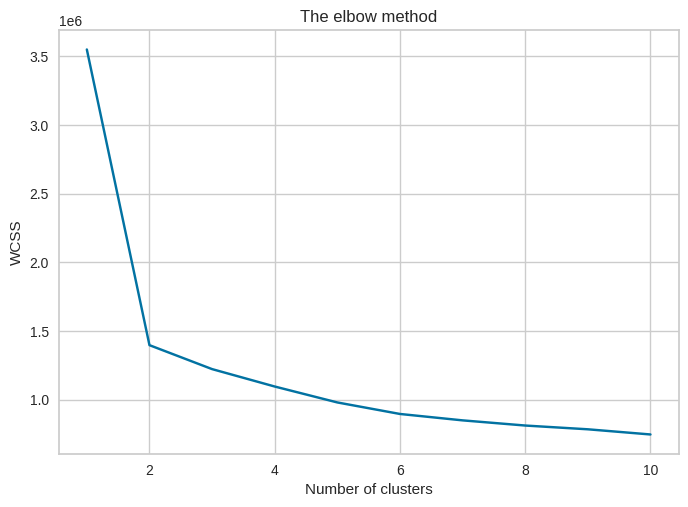

In [442]:
# Use Elbow Method to find optimal KMeans
from sklearn.cluster import KMeans

wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

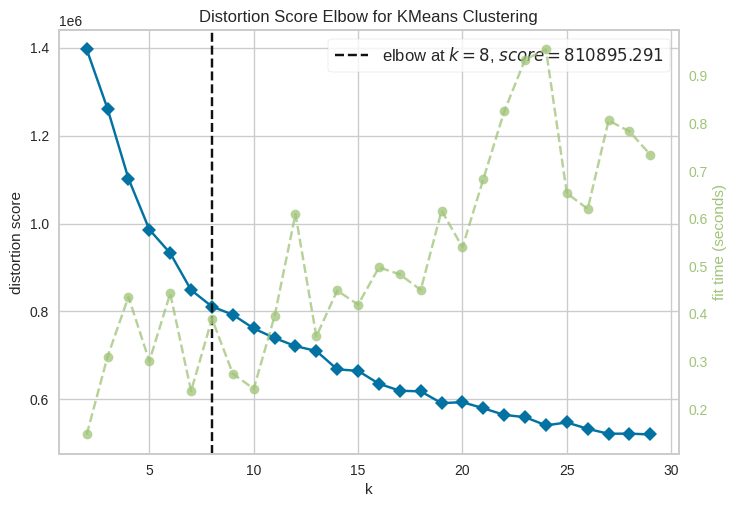

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [443]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_copy)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [444]:
from sklearn.metrics import silhouette_score
wcss = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(df_copy)
  label = kmeans.labels_
  sil_coeff = silhouette_score(df_copy,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.5022589527778252
For cluster= 3, Silhouette Coefficient is 0.3302266946405669
For cluster= 4, Silhouette Coefficient is 0.22139907410746223
For cluster= 5, Silhouette Coefficient is 0.19624898719986017
For cluster= 6, Silhouette Coefficient is 0.22376173894022802
For cluster= 7, Silhouette Coefficient is 0.23041938142125296
For cluster= 8, Silhouette Coefficient is 0.2067945335959564
For cluster= 9, Silhouette Coefficient is 0.2198472144839789


In [445]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

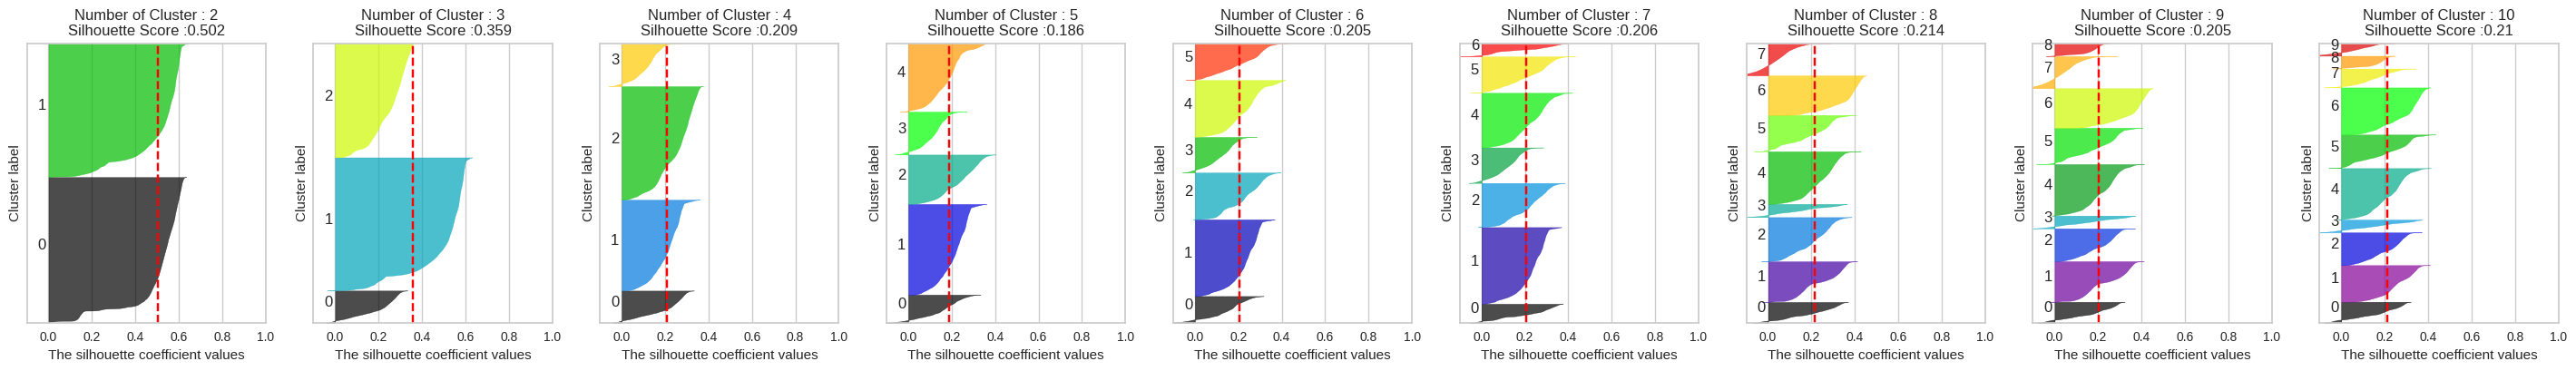

In [446]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df_copy)

In [447]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_copy)

In [448]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.90) + 1
print("dimension : ", d)

[0.6754758  0.7564611  0.82051517 0.86471421 0.89691546 0.92504369
 0.94419974 0.95522137 0.96174647 0.96737415]
dimension :  6


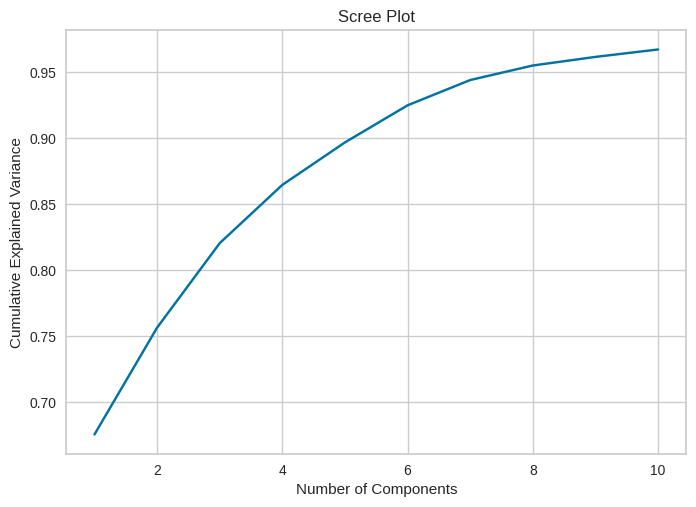

In [449]:
# Display the Scree Plot and label where it hits 0.9 cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [450]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_copy)

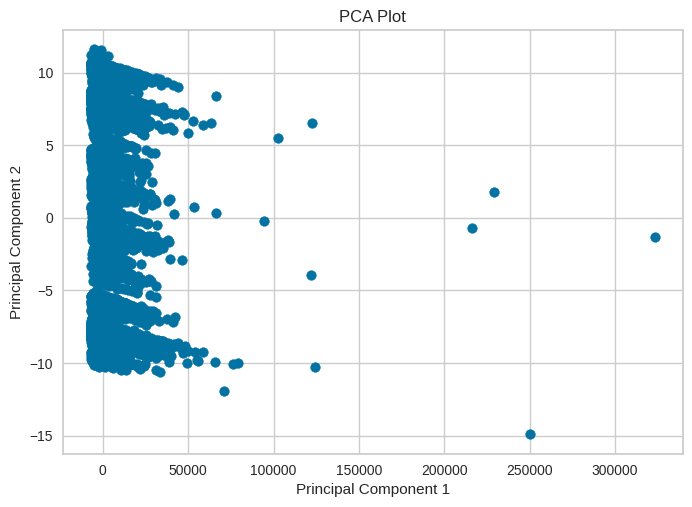

In [72]:
# Plot PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

In [451]:
# Print Loading Scores
print(pca.components_)

[[ 3.19915729e-03  1.98015822e-03 -6.51593340e-03  5.31584720e-03
  -4.15958622e-03 -5.33214345e-03  1.10839918e-03  5.08864117e-03
   3.81354232e-03  1.77272135e-03  5.53707644e-03 -8.03134028e-04
   2.00058826e-03  2.89151077e-03 -1.70165789e-02 -6.59843189e-03
   3.97958994e-03 -2.07023432e-02  9.83165110e-01  1.54533722e-01
  -1.04428826e-03 -1.05240897e-03 -2.95691079e-03 -1.36873487e-03
  -7.30163944e-03  4.78228045e-02  4.15695878e-02  8.09112883e-04
   1.44341606e-03  1.85011972e-03  9.40566411e-03  4.07656357e-02
   8.11970938e-03 -3.27098357e-02 -3.10996165e-04  3.55901301e-03
  -6.08597984e-04  2.07221721e-03 -5.87344446e-03  2.64716308e-03
   3.94647554e-03  2.27163696e-03 -1.17766489e-03 -5.63411379e-04
   6.73712298e-04 -1.87676398e-03  2.80310709e-03  3.52802340e-03
  -9.94386769e-04 -9.48684368e-04  5.81053261e-03 -8.85761991e-04
  -4.56686159e-04  1.90162005e-04 -6.63707954e-04 -5.13238154e-04
  -5.18510080e-04 -1.10198806e-03  8.90656492e-03 -1.44689819e-03
  -1.58572

For cluster = 1, SSE/WCSS is 3284046.9294258556
For cluster = 2, SSE/WCSS is 1130228.321819435
For cluster = 3, SSE/WCSS is 957123.70400151
For cluster = 4, SSE/WCSS is 840580.4423339642
For cluster = 5, SSE/WCSS is 715696.1141443296
For cluster = 6, SSE/WCSS is 633828.3050408579
For cluster = 7, SSE/WCSS is 586696.3974795478
For cluster = 8, SSE/WCSS is 549531.4655600896
For cluster = 9, SSE/WCSS is 512571.91270690033
For cluster = 10, SSE/WCSS is 499422.9811595718


Text(0, 0.5, 'WCSS')

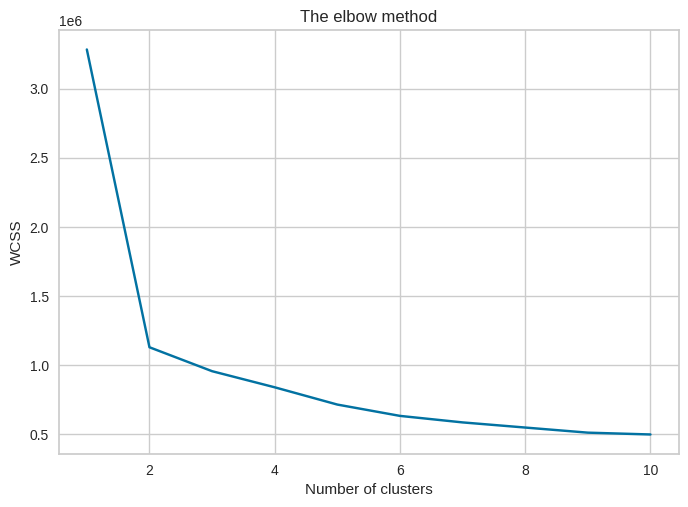

In [452]:
# Use df_pca for K_Means
from sklearn.cluster import KMeans

wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

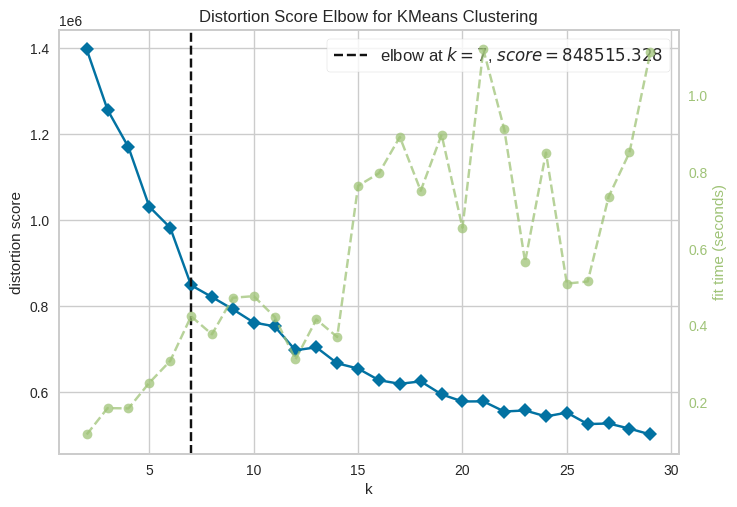

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [453]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_copy)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [454]:
from sklearn.metrics import silhouette_score
wcss = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(df_pca)
  label = kmeans.labels_
  sil_coeff = silhouette_score(df_pca,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.5477381021075518
For cluster= 3, Silhouette Coefficient is 0.39869871855451877
For cluster= 4, Silhouette Coefficient is 0.2944626660117224
For cluster= 5, Silhouette Coefficient is 0.2617757635144101
For cluster= 6, Silhouette Coefficient is 0.2832744805793512
For cluster= 7, Silhouette Coefficient is 0.2928726839263849
For cluster= 8, Silhouette Coefficient is 0.2947925835027795
For cluster= 9, Silhouette Coefficient is 0.2872597370276098


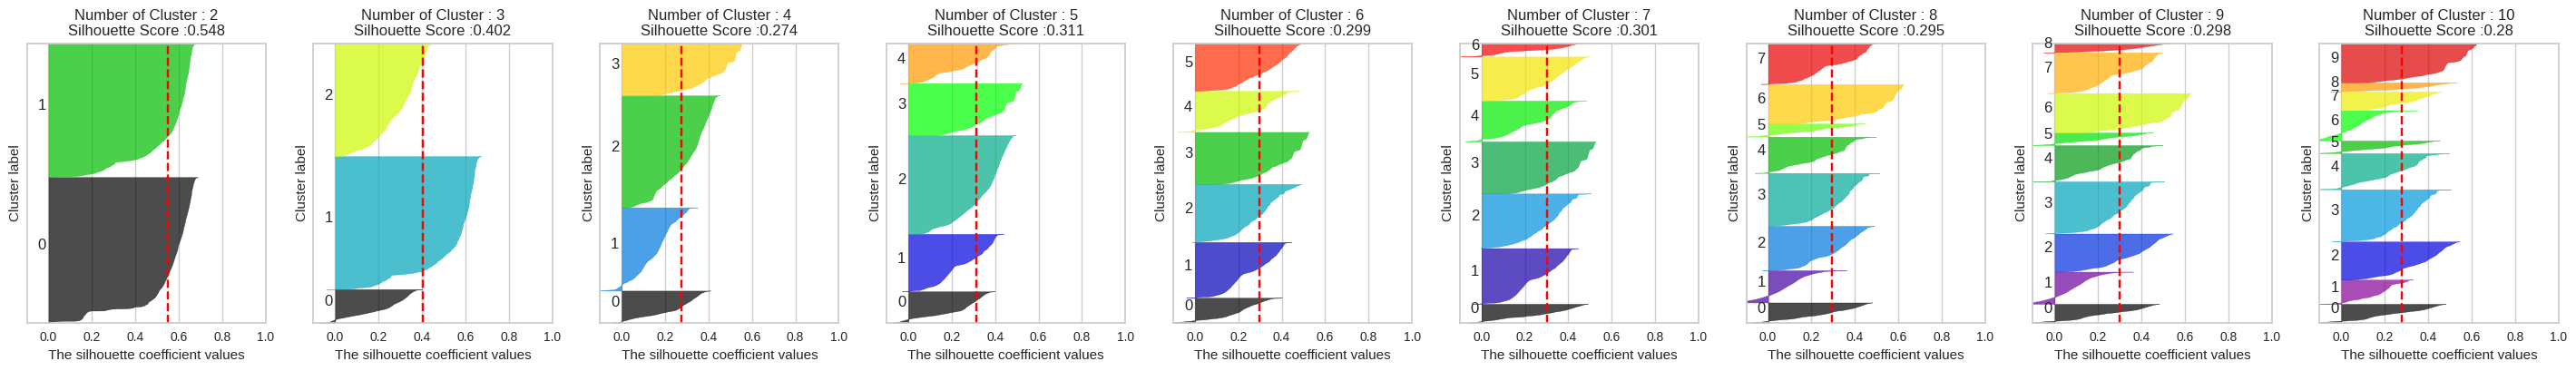

In [455]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df_pca)

In [82]:
# Train Kmeans model with 2 Clusters using df_pca
kmeans = KMeans(n_clusters=6, max_iter=100)
kmeans.fit(df_pca)

KMeans(max_iter=100, n_clusters=6)

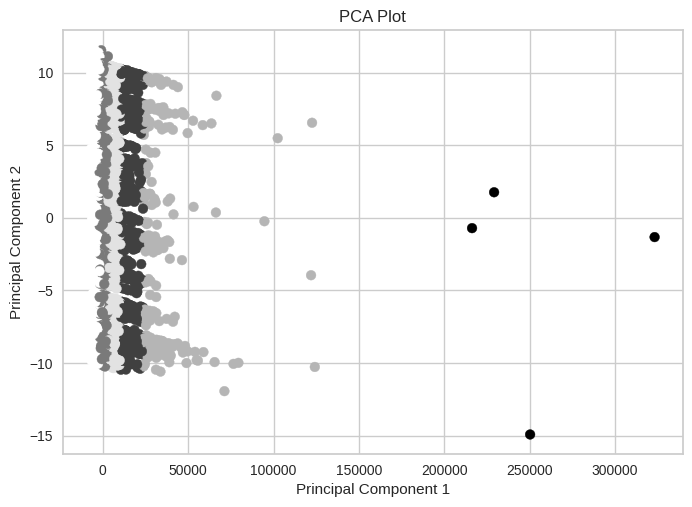

In [83]:
# Plot PCA Model using Generated clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Profiling / Describing the Clusters